In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import scipy.sparse as sp
from copy import deepcopy
import warnings 
import os
from sklearn.model_selection import KFold
import json
warnings.filterwarnings("ignore") 
import random
random.seed(1234)
np.random.seed(1234)
from tqdm import trange

import time
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split,StratifiedKFold
import matplotlib.pyplot as plt
from tflearn.activations import relu
from optparse import OptionParser
from scipy import interp

Instructions for updating:
non-resource variables are not supported in the long term


In [22]:
def plot_roc_curve(fpr, tpr, auc):
    plt.figure(1)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.plot(fpr, tpr, color='b', label=r'Mean ROC (AUC = %0.6f)' % auc, lw=2, alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='best')
    plt.show()

def plot_pr_curve(recall, precision, aupr):
    plt.figure(2)
    plt.plot([0, 1], [1, 0], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
    plt.plot(recall, precision, color='b', label=r'Mean PR (AUPR = %0.6f)' % aupr, lw=2, alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

# global loocv

In [18]:
path = '/home/chujunyi/4_GNN/GraphSAINT/miRNA_disease__globalLOOCV/y_val/'
print(path)
files = os.listdir(path)
files.sort(key= lambda x:int(x[35:-4]))
files

/home/chujunyi/4_GNN/GraphSAINT/miRNA_disease__globalLOOCV/y_val/


['task_Tp__testlabel0_10knn_edge_fold0.npz',
 'task_Tp__testlabel0_10knn_edge_fold1.npz',
 'task_Tp__testlabel0_10knn_edge_fold2.npz',
 'task_Tp__testlabel0_10knn_edge_fold3.npz',
 'task_Tp__testlabel0_10knn_edge_fold4.npz',
 'task_Tp__testlabel0_10knn_edge_fold5.npz',
 'task_Tp__testlabel0_10knn_edge_fold6.npz',
 'task_Tp__testlabel0_10knn_edge_fold7.npz',
 'task_Tp__testlabel0_10knn_edge_fold8.npz',
 'task_Tp__testlabel0_10knn_edge_fold9.npz',
 'task_Tp__testlabel0_10knn_edge_fold10.npz',
 'task_Tp__testlabel0_10knn_edge_fold11.npz',
 'task_Tp__testlabel0_10knn_edge_fold12.npz',
 'task_Tp__testlabel0_10knn_edge_fold13.npz',
 'task_Tp__testlabel0_10knn_edge_fold14.npz',
 'task_Tp__testlabel0_10knn_edge_fold15.npz',
 'task_Tp__testlabel0_10knn_edge_fold16.npz',
 'task_Tp__testlabel0_10knn_edge_fold17.npz',
 'task_Tp__testlabel0_10knn_edge_fold18.npz',
 'task_Tp__testlabel0_10knn_edge_fold19.npz',
 'task_Tp__testlabel0_10knn_edge_fold20.npz',
 'task_Tp__testlabel0_10knn_edge_fold21.npz'

  0%|          | 11/5430 [00:00<00:53, 101.46it/s]

current cv = 1 | total cv = 5430
current cv = 2 | total cv = 5430
current cv = 3 | total cv = 5430
current cv = 4 | total cv = 5430
current cv = 5 | total cv = 5430
current cv = 6 | total cv = 5430
current cv = 7 | total cv = 5430
current cv = 8 | total cv = 5430
current cv = 9 | total cv = 5430
current cv = 10 | total cv = 5430
current cv = 11 | total cv = 5430
current cv = 12 | total cv = 5430
current cv = 13 | total cv = 5430
current cv = 14 | total cv = 5430


  1%|          | 36/5430 [00:00<01:05, 82.01it/s] 

current cv = 15 | total cv = 5430
current cv = 16 | total cv = 5430
current cv = 17 | total cv = 5430
current cv = 18 | total cv = 5430
current cv = 19 | total cv = 5430
current cv = 20 | total cv = 5430
current cv = 21 | total cv = 5430
current cv = 22 | total cv = 5430
current cv = 23 | total cv = 5430
current cv = 24 | total cv = 5430
current cv = 25 | total cv = 5430
current cv = 26 | total cv = 5430
current cv = 27 | total cv = 5430
current cv = 28 | total cv = 5430
current cv = 29 | total cv = 5430
current cv = 30 | total cv = 5430
current cv = 31 | total cv = 5430
current cv = 32 | total cv = 5430
current cv = 33 | total cv = 5430
current cv = 34 | total cv = 5430
current cv = 35 | total cv = 5430
current cv = 36 | total cv = 5430
current cv = 37 | total cv = 5430
current cv = 38 | total cv = 5430
current cv = 39 | total cv = 5430
current cv = 40 | total cv = 5430
current cv = 41 | total cv = 5430
current cv = 42 | total cv = 5430
current cv = 43 | total cv = 5430
current cv = 4

  1%|▏         | 70/5430 [00:00<00:42, 125.12it/s]

current cv = 45 | total cv = 5430
current cv = 46 | total cv = 5430
current cv = 47 | total cv = 5430
current cv = 48 | total cv = 5430
current cv = 49 | total cv = 5430
current cv = 50 | total cv = 5430
current cv = 51 | total cv = 5430
current cv = 52 | total cv = 5430
current cv = 53 | total cv = 5430
current cv = 54 | total cv = 5430
current cv = 55 | total cv = 5430
current cv = 56 | total cv = 5430
current cv = 57 | total cv = 5430
current cv = 58 | total cv = 5430
current cv = 59 | total cv = 5430
current cv = 60 | total cv = 5430
current cv = 61 | total cv = 5430
current cv = 62 | total cv = 5430
current cv = 63 | total cv = 5430
current cv = 64 | total cv = 5430
current cv = 65 | total cv = 5430
current cv = 66 | total cv = 5430
current cv = 67 | total cv = 5430
current cv = 68 | total cv = 5430
current cv = 69 | total cv = 5430
current cv = 70 | total cv = 5430
current cv = 71 | total cv = 5430
current cv = 72 | total cv = 5430
current cv = 73 | total cv = 5430
current cv = 7

  2%|▏         | 104/5430 [00:00<00:36, 146.03it/s]

current cv = 79 | total cv = 5430
current cv = 80 | total cv = 5430
current cv = 81 | total cv = 5430
current cv = 82 | total cv = 5430
current cv = 83 | total cv = 5430
current cv = 84 | total cv = 5430
current cv = 85 | total cv = 5430
current cv = 86 | total cv = 5430
current cv = 87 | total cv = 5430
current cv = 88 | total cv = 5430
current cv = 89 | total cv = 5430
current cv = 90 | total cv = 5430
current cv = 91 | total cv = 5430
current cv = 92 | total cv = 5430
current cv = 93 | total cv = 5430
current cv = 94 | total cv = 5430
current cv = 95 | total cv = 5430
current cv = 96 | total cv = 5430
current cv = 97 | total cv = 5430
current cv = 98 | total cv = 5430
current cv = 99 | total cv = 5430
current cv = 100 | total cv = 5430
current cv = 101 | total cv = 5430
current cv = 102 | total cv = 5430
current cv = 103 | total cv = 5430
current cv = 104 | total cv = 5430
current cv = 105 | total cv = 5430
current cv = 106 | total cv = 5430
current cv = 107 | total cv = 5430
curren

  3%|▎         | 142/5430 [00:01<00:32, 164.56it/s]

current cv = 114 | total cv = 5430
current cv = 115 | total cv = 5430
current cv = 116 | total cv = 5430
current cv = 117 | total cv = 5430
current cv = 118 | total cv = 5430
current cv = 119 | total cv = 5430
current cv = 120 | total cv = 5430
current cv = 121 | total cv = 5430
current cv = 122 | total cv = 5430
current cv = 123 | total cv = 5430
current cv = 124 | total cv = 5430
current cv = 125 | total cv = 5430
current cv = 126 | total cv = 5430
current cv = 127 | total cv = 5430
current cv = 128 | total cv = 5430
current cv = 129 | total cv = 5430
current cv = 130 | total cv = 5430
current cv = 131 | total cv = 5430
current cv = 132 | total cv = 5430
current cv = 133 | total cv = 5430
current cv = 134 | total cv = 5430
current cv = 135 | total cv = 5430
current cv = 136 | total cv = 5430
current cv = 137 | total cv = 5430
current cv = 138 | total cv = 5430
current cv = 139 | total cv = 5430
current cv = 140 | total cv = 5430
current cv = 141 | total cv = 5430
current cv = 142 | t

  3%|▎         | 176/5430 [00:01<00:34, 151.88it/s]

current cv = 150 | total cv = 5430
current cv = 151 | total cv = 5430
current cv = 152 | total cv = 5430
current cv = 153 | total cv = 5430
current cv = 154 | total cv = 5430
current cv = 155 | total cv = 5430
current cv = 156 | total cv = 5430
current cv = 157 | total cv = 5430
current cv = 158 | total cv = 5430
current cv = 159 | total cv = 5430
current cv = 160 | total cv = 5430
current cv = 161 | total cv = 5430
current cv = 162 | total cv = 5430
current cv = 163 | total cv = 5430
current cv = 164 | total cv = 5430
current cv = 165 | total cv = 5430
current cv = 166 | total cv = 5430
current cv = 167 | total cv = 5430
current cv = 168 | total cv = 5430
current cv = 169 | total cv = 5430
current cv = 170 | total cv = 5430
current cv = 171 | total cv = 5430
current cv = 172 | total cv = 5430
current cv = 173 | total cv = 5430
current cv = 174 | total cv = 5430
current cv = 175 | total cv = 5430
current cv = 176 | total cv = 5430
current cv = 177 | total cv = 5430
current cv = 178 | t

  4%|▎         | 195/5430 [00:01<00:32, 160.07it/s]

current cv = 179 | total cv = 5430
current cv = 180 | total cv = 5430
current cv = 181 | total cv = 5430
current cv = 182 | total cv = 5430
current cv = 183 | total cv = 5430
current cv = 184 | total cv = 5430
current cv = 185 | total cv = 5430
current cv = 186 | total cv = 5430
current cv = 187 | total cv = 5430
current cv = 188 | total cv = 5430
current cv = 189 | total cv = 5430
current cv = 190 | total cv = 5430
current cv = 191 | total cv = 5430
current cv = 192 | total cv = 5430
current cv = 193 | total cv = 5430
current cv = 194 | total cv = 5430
current cv = 195 | total cv = 5430
current cv = 196 | total cv = 5430
current cv = 197 | total cv = 5430
current cv = 198 | total cv = 5430
current cv = 199 | total cv = 5430
current cv = 200 | total cv = 5430
current cv = 201 | total cv = 5430
current cv = 202 | total cv = 5430
current cv = 203 | total cv = 5430
current cv = 204 | total cv = 5430
current cv = 205 | total cv = 5430
current cv = 206 | total cv = 5430
current cv = 207 | t

  4%|▍         | 228/5430 [00:01<00:35, 146.67it/s]

current cv = 211 | total cv = 5430
current cv = 212 | total cv = 5430
current cv = 213 | total cv = 5430
current cv = 214 | total cv = 5430
current cv = 215 | total cv = 5430
current cv = 216 | total cv = 5430
current cv = 217 | total cv = 5430
current cv = 218 | total cv = 5430
current cv = 219 | total cv = 5430
current cv = 220 | total cv = 5430
current cv = 221 | total cv = 5430
current cv = 222 | total cv = 5430
current cv = 223 | total cv = 5430
current cv = 224 | total cv = 5430
current cv = 225 | total cv = 5430
current cv = 226 | total cv = 5430
current cv = 227 | total cv = 5430
current cv = 228 | total cv = 5430
current cv = 229 | total cv = 5430
current cv = 230 | total cv = 5430
current cv = 231 | total cv = 5430
current cv = 232 | total cv = 5430
current cv = 233 | total cv = 5430
current cv = 234 | total cv = 5430
current cv = 235 | total cv = 5430
current cv = 236 | total cv = 5430
current cv = 237 | total cv = 5430
current cv = 238 | total cv = 5430
current cv = 239 | t

  5%|▍         | 260/5430 [00:01<00:36, 143.20it/s]

current cv = 242 | total cv = 5430
current cv = 243 | total cv = 5430
current cv = 244 | total cv = 5430
current cv = 245 | total cv = 5430
current cv = 246 | total cv = 5430
current cv = 247 | total cv = 5430
current cv = 248 | total cv = 5430
current cv = 249 | total cv = 5430
current cv = 250 | total cv = 5430
current cv = 251 | total cv = 5430
current cv = 252 | total cv = 5430
current cv = 253 | total cv = 5430
current cv = 254 | total cv = 5430
current cv = 255 | total cv = 5430
current cv = 256 | total cv = 5430
current cv = 257 | total cv = 5430
current cv = 258 | total cv = 5430
current cv = 259 | total cv = 5430
current cv = 260 | total cv = 5430
current cv = 261 | total cv = 5430
current cv = 262 | total cv = 5430
current cv = 263 | total cv = 5430
current cv = 264 | total cv = 5430
current cv = 265 | total cv = 5430
current cv = 266 | total cv = 5430
current cv = 267 | total cv = 5430


  5%|▌         | 293/5430 [00:02<00:33, 153.17it/s]

current cv = 268 | total cv = 5430
current cv = 269 | total cv = 5430
current cv = 270 | total cv = 5430
current cv = 271 | total cv = 5430
current cv = 272 | total cv = 5430
current cv = 273 | total cv = 5430
current cv = 274 | total cv = 5430
current cv = 275 | total cv = 5430
current cv = 276 | total cv = 5430
current cv = 277 | total cv = 5430
current cv = 278 | total cv = 5430
current cv = 279 | total cv = 5430
current cv = 280 | total cv = 5430
current cv = 281 | total cv = 5430
current cv = 282 | total cv = 5430
current cv = 283 | total cv = 5430
current cv = 284 | total cv = 5430
current cv = 285 | total cv = 5430
current cv = 286 | total cv = 5430
current cv = 287 | total cv = 5430
current cv = 288 | total cv = 5430
current cv = 289 | total cv = 5430
current cv = 290 | total cv = 5430
current cv = 291 | total cv = 5430
current cv = 292 | total cv = 5430
current cv = 293 | total cv = 5430
current cv = 294 | total cv = 5430
current cv = 295 | total cv = 5430
current cv = 296 | t

  6%|▌         | 325/5430 [00:02<00:34, 147.81it/s]

current cv = 303 | total cv = 5430
current cv = 304 | total cv = 5430
current cv = 305 | total cv = 5430
current cv = 306 | total cv = 5430
current cv = 307 | total cv = 5430
current cv = 308 | total cv = 5430
current cv = 309 | total cv = 5430
current cv = 310 | total cv = 5430
current cv = 311 | total cv = 5430
current cv = 312 | total cv = 5430
current cv = 313 | total cv = 5430
current cv = 314 | total cv = 5430
current cv = 315 | total cv = 5430
current cv = 316 | total cv = 5430
current cv = 317 | total cv = 5430
current cv = 318 | total cv = 5430
current cv = 319 | total cv = 5430
current cv = 320 | total cv = 5430
current cv = 321 | total cv = 5430
current cv = 322 | total cv = 5430
current cv = 323 | total cv = 5430
current cv = 324 | total cv = 5430
current cv = 325 | total cv = 5430
current cv = 326 | total cv = 5430
current cv = 327 | total cv = 5430
current cv = 328 | total cv = 5430
current cv = 329 | total cv = 5430


  7%|▋         | 355/5430 [00:02<00:36, 138.66it/s]

current cv = 330 | total cv = 5430
current cv = 331 | total cv = 5430
current cv = 332 | total cv = 5430
current cv = 333 | total cv = 5430
current cv = 334 | total cv = 5430
current cv = 335 | total cv = 5430
current cv = 336 | total cv = 5430
current cv = 337 | total cv = 5430
current cv = 338 | total cv = 5430
current cv = 339 | total cv = 5430
current cv = 340 | total cv = 5430
current cv = 341 | total cv = 5430
current cv = 342 | total cv = 5430
current cv = 343 | total cv = 5430
current cv = 344 | total cv = 5430
current cv = 345 | total cv = 5430
current cv = 346 | total cv = 5430
current cv = 347 | total cv = 5430
current cv = 348 | total cv = 5430
current cv = 349 | total cv = 5430
current cv = 350 | total cv = 5430
current cv = 351 | total cv = 5430
current cv = 352 | total cv = 5430
current cv = 353 | total cv = 5430
current cv = 354 | total cv = 5430
current cv = 355 | total cv = 5430
current cv = 356 | total cv = 5430
current cv = 357 | total cv = 5430


  7%|▋         | 388/5430 [00:02<00:33, 149.92it/s]

current cv = 358 | total cv = 5430
current cv = 359 | total cv = 5430
current cv = 360 | total cv = 5430
current cv = 361 | total cv = 5430
current cv = 362 | total cv = 5430
current cv = 363 | total cv = 5430
current cv = 364 | total cv = 5430
current cv = 365 | total cv = 5430
current cv = 366 | total cv = 5430
current cv = 367 | total cv = 5430
current cv = 368 | total cv = 5430
current cv = 369 | total cv = 5430
current cv = 370 | total cv = 5430
current cv = 371 | total cv = 5430
current cv = 372 | total cv = 5430
current cv = 373 | total cv = 5430
current cv = 374 | total cv = 5430
current cv = 375 | total cv = 5430
current cv = 376 | total cv = 5430
current cv = 377 | total cv = 5430
current cv = 378 | total cv = 5430
current cv = 379 | total cv = 5430
current cv = 380 | total cv = 5430
current cv = 381 | total cv = 5430
current cv = 382 | total cv = 5430
current cv = 383 | total cv = 5430
current cv = 384 | total cv = 5430
current cv = 385 | total cv = 5430
current cv = 386 | t

  7%|▋         | 404/5430 [00:02<00:35, 143.07it/s]

current cv = 391 | total cv = 5430
current cv = 392 | total cv = 5430
current cv = 393 | total cv = 5430
current cv = 394 | total cv = 5430
current cv = 395 | total cv = 5430
current cv = 396 | total cv = 5430
current cv = 397 | total cv = 5430
current cv = 398 | total cv = 5430
current cv = 399 | total cv = 5430
current cv = 400 | total cv = 5430
current cv = 401 | total cv = 5430
current cv = 402 | total cv = 5430
current cv = 403 | total cv = 5430
current cv = 404 | total cv = 5430
current cv = 405 | total cv = 5430


  8%|▊         | 419/5430 [00:03<00:44, 112.98it/s]

current cv = 406 | total cv = 5430
current cv = 407 | total cv = 5430
current cv = 408 | total cv = 5430
current cv = 409 | total cv = 5430
current cv = 410 | total cv = 5430
current cv = 411 | total cv = 5430
current cv = 412 | total cv = 5430
current cv = 413 | total cv = 5430
current cv = 414 | total cv = 5430
current cv = 415 | total cv = 5430
current cv = 416 | total cv = 5430
current cv = 417 | total cv = 5430
current cv = 418 | total cv = 5430
current cv = 419 | total cv = 5430
current cv = 420 | total cv = 5430
current cv = 421 | total cv = 5430
current cv = 422 | total cv = 5430


  8%|▊         | 432/5430 [00:03<00:54, 92.43it/s] 

current cv = 423 | total cv = 5430
current cv = 424 | total cv = 5430
current cv = 425 | total cv = 5430
current cv = 426 | total cv = 5430
current cv = 427 | total cv = 5430
current cv = 428 | total cv = 5430
current cv = 429 | total cv = 5430
current cv = 430 | total cv = 5430
current cv = 431 | total cv = 5430
current cv = 432 | total cv = 5430
current cv = 433 | total cv = 5430
current cv = 434 | total cv = 5430
current cv = 435 | total cv = 5430
current cv = 436 | total cv = 5430
current cv = 437 | total cv = 5430


  8%|▊         | 443/5430 [00:03<01:04, 77.85it/s]

current cv = 438 | total cv = 5430
current cv = 439 | total cv = 5430
current cv = 440 | total cv = 5430
current cv = 441 | total cv = 5430
current cv = 442 | total cv = 5430
current cv = 443 | total cv = 5430
current cv = 444 | total cv = 5430
current cv = 445 | total cv = 5430
current cv = 446 | total cv = 5430
current cv = 447 | total cv = 5430
current cv = 448 | total cv = 5430
current cv = 449 | total cv = 5430


  8%|▊         | 452/5430 [00:03<01:13, 67.88it/s]

current cv = 450 | total cv = 5430
current cv = 451 | total cv = 5430
current cv = 452 | total cv = 5430
current cv = 453 | total cv = 5430
current cv = 454 | total cv = 5430
current cv = 455 | total cv = 5430
current cv = 456 | total cv = 5430
current cv = 457 | total cv = 5430
current cv = 458 | total cv = 5430


  9%|▊         | 468/5430 [00:04<01:26, 57.57it/s]

current cv = 459 | total cv = 5430
current cv = 460 | total cv = 5430
current cv = 461 | total cv = 5430
current cv = 462 | total cv = 5430
current cv = 463 | total cv = 5430
current cv = 464 | total cv = 5430
current cv = 465 | total cv = 5430
current cv = 466 | total cv = 5430
current cv = 467 | total cv = 5430
current cv = 468 | total cv = 5430
current cv = 469 | total cv = 5430
current cv = 470 | total cv = 5430


  9%|▉         | 483/5430 [00:04<01:09, 70.73it/s]

current cv = 471 | total cv = 5430
current cv = 472 | total cv = 5430
current cv = 473 | total cv = 5430
current cv = 474 | total cv = 5430
current cv = 475 | total cv = 5430
current cv = 476 | total cv = 5430
current cv = 477 | total cv = 5430
current cv = 478 | total cv = 5430
current cv = 479 | total cv = 5430
current cv = 480 | total cv = 5430
current cv = 481 | total cv = 5430
current cv = 482 | total cv = 5430
current cv = 483 | total cv = 5430
current cv = 484 | total cv = 5430
current cv = 485 | total cv = 5430
current cv = 486 | total cv = 5430
current cv = 487 | total cv = 5430
current cv = 488 | total cv = 5430
current cv = 489 | total cv = 5430
current cv = 490 | total cv = 5430
current cv = 491 | total cv = 5430
current cv = 492 | total cv = 5430
current cv = 493 | total cv = 5430
current cv = 494 | total cv = 5430
current cv = 495 | total cv = 5430


  9%|▉         | 510/5430 [00:04<00:51, 96.05it/s]

current cv = 496 | total cv = 5430
current cv = 497 | total cv = 5430
current cv = 498 | total cv = 5430
current cv = 499 | total cv = 5430
current cv = 500 | total cv = 5430
current cv = 501 | total cv = 5430
current cv = 502 | total cv = 5430
current cv = 503 | total cv = 5430
current cv = 504 | total cv = 5430
current cv = 505 | total cv = 5430
current cv = 506 | total cv = 5430
current cv = 507 | total cv = 5430
current cv = 508 | total cv = 5430
current cv = 509 | total cv = 5430
current cv = 510 | total cv = 5430
current cv = 511 | total cv = 5430
current cv = 512 | total cv = 5430
current cv = 513 | total cv = 5430
current cv = 514 | total cv = 5430
current cv = 515 | total cv = 5430
current cv = 516 | total cv = 5430
current cv = 517 | total cv = 5430
current cv = 518 | total cv = 5430
current cv = 519 | total cv = 5430
current cv = 520 | total cv = 5430
current cv = 521 | total cv = 5430
current cv = 522 | total cv = 5430
current cv = 523 | total cv = 5430
current cv = 524 | t

 10%|█         | 550/5430 [00:04<00:34, 139.90it/s]

current cv = 531 | total cv = 5430
current cv = 532 | total cv = 5430
current cv = 533 | total cv = 5430
current cv = 534 | total cv = 5430
current cv = 535 | total cv = 5430
current cv = 536 | total cv = 5430
current cv = 537 | total cv = 5430
current cv = 538 | total cv = 5430
current cv = 539 | total cv = 5430
current cv = 540 | total cv = 5430
current cv = 541 | total cv = 5430
current cv = 542 | total cv = 5430
current cv = 543 | total cv = 5430
current cv = 544 | total cv = 5430
current cv = 545 | total cv = 5430
current cv = 546 | total cv = 5430
current cv = 547 | total cv = 5430
current cv = 548 | total cv = 5430
current cv = 549 | total cv = 5430
current cv = 550 | total cv = 5430
current cv = 551 | total cv = 5430
current cv = 552 | total cv = 5430
current cv = 553 | total cv = 5430
current cv = 554 | total cv = 5430
current cv = 555 | total cv = 5430
current cv = 556 | total cv = 5430
current cv = 557 | total cv = 5430
current cv = 558 | total cv = 5430
current cv = 559 | t

 11%|█         | 589/5430 [00:04<00:29, 162.69it/s]

current cv = 570 | total cv = 5430
current cv = 571 | total cv = 5430
current cv = 572 | total cv = 5430
current cv = 573 | total cv = 5430
current cv = 574 | total cv = 5430
current cv = 575 | total cv = 5430
current cv = 576 | total cv = 5430
current cv = 577 | total cv = 5430
current cv = 578 | total cv = 5430
current cv = 579 | total cv = 5430
current cv = 580 | total cv = 5430
current cv = 581 | total cv = 5430
current cv = 582 | total cv = 5430
current cv = 583 | total cv = 5430
current cv = 584 | total cv = 5430
current cv = 585 | total cv = 5430
current cv = 586 | total cv = 5430
current cv = 587 | total cv = 5430
current cv = 588 | total cv = 5430
current cv = 589 | total cv = 5430
current cv = 590 | total cv = 5430
current cv = 591 | total cv = 5430
current cv = 592 | total cv = 5430
current cv = 593 | total cv = 5430
current cv = 594 | total cv = 5430
current cv = 595 | total cv = 5430
current cv = 596 | total cv = 5430
current cv = 597 | total cv = 5430
current cv = 598 | t

 12%|█▏        | 627/5430 [00:05<00:27, 174.83it/s]

current cv = 608 | total cv = 5430
current cv = 609 | total cv = 5430
current cv = 610 | total cv = 5430
current cv = 611 | total cv = 5430
current cv = 612 | total cv = 5430
current cv = 613 | total cv = 5430
current cv = 614 | total cv = 5430
current cv = 615 | total cv = 5430
current cv = 616 | total cv = 5430
current cv = 617 | total cv = 5430
current cv = 618 | total cv = 5430
current cv = 619 | total cv = 5430
current cv = 620 | total cv = 5430
current cv = 621 | total cv = 5430
current cv = 622 | total cv = 5430
current cv = 623 | total cv = 5430
current cv = 624 | total cv = 5430
current cv = 625 | total cv = 5430
current cv = 626 | total cv = 5430
current cv = 627 | total cv = 5430
current cv = 628 | total cv = 5430
current cv = 629 | total cv = 5430
current cv = 630 | total cv = 5430
current cv = 631 | total cv = 5430
current cv = 632 | total cv = 5430
current cv = 633 | total cv = 5430
current cv = 634 | total cv = 5430
current cv = 635 | total cv = 5430
current cv = 636 | t

 12%|█▏        | 666/5430 [00:05<00:26, 182.61it/s]

current cv = 646 | total cv = 5430
current cv = 647 | total cv = 5430
current cv = 648 | total cv = 5430
current cv = 649 | total cv = 5430
current cv = 650 | total cv = 5430
current cv = 651 | total cv = 5430
current cv = 652 | total cv = 5430
current cv = 653 | total cv = 5430
current cv = 654 | total cv = 5430
current cv = 655 | total cv = 5430
current cv = 656 | total cv = 5430
current cv = 657 | total cv = 5430
current cv = 658 | total cv = 5430
current cv = 659 | total cv = 5430
current cv = 660 | total cv = 5430
current cv = 661 | total cv = 5430
current cv = 662 | total cv = 5430
current cv = 663 | total cv = 5430
current cv = 664 | total cv = 5430
current cv = 665 | total cv = 5430
current cv = 666 | total cv = 5430
current cv = 667 | total cv = 5430
current cv = 668 | total cv = 5430
current cv = 669 | total cv = 5430
current cv = 670 | total cv = 5430
current cv = 671 | total cv = 5430
current cv = 672 | total cv = 5430
current cv = 673 | total cv = 5430
current cv = 674 | t

 13%|█▎        | 704/5430 [00:05<00:27, 169.92it/s]

current cv = 684 | total cv = 5430
current cv = 685 | total cv = 5430
current cv = 686 | total cv = 5430
current cv = 687 | total cv = 5430
current cv = 688 | total cv = 5430
current cv = 689 | total cv = 5430
current cv = 690 | total cv = 5430
current cv = 691 | total cv = 5430
current cv = 692 | total cv = 5430
current cv = 693 | total cv = 5430
current cv = 694 | total cv = 5430
current cv = 695 | total cv = 5430
current cv = 696 | total cv = 5430
current cv = 697 | total cv = 5430
current cv = 698 | total cv = 5430
current cv = 699 | total cv = 5430
current cv = 700 | total cv = 5430
current cv = 701 | total cv = 5430
current cv = 702 | total cv = 5430
current cv = 703 | total cv = 5430
current cv = 704 | total cv = 5430
current cv = 705 | total cv = 5430
current cv = 706 | total cv = 5430
current cv = 707 | total cv = 5430
current cv = 708 | total cv = 5430
current cv = 709 | total cv = 5430
current cv = 710 | total cv = 5430
current cv = 711 | total cv = 5430
current cv = 712 | t

 14%|█▎        | 742/5430 [00:05<00:26, 178.16it/s]

current cv = 716 | total cv = 5430
current cv = 717 | total cv = 5430
current cv = 718 | total cv = 5430
current cv = 719 | total cv = 5430
current cv = 720 | total cv = 5430
current cv = 721 | total cv = 5430
current cv = 722 | total cv = 5430
current cv = 723 | total cv = 5430
current cv = 724 | total cv = 5430
current cv = 725 | total cv = 5430
current cv = 726 | total cv = 5430
current cv = 727 | total cv = 5430
current cv = 728 | total cv = 5430
current cv = 729 | total cv = 5430
current cv = 730 | total cv = 5430
current cv = 731 | total cv = 5430
current cv = 732 | total cv = 5430
current cv = 733 | total cv = 5430
current cv = 734 | total cv = 5430
current cv = 735 | total cv = 5430
current cv = 736 | total cv = 5430
current cv = 737 | total cv = 5430
current cv = 738 | total cv = 5430
current cv = 739 | total cv = 5430
current cv = 740 | total cv = 5430
current cv = 741 | total cv = 5430
current cv = 742 | total cv = 5430
current cv = 743 | total cv = 5430
current cv = 744 | t

 14%|█▍        | 780/5430 [00:05<00:26, 177.50it/s]

current cv = 754 | total cv = 5430
current cv = 755 | total cv = 5430
current cv = 756 | total cv = 5430
current cv = 757 | total cv = 5430
current cv = 758 | total cv = 5430
current cv = 759 | total cv = 5430
current cv = 760 | total cv = 5430
current cv = 761 | total cv = 5430
current cv = 762 | total cv = 5430
current cv = 763 | total cv = 5430
current cv = 764 | total cv = 5430
current cv = 765 | total cv = 5430
current cv = 766 | total cv = 5430
current cv = 767 | total cv = 5430
current cv = 768 | total cv = 5430
current cv = 769 | total cv = 5430
current cv = 770 | total cv = 5430
current cv = 771 | total cv = 5430
current cv = 772 | total cv = 5430
current cv = 773 | total cv = 5430
current cv = 774 | total cv = 5430
current cv = 775 | total cv = 5430
current cv = 776 | total cv = 5430
current cv = 777 | total cv = 5430
current cv = 778 | total cv = 5430
current cv = 779 | total cv = 5430
current cv = 780 | total cv = 5430
current cv = 781 | total cv = 5430
current cv = 782 | t

 15%|█▌        | 818/5430 [00:06<00:25, 181.72it/s]

current cv = 790 | total cv = 5430
current cv = 791 | total cv = 5430
current cv = 792 | total cv = 5430
current cv = 793 | total cv = 5430
current cv = 794 | total cv = 5430
current cv = 795 | total cv = 5430
current cv = 796 | total cv = 5430
current cv = 797 | total cv = 5430
current cv = 798 | total cv = 5430
current cv = 799 | total cv = 5430
current cv = 800 | total cv = 5430
current cv = 801 | total cv = 5430
current cv = 802 | total cv = 5430
current cv = 803 | total cv = 5430
current cv = 804 | total cv = 5430
current cv = 805 | total cv = 5430
current cv = 806 | total cv = 5430
current cv = 807 | total cv = 5430
current cv = 808 | total cv = 5430
current cv = 809 | total cv = 5430
current cv = 810 | total cv = 5430
current cv = 811 | total cv = 5430
current cv = 812 | total cv = 5430
current cv = 813 | total cv = 5430
current cv = 814 | total cv = 5430
current cv = 815 | total cv = 5430
current cv = 816 | total cv = 5430
current cv = 817 | total cv = 5430
current cv = 818 | t

 16%|█▌        | 856/5430 [00:06<00:24, 183.76it/s]

current cv = 828 | total cv = 5430
current cv = 829 | total cv = 5430
current cv = 830 | total cv = 5430
current cv = 831 | total cv = 5430
current cv = 832 | total cv = 5430
current cv = 833 | total cv = 5430
current cv = 834 | total cv = 5430
current cv = 835 | total cv = 5430
current cv = 836 | total cv = 5430
current cv = 837 | total cv = 5430
current cv = 838 | total cv = 5430
current cv = 839 | total cv = 5430
current cv = 840 | total cv = 5430
current cv = 841 | total cv = 5430
current cv = 842 | total cv = 5430
current cv = 843 | total cv = 5430
current cv = 844 | total cv = 5430
current cv = 845 | total cv = 5430
current cv = 846 | total cv = 5430
current cv = 847 | total cv = 5430
current cv = 848 | total cv = 5430
current cv = 849 | total cv = 5430
current cv = 850 | total cv = 5430
current cv = 851 | total cv = 5430
current cv = 852 | total cv = 5430
current cv = 853 | total cv = 5430
current cv = 854 | total cv = 5430
current cv = 855 | total cv = 5430
current cv = 856 | t

 16%|█▋        | 894/5430 [00:06<00:24, 185.58it/s]

current cv = 866 | total cv = 5430
current cv = 867 | total cv = 5430
current cv = 868 | total cv = 5430
current cv = 869 | total cv = 5430
current cv = 870 | total cv = 5430
current cv = 871 | total cv = 5430
current cv = 872 | total cv = 5430
current cv = 873 | total cv = 5430
current cv = 874 | total cv = 5430
current cv = 875 | total cv = 5430
current cv = 876 | total cv = 5430
current cv = 877 | total cv = 5430
current cv = 878 | total cv = 5430
current cv = 879 | total cv = 5430
current cv = 880 | total cv = 5430
current cv = 881 | total cv = 5430
current cv = 882 | total cv = 5430
current cv = 883 | total cv = 5430
current cv = 884 | total cv = 5430
current cv = 885 | total cv = 5430
current cv = 886 | total cv = 5430
current cv = 887 | total cv = 5430
current cv = 888 | total cv = 5430
current cv = 889 | total cv = 5430
current cv = 890 | total cv = 5430
current cv = 891 | total cv = 5430
current cv = 892 | total cv = 5430
current cv = 893 | total cv = 5430
current cv = 894 | t

 17%|█▋        | 932/5430 [00:06<00:24, 186.32it/s]

current cv = 904 | total cv = 5430
current cv = 905 | total cv = 5430
current cv = 906 | total cv = 5430
current cv = 907 | total cv = 5430
current cv = 908 | total cv = 5430
current cv = 909 | total cv = 5430
current cv = 910 | total cv = 5430
current cv = 911 | total cv = 5430
current cv = 912 | total cv = 5430
current cv = 913 | total cv = 5430
current cv = 914 | total cv = 5430
current cv = 915 | total cv = 5430
current cv = 916 | total cv = 5430
current cv = 917 | total cv = 5430
current cv = 918 | total cv = 5430
current cv = 919 | total cv = 5430
current cv = 920 | total cv = 5430
current cv = 921 | total cv = 5430
current cv = 922 | total cv = 5430
current cv = 923 | total cv = 5430
current cv = 924 | total cv = 5430
current cv = 925 | total cv = 5430
current cv = 926 | total cv = 5430
current cv = 927 | total cv = 5430
current cv = 928 | total cv = 5430
current cv = 929 | total cv = 5430
current cv = 930 | total cv = 5430
current cv = 931 | total cv = 5430
current cv = 932 | t

 18%|█▊        | 970/5430 [00:06<00:23, 186.25it/s]

current cv = 942 | total cv = 5430
current cv = 943 | total cv = 5430
current cv = 944 | total cv = 5430
current cv = 945 | total cv = 5430
current cv = 946 | total cv = 5430
current cv = 947 | total cv = 5430
current cv = 948 | total cv = 5430
current cv = 949 | total cv = 5430
current cv = 950 | total cv = 5430
current cv = 951 | total cv = 5430
current cv = 952 | total cv = 5430
current cv = 953 | total cv = 5430
current cv = 954 | total cv = 5430
current cv = 955 | total cv = 5430
current cv = 956 | total cv = 5430
current cv = 957 | total cv = 5430
current cv = 958 | total cv = 5430
current cv = 959 | total cv = 5430
current cv = 960 | total cv = 5430
current cv = 961 | total cv = 5430
current cv = 962 | total cv = 5430
current cv = 963 | total cv = 5430
current cv = 964 | total cv = 5430
current cv = 965 | total cv = 5430
current cv = 966 | total cv = 5430
current cv = 967 | total cv = 5430
current cv = 968 | total cv = 5430
current cv = 969 | total cv = 5430
current cv = 970 | t

 19%|█▊        | 1008/5430 [00:07<00:24, 177.08it/s]

current cv = 980 | total cv = 5430
current cv = 981 | total cv = 5430
current cv = 982 | total cv = 5430
current cv = 983 | total cv = 5430
current cv = 984 | total cv = 5430
current cv = 985 | total cv = 5430
current cv = 986 | total cv = 5430
current cv = 987 | total cv = 5430
current cv = 988 | total cv = 5430
current cv = 989 | total cv = 5430
current cv = 990 | total cv = 5430
current cv = 991 | total cv = 5430
current cv = 992 | total cv = 5430
current cv = 993 | total cv = 5430
current cv = 994 | total cv = 5430
current cv = 995 | total cv = 5430
current cv = 996 | total cv = 5430
current cv = 997 | total cv = 5430
current cv = 998 | total cv = 5430
current cv = 999 | total cv = 5430
current cv = 1000 | total cv = 5430
current cv = 1001 | total cv = 5430
current cv = 1002 | total cv = 5430
current cv = 1003 | total cv = 5430
current cv = 1004 | total cv = 5430
current cv = 1005 | total cv = 5430
current cv = 1006 | total cv = 5430
current cv = 1007 | total cv = 5430
current cv =

 19%|█▉        | 1046/5430 [00:07<00:25, 171.01it/s]

current cv = 1015 | total cv = 5430
current cv = 1016 | total cv = 5430
current cv = 1017 | total cv = 5430
current cv = 1018 | total cv = 5430
current cv = 1019 | total cv = 5430
current cv = 1020 | total cv = 5430
current cv = 1021 | total cv = 5430
current cv = 1022 | total cv = 5430
current cv = 1023 | total cv = 5430
current cv = 1024 | total cv = 5430
current cv = 1025 | total cv = 5430
current cv = 1026 | total cv = 5430
current cv = 1027 | total cv = 5430
current cv = 1028 | total cv = 5430
current cv = 1029 | total cv = 5430
current cv = 1030 | total cv = 5430
current cv = 1031 | total cv = 5430
current cv = 1032 | total cv = 5430
current cv = 1033 | total cv = 5430
current cv = 1034 | total cv = 5430
current cv = 1035 | total cv = 5430
current cv = 1036 | total cv = 5430
current cv = 1037 | total cv = 5430
current cv = 1038 | total cv = 5430
current cv = 1039 | total cv = 5430
current cv = 1040 | total cv = 5430
current cv = 1041 | total cv = 5430
current cv = 1042 | total cv

 20%|█▉        | 1064/5430 [00:07<00:26, 166.15it/s]

current cv = 1049 | total cv = 5430
current cv = 1050 | total cv = 5430
current cv = 1051 | total cv = 5430
current cv = 1052 | total cv = 5430
current cv = 1053 | total cv = 5430
current cv = 1054 | total cv = 5430
current cv = 1055 | total cv = 5430
current cv = 1056 | total cv = 5430
current cv = 1057 | total cv = 5430
current cv = 1058 | total cv = 5430
current cv = 1059 | total cv = 5430
current cv = 1060 | total cv = 5430
current cv = 1061 | total cv = 5430
current cv = 1062 | total cv = 5430
current cv = 1063 | total cv = 5430
current cv = 1064 | total cv = 5430
current cv = 1065 | total cv = 5430
current cv = 1066 | total cv = 5430
current cv = 1067 | total cv = 5430
current cv = 1068 | total cv = 5430
current cv = 1069 | total cv = 5430
current cv = 1070 | total cv = 5430
current cv = 1071 | total cv = 5430
current cv = 1072 | total cv = 5430
current cv = 1073 | total cv = 5430
current cv = 1074 | total cv = 5430
current cv = 1075 | total cv = 5430
current cv = 1076 | total cv

 20%|██        | 1099/5430 [00:07<00:26, 165.91it/s]

current cv = 1083 | total cv = 5430
current cv = 1084 | total cv = 5430
current cv = 1085 | total cv = 5430
current cv = 1086 | total cv = 5430
current cv = 1087 | total cv = 5430
current cv = 1088 | total cv = 5430
current cv = 1089 | total cv = 5430
current cv = 1090 | total cv = 5430
current cv = 1091 | total cv = 5430
current cv = 1092 | total cv = 5430
current cv = 1093 | total cv = 5430
current cv = 1094 | total cv = 5430
current cv = 1095 | total cv = 5430
current cv = 1096 | total cv = 5430
current cv = 1097 | total cv = 5430
current cv = 1098 | total cv = 5430
current cv = 1099 | total cv = 5430
current cv = 1100 | total cv = 5430
current cv = 1101 | total cv = 5430
current cv = 1102 | total cv = 5430
current cv = 1103 | total cv = 5430
current cv = 1104 | total cv = 5430
current cv = 1105 | total cv = 5430
current cv = 1106 | total cv = 5430
current cv = 1107 | total cv = 5430
current cv = 1108 | total cv = 5430
current cv = 1109 | total cv = 5430
current cv = 1110 | total cv

 21%|██        | 1131/5430 [00:07<00:31, 137.80it/s]

current cv = 1111 | total cv = 5430
current cv = 1112 | total cv = 5430
current cv = 1113 | total cv = 5430
current cv = 1114 | total cv = 5430
current cv = 1115 | total cv = 5430
current cv = 1116 | total cv = 5430
current cv = 1117 | total cv = 5430
current cv = 1118 | total cv = 5430
current cv = 1119 | total cv = 5430
current cv = 1120 | total cv = 5430
current cv = 1121 | total cv = 5430
current cv = 1122 | total cv = 5430
current cv = 1123 | total cv = 5430
current cv = 1124 | total cv = 5430
current cv = 1125 | total cv = 5430
current cv = 1126 | total cv = 5430
current cv = 1127 | total cv = 5430
current cv = 1128 | total cv = 5430
current cv = 1129 | total cv = 5430
current cv = 1130 | total cv = 5430
current cv = 1131 | total cv = 5430
current cv = 1132 | total cv = 5430
current cv = 1133 | total cv = 5430
current cv = 1134 | total cv = 5430
current cv = 1135 | total cv = 5430
current cv = 1136 | total cv = 5430


 22%|██▏       | 1169/5430 [00:08<00:26, 159.11it/s]

current cv = 1137 | total cv = 5430
current cv = 1138 | total cv = 5430
current cv = 1139 | total cv = 5430
current cv = 1140 | total cv = 5430
current cv = 1141 | total cv = 5430
current cv = 1142 | total cv = 5430
current cv = 1143 | total cv = 5430
current cv = 1144 | total cv = 5430
current cv = 1145 | total cv = 5430
current cv = 1146 | total cv = 5430
current cv = 1147 | total cv = 5430
current cv = 1148 | total cv = 5430
current cv = 1149 | total cv = 5430
current cv = 1150 | total cv = 5430
current cv = 1151 | total cv = 5430
current cv = 1152 | total cv = 5430
current cv = 1153 | total cv = 5430
current cv = 1154 | total cv = 5430
current cv = 1155 | total cv = 5430
current cv = 1156 | total cv = 5430
current cv = 1157 | total cv = 5430
current cv = 1158 | total cv = 5430
current cv = 1159 | total cv = 5430
current cv = 1160 | total cv = 5430
current cv = 1161 | total cv = 5430
current cv = 1162 | total cv = 5430
current cv = 1163 | total cv = 5430
current cv = 1164 | total cv

 22%|██▏       | 1206/5430 [00:08<00:24, 171.31it/s]

current cv = 1175 | total cv = 5430
current cv = 1176 | total cv = 5430
current cv = 1177 | total cv = 5430
current cv = 1178 | total cv = 5430
current cv = 1179 | total cv = 5430
current cv = 1180 | total cv = 5430
current cv = 1181 | total cv = 5430
current cv = 1182 | total cv = 5430
current cv = 1183 | total cv = 5430
current cv = 1184 | total cv = 5430
current cv = 1185 | total cv = 5430
current cv = 1186 | total cv = 5430
current cv = 1187 | total cv = 5430
current cv = 1188 | total cv = 5430
current cv = 1189 | total cv = 5430
current cv = 1190 | total cv = 5430
current cv = 1191 | total cv = 5430
current cv = 1192 | total cv = 5430
current cv = 1193 | total cv = 5430
current cv = 1194 | total cv = 5430
current cv = 1195 | total cv = 5430
current cv = 1196 | total cv = 5430
current cv = 1197 | total cv = 5430
current cv = 1198 | total cv = 5430
current cv = 1199 | total cv = 5430
current cv = 1200 | total cv = 5430
current cv = 1201 | total cv = 5430
current cv = 1202 | total cv

 23%|██▎       | 1244/5430 [00:08<00:23, 178.52it/s]

current cv = 1213 | total cv = 5430
current cv = 1214 | total cv = 5430
current cv = 1215 | total cv = 5430
current cv = 1216 | total cv = 5430
current cv = 1217 | total cv = 5430
current cv = 1218 | total cv = 5430
current cv = 1219 | total cv = 5430
current cv = 1220 | total cv = 5430
current cv = 1221 | total cv = 5430
current cv = 1222 | total cv = 5430
current cv = 1223 | total cv = 5430
current cv = 1224 | total cv = 5430
current cv = 1225 | total cv = 5430
current cv = 1226 | total cv = 5430
current cv = 1227 | total cv = 5430
current cv = 1228 | total cv = 5430
current cv = 1229 | total cv = 5430
current cv = 1230 | total cv = 5430
current cv = 1231 | total cv = 5430
current cv = 1232 | total cv = 5430
current cv = 1233 | total cv = 5430
current cv = 1234 | total cv = 5430
current cv = 1235 | total cv = 5430
current cv = 1236 | total cv = 5430
current cv = 1237 | total cv = 5430
current cv = 1238 | total cv = 5430
current cv = 1239 | total cv = 5430
current cv = 1240 | total cv

 24%|██▎       | 1282/5430 [00:08<00:22, 182.62it/s]

current cv = 1251 | total cv = 5430
current cv = 1252 | total cv = 5430
current cv = 1253 | total cv = 5430
current cv = 1254 | total cv = 5430
current cv = 1255 | total cv = 5430
current cv = 1256 | total cv = 5430
current cv = 1257 | total cv = 5430
current cv = 1258 | total cv = 5430
current cv = 1259 | total cv = 5430
current cv = 1260 | total cv = 5430
current cv = 1261 | total cv = 5430
current cv = 1262 | total cv = 5430
current cv = 1263 | total cv = 5430
current cv = 1264 | total cv = 5430
current cv = 1265 | total cv = 5430
current cv = 1266 | total cv = 5430
current cv = 1267 | total cv = 5430
current cv = 1268 | total cv = 5430
current cv = 1269 | total cv = 5430
current cv = 1270 | total cv = 5430
current cv = 1271 | total cv = 5430
current cv = 1272 | total cv = 5430
current cv = 1273 | total cv = 5430
current cv = 1274 | total cv = 5430
current cv = 1275 | total cv = 5430
current cv = 1276 | total cv = 5430
current cv = 1277 | total cv = 5430
current cv = 1278 | total cv

 24%|██▍       | 1320/5430 [00:08<00:22, 184.42it/s]

current cv = 1289 | total cv = 5430
current cv = 1290 | total cv = 5430
current cv = 1291 | total cv = 5430
current cv = 1292 | total cv = 5430
current cv = 1293 | total cv = 5430
current cv = 1294 | total cv = 5430
current cv = 1295 | total cv = 5430
current cv = 1296 | total cv = 5430
current cv = 1297 | total cv = 5430
current cv = 1298 | total cv = 5430
current cv = 1299 | total cv = 5430
current cv = 1300 | total cv = 5430
current cv = 1301 | total cv = 5430
current cv = 1302 | total cv = 5430
current cv = 1303 | total cv = 5430
current cv = 1304 | total cv = 5430
current cv = 1305 | total cv = 5430
current cv = 1306 | total cv = 5430
current cv = 1307 | total cv = 5430
current cv = 1308 | total cv = 5430
current cv = 1309 | total cv = 5430
current cv = 1310 | total cv = 5430
current cv = 1311 | total cv = 5430
current cv = 1312 | total cv = 5430
current cv = 1313 | total cv = 5430
current cv = 1314 | total cv = 5430
current cv = 1315 | total cv = 5430
current cv = 1316 | total cv

 25%|██▌       | 1358/5430 [00:09<00:21, 185.43it/s]

current cv = 1327 | total cv = 5430
current cv = 1328 | total cv = 5430
current cv = 1329 | total cv = 5430
current cv = 1330 | total cv = 5430
current cv = 1331 | total cv = 5430
current cv = 1332 | total cv = 5430
current cv = 1333 | total cv = 5430
current cv = 1334 | total cv = 5430
current cv = 1335 | total cv = 5430
current cv = 1336 | total cv = 5430
current cv = 1337 | total cv = 5430
current cv = 1338 | total cv = 5430
current cv = 1339 | total cv = 5430
current cv = 1340 | total cv = 5430
current cv = 1341 | total cv = 5430
current cv = 1342 | total cv = 5430
current cv = 1343 | total cv = 5430
current cv = 1344 | total cv = 5430
current cv = 1345 | total cv = 5430
current cv = 1346 | total cv = 5430
current cv = 1347 | total cv = 5430
current cv = 1348 | total cv = 5430
current cv = 1349 | total cv = 5430
current cv = 1350 | total cv = 5430
current cv = 1351 | total cv = 5430
current cv = 1352 | total cv = 5430
current cv = 1353 | total cv = 5430
current cv = 1354 | total cv

 25%|██▌       | 1377/5430 [00:09<00:21, 185.37it/s]

current cv = 1365 | total cv = 5430
current cv = 1366 | total cv = 5430
current cv = 1367 | total cv = 5430
current cv = 1368 | total cv = 5430
current cv = 1369 | total cv = 5430
current cv = 1370 | total cv = 5430
current cv = 1371 | total cv = 5430
current cv = 1372 | total cv = 5430
current cv = 1373 | total cv = 5430
current cv = 1374 | total cv = 5430
current cv = 1375 | total cv = 5430
current cv = 1376 | total cv = 5430
current cv = 1377 | total cv = 5430
current cv = 1378 | total cv = 5430
current cv = 1379 | total cv = 5430
current cv = 1380 | total cv = 5430
current cv = 1381 | total cv = 5430
current cv = 1382 | total cv = 5430
current cv = 1383 | total cv = 5430
current cv = 1384 | total cv = 5430
current cv = 1385 | total cv = 5430
current cv = 1386 | total cv = 5430
current cv = 1387 | total cv = 5430
current cv = 1388 | total cv = 5430
current cv = 1389 | total cv = 5430
current cv = 1390 | total cv = 5430
current cv = 1391 | total cv = 5430
current cv = 1392 | total cv

 26%|██▌       | 1396/5430 [00:09<00:26, 154.66it/s]

current cv = 1394 | total cv = 5430
current cv = 1395 | total cv = 5430
current cv = 1396 | total cv = 5430
current cv = 1397 | total cv = 5430
current cv = 1398 | total cv = 5430
current cv = 1399 | total cv = 5430
current cv = 1400 | total cv = 5430
current cv = 1401 | total cv = 5430
current cv = 1402 | total cv = 5430
current cv = 1403 | total cv = 5430
current cv = 1404 | total cv = 5430
current cv = 1405 | total cv = 5430
current cv = 1406 | total cv = 5430
current cv = 1407 | total cv = 5430
current cv = 1408 | total cv = 5430
current cv = 1409 | total cv = 5430
current cv = 1410 | total cv = 5430
current cv = 1411 | total cv = 5430
current cv = 1412 | total cv = 5430
current cv = 1413 | total cv = 5430


 26%|██▋       | 1432/5430 [00:09<00:26, 148.07it/s]

current cv = 1414 | total cv = 5430
current cv = 1415 | total cv = 5430
current cv = 1416 | total cv = 5430
current cv = 1417 | total cv = 5430
current cv = 1418 | total cv = 5430
current cv = 1419 | total cv = 5430
current cv = 1420 | total cv = 5430
current cv = 1421 | total cv = 5430
current cv = 1422 | total cv = 5430
current cv = 1423 | total cv = 5430
current cv = 1424 | total cv = 5430
current cv = 1425 | total cv = 5430
current cv = 1426 | total cv = 5430
current cv = 1427 | total cv = 5430
current cv = 1428 | total cv = 5430
current cv = 1429 | total cv = 5430
current cv = 1430 | total cv = 5430
current cv = 1431 | total cv = 5430
current cv = 1432 | total cv = 5430
current cv = 1433 | total cv = 5430
current cv = 1434 | total cv = 5430
current cv = 1435 | total cv = 5430
current cv = 1436 | total cv = 5430
current cv = 1437 | total cv = 5430
current cv = 1438 | total cv = 5430
current cv = 1439 | total cv = 5430
current cv = 1440 | total cv = 5430
current cv = 1441 | total cv

 27%|██▋       | 1470/5430 [00:09<00:23, 166.14it/s]

current cv = 1452 | total cv = 5430
current cv = 1453 | total cv = 5430
current cv = 1454 | total cv = 5430
current cv = 1455 | total cv = 5430
current cv = 1456 | total cv = 5430
current cv = 1457 | total cv = 5430
current cv = 1458 | total cv = 5430
current cv = 1459 | total cv = 5430
current cv = 1460 | total cv = 5430
current cv = 1461 | total cv = 5430
current cv = 1462 | total cv = 5430
current cv = 1463 | total cv = 5430
current cv = 1464 | total cv = 5430
current cv = 1465 | total cv = 5430
current cv = 1466 | total cv = 5430
current cv = 1467 | total cv = 5430
current cv = 1468 | total cv = 5430
current cv = 1469 | total cv = 5430
current cv = 1470 | total cv = 5430
current cv = 1471 | total cv = 5430
current cv = 1472 | total cv = 5430
current cv = 1473 | total cv = 5430
current cv = 1474 | total cv = 5430
current cv = 1475 | total cv = 5430
current cv = 1476 | total cv = 5430
current cv = 1477 | total cv = 5430
current cv = 1478 | total cv = 5430
current cv = 1479 | total cv

 28%|██▊       | 1508/5430 [00:10<00:22, 174.00it/s]

current cv = 1490 | total cv = 5430
current cv = 1491 | total cv = 5430
current cv = 1492 | total cv = 5430
current cv = 1493 | total cv = 5430
current cv = 1494 | total cv = 5430
current cv = 1495 | total cv = 5430
current cv = 1496 | total cv = 5430
current cv = 1497 | total cv = 5430
current cv = 1498 | total cv = 5430
current cv = 1499 | total cv = 5430
current cv = 1500 | total cv = 5430
current cv = 1501 | total cv = 5430
current cv = 1502 | total cv = 5430
current cv = 1503 | total cv = 5430
current cv = 1504 | total cv = 5430
current cv = 1505 | total cv = 5430
current cv = 1506 | total cv = 5430
current cv = 1507 | total cv = 5430
current cv = 1508 | total cv = 5430
current cv = 1509 | total cv = 5430
current cv = 1510 | total cv = 5430
current cv = 1511 | total cv = 5430
current cv = 1512 | total cv = 5430
current cv = 1513 | total cv = 5430
current cv = 1514 | total cv = 5430
current cv = 1515 | total cv = 5430
current cv = 1516 | total cv = 5430
current cv = 1517 | total cv

 28%|██▊       | 1545/5430 [00:10<00:23, 167.07it/s]

current cv = 1528 | total cv = 5430
current cv = 1529 | total cv = 5430
current cv = 1530 | total cv = 5430
current cv = 1531 | total cv = 5430
current cv = 1532 | total cv = 5430
current cv = 1533 | total cv = 5430
current cv = 1534 | total cv = 5430
current cv = 1535 | total cv = 5430
current cv = 1536 | total cv = 5430
current cv = 1537 | total cv = 5430
current cv = 1538 | total cv = 5430
current cv = 1539 | total cv = 5430
current cv = 1540 | total cv = 5430
current cv = 1541 | total cv = 5430
current cv = 1542 | total cv = 5430
current cv = 1543 | total cv = 5430
current cv = 1544 | total cv = 5430
current cv = 1545 | total cv = 5430
current cv = 1546 | total cv = 5430
current cv = 1547 | total cv = 5430
current cv = 1548 | total cv = 5430
current cv = 1549 | total cv = 5430
current cv = 1550 | total cv = 5430
current cv = 1551 | total cv = 5430
current cv = 1552 | total cv = 5430
current cv = 1553 | total cv = 5430


 29%|██▉       | 1580/5430 [00:10<00:24, 159.36it/s]

current cv = 1554 | total cv = 5430
current cv = 1555 | total cv = 5430
current cv = 1556 | total cv = 5430
current cv = 1557 | total cv = 5430
current cv = 1558 | total cv = 5430
current cv = 1559 | total cv = 5430
current cv = 1560 | total cv = 5430
current cv = 1561 | total cv = 5430
current cv = 1562 | total cv = 5430
current cv = 1563 | total cv = 5430
current cv = 1564 | total cv = 5430
current cv = 1565 | total cv = 5430
current cv = 1566 | total cv = 5430
current cv = 1567 | total cv = 5430
current cv = 1568 | total cv = 5430
current cv = 1569 | total cv = 5430
current cv = 1570 | total cv = 5430
current cv = 1571 | total cv = 5430
current cv = 1572 | total cv = 5430
current cv = 1573 | total cv = 5430
current cv = 1574 | total cv = 5430
current cv = 1575 | total cv = 5430
current cv = 1576 | total cv = 5430
current cv = 1577 | total cv = 5430
current cv = 1578 | total cv = 5430
current cv = 1579 | total cv = 5430
current cv = 1580 | total cv = 5430
current cv = 1581 | total cv

 30%|██▉       | 1617/5430 [00:10<00:22, 168.33it/s]

current cv = 1590 | total cv = 5430
current cv = 1591 | total cv = 5430
current cv = 1592 | total cv = 5430
current cv = 1593 | total cv = 5430
current cv = 1594 | total cv = 5430
current cv = 1595 | total cv = 5430
current cv = 1596 | total cv = 5430
current cv = 1597 | total cv = 5430
current cv = 1598 | total cv = 5430
current cv = 1599 | total cv = 5430
current cv = 1600 | total cv = 5430
current cv = 1601 | total cv = 5430
current cv = 1602 | total cv = 5430
current cv = 1603 | total cv = 5430
current cv = 1604 | total cv = 5430
current cv = 1605 | total cv = 5430
current cv = 1606 | total cv = 5430
current cv = 1607 | total cv = 5430
current cv = 1608 | total cv = 5430
current cv = 1609 | total cv = 5430
current cv = 1610 | total cv = 5430
current cv = 1611 | total cv = 5430
current cv = 1612 | total cv = 5430
current cv = 1613 | total cv = 5430
current cv = 1614 | total cv = 5430
current cv = 1615 | total cv = 5430
current cv = 1616 | total cv = 5430
current cv = 1617 | total cv

 30%|███       | 1654/5430 [00:11<00:24, 156.93it/s]

current cv = 1626 | total cv = 5430
current cv = 1627 | total cv = 5430
current cv = 1628 | total cv = 5430
current cv = 1629 | total cv = 5430
current cv = 1630 | total cv = 5430
current cv = 1631 | total cv = 5430
current cv = 1632 | total cv = 5430
current cv = 1633 | total cv = 5430
current cv = 1634 | total cv = 5430
current cv = 1635 | total cv = 5430
current cv = 1636 | total cv = 5430
current cv = 1637 | total cv = 5430
current cv = 1638 | total cv = 5430
current cv = 1639 | total cv = 5430
current cv = 1640 | total cv = 5430
current cv = 1641 | total cv = 5430
current cv = 1642 | total cv = 5430
current cv = 1643 | total cv = 5430
current cv = 1644 | total cv = 5430
current cv = 1645 | total cv = 5430
current cv = 1646 | total cv = 5430
current cv = 1647 | total cv = 5430
current cv = 1648 | total cv = 5430
current cv = 1649 | total cv = 5430
current cv = 1650 | total cv = 5430
current cv = 1651 | total cv = 5430
current cv = 1652 | total cv = 5430
current cv = 1653 | total cv

 31%|███       | 1691/5430 [00:11<00:22, 169.14it/s]

current cv = 1656 | total cv = 5430
current cv = 1657 | total cv = 5430
current cv = 1658 | total cv = 5430
current cv = 1659 | total cv = 5430
current cv = 1660 | total cv = 5430
current cv = 1661 | total cv = 5430
current cv = 1662 | total cv = 5430
current cv = 1663 | total cv = 5430
current cv = 1664 | total cv = 5430
current cv = 1665 | total cv = 5430
current cv = 1666 | total cv = 5430
current cv = 1667 | total cv = 5430
current cv = 1668 | total cv = 5430
current cv = 1669 | total cv = 5430
current cv = 1670 | total cv = 5430
current cv = 1671 | total cv = 5430
current cv = 1672 | total cv = 5430
current cv = 1673 | total cv = 5430
current cv = 1674 | total cv = 5430
current cv = 1675 | total cv = 5430
current cv = 1676 | total cv = 5430
current cv = 1677 | total cv = 5430
current cv = 1678 | total cv = 5430
current cv = 1679 | total cv = 5430
current cv = 1680 | total cv = 5430
current cv = 1681 | total cv = 5430
current cv = 1682 | total cv = 5430
current cv = 1683 | total cv

 31%|███▏      | 1709/5430 [00:11<00:23, 156.97it/s]

current cv = 1693 | total cv = 5430
current cv = 1694 | total cv = 5430
current cv = 1695 | total cv = 5430
current cv = 1696 | total cv = 5430
current cv = 1697 | total cv = 5430
current cv = 1698 | total cv = 5430
current cv = 1699 | total cv = 5430
current cv = 1700 | total cv = 5430
current cv = 1701 | total cv = 5430
current cv = 1702 | total cv = 5430
current cv = 1703 | total cv = 5430
current cv = 1704 | total cv = 5430
current cv = 1705 | total cv = 5430
current cv = 1706 | total cv = 5430
current cv = 1707 | total cv = 5430
current cv = 1708 | total cv = 5430
current cv = 1709 | total cv = 5430
current cv = 1710 | total cv = 5430
current cv = 1711 | total cv = 5430
current cv = 1712 | total cv = 5430
current cv = 1713 | total cv = 5430
current cv = 1714 | total cv = 5430
current cv = 1715 | total cv = 5430
current cv = 1716 | total cv = 5430
current cv = 1717 | total cv = 5430
current cv = 1718 | total cv = 5430
current cv = 1719 | total cv = 5430
current cv = 1720 | total cv

 32%|███▏      | 1745/5430 [00:11<00:22, 164.85it/s]

current cv = 1724 | total cv = 5430
current cv = 1725 | total cv = 5430
current cv = 1726 | total cv = 5430
current cv = 1727 | total cv = 5430
current cv = 1728 | total cv = 5430
current cv = 1729 | total cv = 5430
current cv = 1730 | total cv = 5430
current cv = 1731 | total cv = 5430
current cv = 1732 | total cv = 5430
current cv = 1733 | total cv = 5430
current cv = 1734 | total cv = 5430
current cv = 1735 | total cv = 5430
current cv = 1736 | total cv = 5430
current cv = 1737 | total cv = 5430
current cv = 1738 | total cv = 5430
current cv = 1739 | total cv = 5430
current cv = 1740 | total cv = 5430
current cv = 1741 | total cv = 5430
current cv = 1742 | total cv = 5430
current cv = 1743 | total cv = 5430
current cv = 1744 | total cv = 5430
current cv = 1745 | total cv = 5430
current cv = 1746 | total cv = 5430
current cv = 1747 | total cv = 5430
current cv = 1748 | total cv = 5430
current cv = 1749 | total cv = 5430
current cv = 1750 | total cv = 5430
current cv = 1751 | total cv

 33%|███▎      | 1789/5430 [00:11<00:18, 191.86it/s]

current cv = 1760 | total cv = 5430
current cv = 1761 | total cv = 5430
current cv = 1762 | total cv = 5430
current cv = 1763 | total cv = 5430
current cv = 1764 | total cv = 5430
current cv = 1765 | total cv = 5430
current cv = 1766 | total cv = 5430
current cv = 1767 | total cv = 5430
current cv = 1768 | total cv = 5430
current cv = 1769 | total cv = 5430
current cv = 1770 | total cv = 5430
current cv = 1771 | total cv = 5430
current cv = 1772 | total cv = 5430
current cv = 1773 | total cv = 5430
current cv = 1774 | total cv = 5430
current cv = 1775 | total cv = 5430
current cv = 1776 | total cv = 5430
current cv = 1777 | total cv = 5430
current cv = 1778 | total cv = 5430
current cv = 1779 | total cv = 5430
current cv = 1780 | total cv = 5430
current cv = 1781 | total cv = 5430
current cv = 1782 | total cv = 5430
current cv = 1783 | total cv = 5430
current cv = 1784 | total cv = 5430
current cv = 1785 | total cv = 5430
current cv = 1786 | total cv = 5430
current cv = 1787 | total cv

 34%|███▍      | 1836/5430 [00:11<00:17, 210.34it/s]

current cv = 1807 | total cv = 5430
current cv = 1808 | total cv = 5430
current cv = 1809 | total cv = 5430
current cv = 1810 | total cv = 5430
current cv = 1811 | total cv = 5430
current cv = 1812 | total cv = 5430
current cv = 1813 | total cv = 5430
current cv = 1814 | total cv = 5430
current cv = 1815 | total cv = 5430
current cv = 1816 | total cv = 5430
current cv = 1817 | total cv = 5430
current cv = 1818 | total cv = 5430
current cv = 1819 | total cv = 5430
current cv = 1820 | total cv = 5430
current cv = 1821 | total cv = 5430
current cv = 1822 | total cv = 5430
current cv = 1823 | total cv = 5430
current cv = 1824 | total cv = 5430
current cv = 1825 | total cv = 5430
current cv = 1826 | total cv = 5430
current cv = 1827 | total cv = 5430
current cv = 1828 | total cv = 5430
current cv = 1829 | total cv = 5430
current cv = 1830 | total cv = 5430
current cv = 1831 | total cv = 5430
current cv = 1832 | total cv = 5430
current cv = 1833 | total cv = 5430
current cv = 1834 | total cv

 35%|███▍      | 1881/5430 [00:12<00:17, 208.59it/s]

current cv = 1853 | total cv = 5430
current cv = 1854 | total cv = 5430
current cv = 1855 | total cv = 5430
current cv = 1856 | total cv = 5430
current cv = 1857 | total cv = 5430
current cv = 1858 | total cv = 5430
current cv = 1859 | total cv = 5430
current cv = 1860 | total cv = 5430
current cv = 1861 | total cv = 5430
current cv = 1862 | total cv = 5430
current cv = 1863 | total cv = 5430
current cv = 1864 | total cv = 5430
current cv = 1865 | total cv = 5430
current cv = 1866 | total cv = 5430
current cv = 1867 | total cv = 5430
current cv = 1868 | total cv = 5430
current cv = 1869 | total cv = 5430
current cv = 1870 | total cv = 5430
current cv = 1871 | total cv = 5430
current cv = 1872 | total cv = 5430
current cv = 1873 | total cv = 5430
current cv = 1874 | total cv = 5430
current cv = 1875 | total cv = 5430
current cv = 1876 | total cv = 5430
current cv = 1877 | total cv = 5430
current cv = 1878 | total cv = 5430
current cv = 1879 | total cv = 5430
current cv = 1880 | total cv

 35%|███▌      | 1923/5430 [00:12<00:17, 198.40it/s]

current cv = 1893 | total cv = 5430
current cv = 1894 | total cv = 5430
current cv = 1895 | total cv = 5430
current cv = 1896 | total cv = 5430
current cv = 1897 | total cv = 5430
current cv = 1898 | total cv = 5430
current cv = 1899 | total cv = 5430
current cv = 1900 | total cv = 5430
current cv = 1901 | total cv = 5430
current cv = 1902 | total cv = 5430
current cv = 1903 | total cv = 5430
current cv = 1904 | total cv = 5430
current cv = 1905 | total cv = 5430
current cv = 1906 | total cv = 5430
current cv = 1907 | total cv = 5430
current cv = 1908 | total cv = 5430
current cv = 1909 | total cv = 5430
current cv = 1910 | total cv = 5430
current cv = 1911 | total cv = 5430
current cv = 1912 | total cv = 5430
current cv = 1913 | total cv = 5430
current cv = 1914 | total cv = 5430
current cv = 1915 | total cv = 5430
current cv = 1916 | total cv = 5430
current cv = 1917 | total cv = 5430
current cv = 1918 | total cv = 5430
current cv = 1919 | total cv = 5430
current cv = 1920 | total cv

 36%|███▌      | 1963/5430 [00:12<00:18, 188.12it/s]

current cv = 1931 | total cv = 5430
current cv = 1932 | total cv = 5430
current cv = 1933 | total cv = 5430
current cv = 1934 | total cv = 5430
current cv = 1935 | total cv = 5430
current cv = 1936 | total cv = 5430
current cv = 1937 | total cv = 5430
current cv = 1938 | total cv = 5430
current cv = 1939 | total cv = 5430
current cv = 1940 | total cv = 5430
current cv = 1941 | total cv = 5430
current cv = 1942 | total cv = 5430
current cv = 1943 | total cv = 5430
current cv = 1944 | total cv = 5430
current cv = 1945 | total cv = 5430
current cv = 1946 | total cv = 5430
current cv = 1947 | total cv = 5430
current cv = 1948 | total cv = 5430
current cv = 1949 | total cv = 5430
current cv = 1950 | total cv = 5430
current cv = 1951 | total cv = 5430
current cv = 1952 | total cv = 5430
current cv = 1953 | total cv = 5430
current cv = 1954 | total cv = 5430
current cv = 1955 | total cv = 5430
current cv = 1956 | total cv = 5430
current cv = 1957 | total cv = 5430
current cv = 1958 | total cv

 37%|███▋      | 2001/5430 [00:12<00:18, 181.95it/s]

current cv = 1967 | total cv = 5430
current cv = 1968 | total cv = 5430
current cv = 1969 | total cv = 5430
current cv = 1970 | total cv = 5430
current cv = 1971 | total cv = 5430
current cv = 1972 | total cv = 5430
current cv = 1973 | total cv = 5430
current cv = 1974 | total cv = 5430
current cv = 1975 | total cv = 5430
current cv = 1976 | total cv = 5430
current cv = 1977 | total cv = 5430
current cv = 1978 | total cv = 5430
current cv = 1979 | total cv = 5430
current cv = 1980 | total cv = 5430
current cv = 1981 | total cv = 5430
current cv = 1982 | total cv = 5430
current cv = 1983 | total cv = 5430
current cv = 1984 | total cv = 5430
current cv = 1985 | total cv = 5430
current cv = 1986 | total cv = 5430
current cv = 1987 | total cv = 5430
current cv = 1988 | total cv = 5430
current cv = 1989 | total cv = 5430
current cv = 1990 | total cv = 5430
current cv = 1991 | total cv = 5430
current cv = 1992 | total cv = 5430
current cv = 1993 | total cv = 5430
current cv = 1994 | total cv

 37%|███▋      | 2020/5430 [00:12<00:18, 180.57it/s]

current cv = 2003 | total cv = 5430
current cv = 2004 | total cv = 5430
current cv = 2005 | total cv = 5430
current cv = 2006 | total cv = 5430
current cv = 2007 | total cv = 5430
current cv = 2008 | total cv = 5430
current cv = 2009 | total cv = 5430
current cv = 2010 | total cv = 5430
current cv = 2011 | total cv = 5430
current cv = 2012 | total cv = 5430
current cv = 2013 | total cv = 5430
current cv = 2014 | total cv = 5430
current cv = 2015 | total cv = 5430
current cv = 2016 | total cv = 5430
current cv = 2017 | total cv = 5430
current cv = 2018 | total cv = 5430
current cv = 2019 | total cv = 5430
current cv = 2020 | total cv = 5430
current cv = 2021 | total cv = 5430
current cv = 2022 | total cv = 5430
current cv = 2023 | total cv = 5430
current cv = 2024 | total cv = 5430
current cv = 2025 | total cv = 5430
current cv = 2026 | total cv = 5430
current cv = 2027 | total cv = 5430
current cv = 2028 | total cv = 5430
current cv = 2029 | total cv = 5430
current cv = 2030 | total cv

 38%|███▊      | 2058/5430 [00:13<00:18, 181.31it/s]

current cv = 2040 | total cv = 5430
current cv = 2041 | total cv = 5430
current cv = 2042 | total cv = 5430
current cv = 2043 | total cv = 5430
current cv = 2044 | total cv = 5430
current cv = 2045 | total cv = 5430
current cv = 2046 | total cv = 5430
current cv = 2047 | total cv = 5430
current cv = 2048 | total cv = 5430
current cv = 2049 | total cv = 5430
current cv = 2050 | total cv = 5430
current cv = 2051 | total cv = 5430
current cv = 2052 | total cv = 5430
current cv = 2053 | total cv = 5430
current cv = 2054 | total cv = 5430
current cv = 2055 | total cv = 5430
current cv = 2056 | total cv = 5430
current cv = 2057 | total cv = 5430
current cv = 2058 | total cv = 5430
current cv = 2059 | total cv = 5430
current cv = 2060 | total cv = 5430
current cv = 2061 | total cv = 5430
current cv = 2062 | total cv = 5430
current cv = 2063 | total cv = 5430
current cv = 2064 | total cv = 5430
current cv = 2065 | total cv = 5430
current cv = 2066 | total cv = 5430
current cv = 2067 | total cv

 39%|███▊      | 2096/5430 [00:13<00:18, 183.27it/s]

current cv = 2078 | total cv = 5430
current cv = 2079 | total cv = 5430
current cv = 2080 | total cv = 5430
current cv = 2081 | total cv = 5430
current cv = 2082 | total cv = 5430
current cv = 2083 | total cv = 5430
current cv = 2084 | total cv = 5430
current cv = 2085 | total cv = 5430
current cv = 2086 | total cv = 5430
current cv = 2087 | total cv = 5430
current cv = 2088 | total cv = 5430
current cv = 2089 | total cv = 5430
current cv = 2090 | total cv = 5430
current cv = 2091 | total cv = 5430
current cv = 2092 | total cv = 5430
current cv = 2093 | total cv = 5430
current cv = 2094 | total cv = 5430
current cv = 2095 | total cv = 5430
current cv = 2096 | total cv = 5430
current cv = 2097 | total cv = 5430
current cv = 2098 | total cv = 5430
current cv = 2099 | total cv = 5430
current cv = 2100 | total cv = 5430
current cv = 2101 | total cv = 5430
current cv = 2102 | total cv = 5430
current cv = 2103 | total cv = 5430
current cv = 2104 | total cv = 5430
current cv = 2105 | total cv

 39%|███▉      | 2134/5430 [00:13<00:17, 185.58it/s]

current cv = 2116 | total cv = 5430
current cv = 2117 | total cv = 5430
current cv = 2118 | total cv = 5430
current cv = 2119 | total cv = 5430
current cv = 2120 | total cv = 5430
current cv = 2121 | total cv = 5430
current cv = 2122 | total cv = 5430
current cv = 2123 | total cv = 5430
current cv = 2124 | total cv = 5430
current cv = 2125 | total cv = 5430
current cv = 2126 | total cv = 5430
current cv = 2127 | total cv = 5430
current cv = 2128 | total cv = 5430
current cv = 2129 | total cv = 5430
current cv = 2130 | total cv = 5430
current cv = 2131 | total cv = 5430
current cv = 2132 | total cv = 5430
current cv = 2133 | total cv = 5430
current cv = 2134 | total cv = 5430
current cv = 2135 | total cv = 5430
current cv = 2136 | total cv = 5430
current cv = 2137 | total cv = 5430
current cv = 2138 | total cv = 5430
current cv = 2139 | total cv = 5430
current cv = 2140 | total cv = 5430
current cv = 2141 | total cv = 5430
current cv = 2142 | total cv = 5430
current cv = 2143 | total cv

 40%|████      | 2172/5430 [00:13<00:17, 186.91it/s]

current cv = 2154 | total cv = 5430
current cv = 2155 | total cv = 5430
current cv = 2156 | total cv = 5430
current cv = 2157 | total cv = 5430
current cv = 2158 | total cv = 5430
current cv = 2159 | total cv = 5430
current cv = 2160 | total cv = 5430
current cv = 2161 | total cv = 5430
current cv = 2162 | total cv = 5430
current cv = 2163 | total cv = 5430
current cv = 2164 | total cv = 5430
current cv = 2165 | total cv = 5430
current cv = 2166 | total cv = 5430
current cv = 2167 | total cv = 5430
current cv = 2168 | total cv = 5430
current cv = 2169 | total cv = 5430
current cv = 2170 | total cv = 5430
current cv = 2171 | total cv = 5430
current cv = 2172 | total cv = 5430
current cv = 2173 | total cv = 5430
current cv = 2174 | total cv = 5430
current cv = 2175 | total cv = 5430
current cv = 2176 | total cv = 5430
current cv = 2177 | total cv = 5430
current cv = 2178 | total cv = 5430
current cv = 2179 | total cv = 5430
current cv = 2180 | total cv = 5430
current cv = 2181 | total cv

 41%|████      | 2210/5430 [00:13<00:17, 188.15it/s]

current cv = 2192 | total cv = 5430
current cv = 2193 | total cv = 5430
current cv = 2194 | total cv = 5430
current cv = 2195 | total cv = 5430
current cv = 2196 | total cv = 5430
current cv = 2197 | total cv = 5430
current cv = 2198 | total cv = 5430
current cv = 2199 | total cv = 5430
current cv = 2200 | total cv = 5430
current cv = 2201 | total cv = 5430
current cv = 2202 | total cv = 5430
current cv = 2203 | total cv = 5430
current cv = 2204 | total cv = 5430
current cv = 2205 | total cv = 5430
current cv = 2206 | total cv = 5430
current cv = 2207 | total cv = 5430
current cv = 2208 | total cv = 5430
current cv = 2209 | total cv = 5430
current cv = 2210 | total cv = 5430
current cv = 2211 | total cv = 5430
current cv = 2212 | total cv = 5430
current cv = 2213 | total cv = 5430
current cv = 2214 | total cv = 5430
current cv = 2215 | total cv = 5430
current cv = 2216 | total cv = 5430
current cv = 2217 | total cv = 5430
current cv = 2218 | total cv = 5430
current cv = 2219 | total cv

 41%|████▏     | 2248/5430 [00:14<00:16, 188.28it/s]

current cv = 2230 | total cv = 5430
current cv = 2231 | total cv = 5430
current cv = 2232 | total cv = 5430
current cv = 2233 | total cv = 5430
current cv = 2234 | total cv = 5430
current cv = 2235 | total cv = 5430
current cv = 2236 | total cv = 5430
current cv = 2237 | total cv = 5430
current cv = 2238 | total cv = 5430
current cv = 2239 | total cv = 5430
current cv = 2240 | total cv = 5430
current cv = 2241 | total cv = 5430
current cv = 2242 | total cv = 5430
current cv = 2243 | total cv = 5430
current cv = 2244 | total cv = 5430
current cv = 2245 | total cv = 5430
current cv = 2246 | total cv = 5430
current cv = 2247 | total cv = 5430
current cv = 2248 | total cv = 5430
current cv = 2249 | total cv = 5430
current cv = 2250 | total cv = 5430
current cv = 2251 | total cv = 5430
current cv = 2252 | total cv = 5430
current cv = 2253 | total cv = 5430
current cv = 2254 | total cv = 5430
current cv = 2255 | total cv = 5430
current cv = 2256 | total cv = 5430
current cv = 2257 | total cv

 42%|████▏     | 2286/5430 [00:14<00:16, 185.10it/s]

current cv = 2268 | total cv = 5430
current cv = 2269 | total cv = 5430
current cv = 2270 | total cv = 5430
current cv = 2271 | total cv = 5430
current cv = 2272 | total cv = 5430
current cv = 2273 | total cv = 5430
current cv = 2274 | total cv = 5430
current cv = 2275 | total cv = 5430
current cv = 2276 | total cv = 5430
current cv = 2277 | total cv = 5430
current cv = 2278 | total cv = 5430
current cv = 2279 | total cv = 5430
current cv = 2280 | total cv = 5430
current cv = 2281 | total cv = 5430
current cv = 2282 | total cv = 5430
current cv = 2283 | total cv = 5430
current cv = 2284 | total cv = 5430
current cv = 2285 | total cv = 5430
current cv = 2286 | total cv = 5430
current cv = 2287 | total cv = 5430
current cv = 2288 | total cv = 5430
current cv = 2289 | total cv = 5430
current cv = 2290 | total cv = 5430
current cv = 2291 | total cv = 5430
current cv = 2292 | total cv = 5430
current cv = 2293 | total cv = 5430
current cv = 2294 | total cv = 5430
current cv = 2295 | total cv

 43%|████▎     | 2324/5430 [00:14<00:16, 184.61it/s]

current cv = 2306 | total cv = 5430
current cv = 2307 | total cv = 5430
current cv = 2308 | total cv = 5430
current cv = 2309 | total cv = 5430
current cv = 2310 | total cv = 5430
current cv = 2311 | total cv = 5430
current cv = 2312 | total cv = 5430
current cv = 2313 | total cv = 5430
current cv = 2314 | total cv = 5430
current cv = 2315 | total cv = 5430
current cv = 2316 | total cv = 5430
current cv = 2317 | total cv = 5430
current cv = 2318 | total cv = 5430
current cv = 2319 | total cv = 5430
current cv = 2320 | total cv = 5430
current cv = 2321 | total cv = 5430
current cv = 2322 | total cv = 5430
current cv = 2323 | total cv = 5430
current cv = 2324 | total cv = 5430
current cv = 2325 | total cv = 5430
current cv = 2326 | total cv = 5430
current cv = 2327 | total cv = 5430
current cv = 2328 | total cv = 5430
current cv = 2329 | total cv = 5430
current cv = 2330 | total cv = 5430
current cv = 2331 | total cv = 5430
current cv = 2332 | total cv = 5430
current cv = 2333 | total cv

 43%|████▎     | 2362/5430 [00:14<00:16, 184.32it/s]

current cv = 2344 | total cv = 5430
current cv = 2345 | total cv = 5430
current cv = 2346 | total cv = 5430
current cv = 2347 | total cv = 5430
current cv = 2348 | total cv = 5430
current cv = 2349 | total cv = 5430
current cv = 2350 | total cv = 5430
current cv = 2351 | total cv = 5430
current cv = 2352 | total cv = 5430
current cv = 2353 | total cv = 5430
current cv = 2354 | total cv = 5430
current cv = 2355 | total cv = 5430
current cv = 2356 | total cv = 5430
current cv = 2357 | total cv = 5430
current cv = 2358 | total cv = 5430
current cv = 2359 | total cv = 5430
current cv = 2360 | total cv = 5430
current cv = 2361 | total cv = 5430
current cv = 2362 | total cv = 5430
current cv = 2363 | total cv = 5430
current cv = 2364 | total cv = 5430
current cv = 2365 | total cv = 5430
current cv = 2366 | total cv = 5430
current cv = 2367 | total cv = 5430
current cv = 2368 | total cv = 5430
current cv = 2369 | total cv = 5430
current cv = 2370 | total cv = 5430
current cv = 2371 | total cv

 44%|████▍     | 2400/5430 [00:15<00:16, 183.97it/s]

current cv = 2382 | total cv = 5430
current cv = 2383 | total cv = 5430
current cv = 2384 | total cv = 5430
current cv = 2385 | total cv = 5430
current cv = 2386 | total cv = 5430
current cv = 2387 | total cv = 5430
current cv = 2388 | total cv = 5430
current cv = 2389 | total cv = 5430
current cv = 2390 | total cv = 5430
current cv = 2391 | total cv = 5430
current cv = 2392 | total cv = 5430
current cv = 2393 | total cv = 5430
current cv = 2394 | total cv = 5430
current cv = 2395 | total cv = 5430
current cv = 2396 | total cv = 5430
current cv = 2397 | total cv = 5430
current cv = 2398 | total cv = 5430
current cv = 2399 | total cv = 5430
current cv = 2400 | total cv = 5430
current cv = 2401 | total cv = 5430
current cv = 2402 | total cv = 5430
current cv = 2403 | total cv = 5430
current cv = 2404 | total cv = 5430
current cv = 2405 | total cv = 5430
current cv = 2406 | total cv = 5430
current cv = 2407 | total cv = 5430
current cv = 2408 | total cv = 5430
current cv = 2409 | total cv

 45%|████▍     | 2438/5430 [00:15<00:16, 184.39it/s]

current cv = 2420 | total cv = 5430
current cv = 2421 | total cv = 5430
current cv = 2422 | total cv = 5430
current cv = 2423 | total cv = 5430
current cv = 2424 | total cv = 5430
current cv = 2425 | total cv = 5430
current cv = 2426 | total cv = 5430
current cv = 2427 | total cv = 5430
current cv = 2428 | total cv = 5430
current cv = 2429 | total cv = 5430
current cv = 2430 | total cv = 5430
current cv = 2431 | total cv = 5430
current cv = 2432 | total cv = 5430
current cv = 2433 | total cv = 5430
current cv = 2434 | total cv = 5430
current cv = 2435 | total cv = 5430
current cv = 2436 | total cv = 5430
current cv = 2437 | total cv = 5430
current cv = 2438 | total cv = 5430
current cv = 2439 | total cv = 5430
current cv = 2440 | total cv = 5430
current cv = 2441 | total cv = 5430
current cv = 2442 | total cv = 5430
current cv = 2443 | total cv = 5430
current cv = 2444 | total cv = 5430
current cv = 2445 | total cv = 5430
current cv = 2446 | total cv = 5430
current cv = 2447 | total cv

 46%|████▌     | 2483/5430 [00:15<00:14, 205.78it/s]

current cv = 2459 | total cv = 5430
current cv = 2460 | total cv = 5430
current cv = 2461 | total cv = 5430
current cv = 2462 | total cv = 5430
current cv = 2463 | total cv = 5430
current cv = 2464 | total cv = 5430
current cv = 2465 | total cv = 5430
current cv = 2466 | total cv = 5430
current cv = 2467 | total cv = 5430
current cv = 2468 | total cv = 5430
current cv = 2469 | total cv = 5430
current cv = 2470 | total cv = 5430
current cv = 2471 | total cv = 5430
current cv = 2472 | total cv = 5430
current cv = 2473 | total cv = 5430
current cv = 2474 | total cv = 5430
current cv = 2475 | total cv = 5430
current cv = 2476 | total cv = 5430
current cv = 2477 | total cv = 5430
current cv = 2478 | total cv = 5430
current cv = 2479 | total cv = 5430
current cv = 2480 | total cv = 5430
current cv = 2481 | total cv = 5430
current cv = 2482 | total cv = 5430
current cv = 2483 | total cv = 5430
current cv = 2484 | total cv = 5430
current cv = 2485 | total cv = 5430
current cv = 2486 | total cv

 47%|████▋     | 2532/5430 [00:15<00:12, 223.50it/s]

current cv = 2509 | total cv = 5430
current cv = 2510 | total cv = 5430
current cv = 2511 | total cv = 5430
current cv = 2512 | total cv = 5430
current cv = 2513 | total cv = 5430
current cv = 2514 | total cv = 5430
current cv = 2515 | total cv = 5430
current cv = 2516 | total cv = 5430
current cv = 2517 | total cv = 5430
current cv = 2518 | total cv = 5430
current cv = 2519 | total cv = 5430
current cv = 2520 | total cv = 5430
current cv = 2521 | total cv = 5430
current cv = 2522 | total cv = 5430
current cv = 2523 | total cv = 5430
current cv = 2524 | total cv = 5430
current cv = 2525 | total cv = 5430
current cv = 2526 | total cv = 5430
current cv = 2527 | total cv = 5430
current cv = 2528 | total cv = 5430
current cv = 2529 | total cv = 5430
current cv = 2530 | total cv = 5430
current cv = 2531 | total cv = 5430
current cv = 2532 | total cv = 5430
current cv = 2533 | total cv = 5430
current cv = 2534 | total cv = 5430
current cv = 2535 | total cv = 5430
current cv = 2536 | total cv

 48%|████▊     | 2580/5430 [00:15<00:12, 223.70it/s]

current cv = 2558 | total cv = 5430
current cv = 2559 | total cv = 5430
current cv = 2560 | total cv = 5430
current cv = 2561 | total cv = 5430
current cv = 2562 | total cv = 5430
current cv = 2563 | total cv = 5430
current cv = 2564 | total cv = 5430
current cv = 2565 | total cv = 5430
current cv = 2566 | total cv = 5430
current cv = 2567 | total cv = 5430
current cv = 2568 | total cv = 5430
current cv = 2569 | total cv = 5430
current cv = 2570 | total cv = 5430
current cv = 2571 | total cv = 5430
current cv = 2572 | total cv = 5430
current cv = 2573 | total cv = 5430
current cv = 2574 | total cv = 5430
current cv = 2575 | total cv = 5430
current cv = 2576 | total cv = 5430
current cv = 2577 | total cv = 5430
current cv = 2578 | total cv = 5430
current cv = 2579 | total cv = 5430
current cv = 2580 | total cv = 5430
current cv = 2581 | total cv = 5430
current cv = 2582 | total cv = 5430
current cv = 2583 | total cv = 5430
current cv = 2584 | total cv = 5430
current cv = 2585 | total cv

 48%|████▊     | 2603/5430 [00:16<00:16, 172.80it/s]

current cv = 2591 | total cv = 5430
current cv = 2592 | total cv = 5430
current cv = 2593 | total cv = 5430
current cv = 2594 | total cv = 5430
current cv = 2595 | total cv = 5430
current cv = 2596 | total cv = 5430
current cv = 2597 | total cv = 5430
current cv = 2598 | total cv = 5430
current cv = 2599 | total cv = 5430
current cv = 2600 | total cv = 5430
current cv = 2601 | total cv = 5430
current cv = 2602 | total cv = 5430
current cv = 2603 | total cv = 5430
current cv = 2604 | total cv = 5430
current cv = 2605 | total cv = 5430
current cv = 2606 | total cv = 5430
current cv = 2607 | total cv = 5430
current cv = 2608 | total cv = 5430
current cv = 2609 | total cv = 5430
current cv = 2610 | total cv = 5430
current cv = 2611 | total cv = 5430
current cv = 2612 | total cv = 5430
current cv = 2613 | total cv = 5430
current cv = 2614 | total cv = 5430
current cv = 2615 | total cv = 5430
current cv = 2616 | total cv = 5430
current cv = 2617 | total cv = 5430
current cv = 2618 | total cv

 49%|████▊     | 2643/5430 [00:16<00:15, 182.70it/s]

current cv = 2623 | total cv = 5430
current cv = 2624 | total cv = 5430
current cv = 2625 | total cv = 5430
current cv = 2626 | total cv = 5430
current cv = 2627 | total cv = 5430
current cv = 2628 | total cv = 5430
current cv = 2629 | total cv = 5430
current cv = 2630 | total cv = 5430
current cv = 2631 | total cv = 5430
current cv = 2632 | total cv = 5430
current cv = 2633 | total cv = 5430
current cv = 2634 | total cv = 5430
current cv = 2635 | total cv = 5430
current cv = 2636 | total cv = 5430
current cv = 2637 | total cv = 5430
current cv = 2638 | total cv = 5430
current cv = 2639 | total cv = 5430
current cv = 2640 | total cv = 5430
current cv = 2641 | total cv = 5430
current cv = 2642 | total cv = 5430
current cv = 2643 | total cv = 5430
current cv = 2644 | total cv = 5430
current cv = 2645 | total cv = 5430
current cv = 2646 | total cv = 5430
current cv = 2647 | total cv = 5430
current cv = 2648 | total cv = 5430
current cv = 2649 | total cv = 5430
current cv = 2650 | total cv

 49%|████▉     | 2683/5430 [00:16<00:14, 187.54it/s]


current cv = 2663 | total cv = 5430
current cv = 2664 | total cv = 5430
current cv = 2665 | total cv = 5430
current cv = 2666 | total cv = 5430
current cv = 2667 | total cv = 5430
current cv = 2668 | total cv = 5430
current cv = 2669 | total cv = 5430
current cv = 2670 | total cv = 5430
current cv = 2671 | total cv = 5430
current cv = 2672 | total cv = 5430
current cv = 2673 | total cv = 5430
current cv = 2674 | total cv = 5430
current cv = 2675 | total cv = 5430
current cv = 2676 | total cv = 5430
current cv = 2677 | total cv = 5430
current cv = 2678 | total cv = 5430
current cv = 2679 | total cv = 5430
current cv = 2680 | total cv = 5430
current cv = 2681 | total cv = 5430
current cv = 2682 | total cv = 5430
current cv = 2683 | total cv = 5430
current cv = 2684 | total cv = 5430
current cv = 2685 | total cv = 5430
current cv = 2686 | total cv = 5430
current cv = 2687 | total cv = 5430
current cv = 2688 | total cv = 5430
current cv = 2689 | total cv = 5430
current cv = 2690 | total c

 50%|█████     | 2723/5430 [00:16<00:14, 190.40it/s]


current cv = 2702 | total cv = 5430
current cv = 2703 | total cv = 5430
current cv = 2704 | total cv = 5430
current cv = 2705 | total cv = 5430
current cv = 2706 | total cv = 5430
current cv = 2707 | total cv = 5430
current cv = 2708 | total cv = 5430
current cv = 2709 | total cv = 5430
current cv = 2710 | total cv = 5430
current cv = 2711 | total cv = 5430
current cv = 2712 | total cv = 5430
current cv = 2713 | total cv = 5430
current cv = 2714 | total cv = 5430
current cv = 2715 | total cv = 5430
current cv = 2716 | total cv = 5430
current cv = 2717 | total cv = 5430
current cv = 2718 | total cv = 5430
current cv = 2719 | total cv = 5430
current cv = 2720 | total cv = 5430
current cv = 2721 | total cv = 5430
current cv = 2722 | total cv = 5430
current cv = 2723 | total cv = 5430
current cv = 2724 | total cv = 5430
current cv = 2725 | total cv = 5430
current cv = 2726 | total cv = 5430
current cv = 2727 | total cv = 5430
current cv = 2728 | total cv = 5430
current cv = 2729 | total c

 51%|█████     | 2763/5430 [00:16<00:14, 189.08it/s]

current cv = 2740 | total cv = 5430
current cv = 2741 | total cv = 5430
current cv = 2742 | total cv = 5430
current cv = 2743 | total cv = 5430
current cv = 2744 | total cv = 5430
current cv = 2745 | total cv = 5430
current cv = 2746 | total cv = 5430
current cv = 2747 | total cv = 5430
current cv = 2748 | total cv = 5430
current cv = 2749 | total cv = 5430
current cv = 2750 | total cv = 5430
current cv = 2751 | total cv = 5430
current cv = 2752 | total cv = 5430
current cv = 2753 | total cv = 5430
current cv = 2754 | total cv = 5430
current cv = 2755 | total cv = 5430
current cv = 2756 | total cv = 5430
current cv = 2757 | total cv = 5430
current cv = 2758 | total cv = 5430
current cv = 2759 | total cv = 5430
current cv = 2760 | total cv = 5430
current cv = 2761 | total cv = 5430
current cv = 2762 | total cv = 5430
current cv = 2763 | total cv = 5430
current cv = 2764 | total cv = 5430
current cv = 2765 | total cv = 5430
current cv = 2766 | total cv = 5430
current cv = 2767 | total cv

 52%|█████▏    | 2802/5430 [00:17<00:14, 175.75it/s]

current cv = 2778 | total cv = 5430
current cv = 2779 | total cv = 5430
current cv = 2780 | total cv = 5430
current cv = 2781 | total cv = 5430
current cv = 2782 | total cv = 5430
current cv = 2783 | total cv = 5430
current cv = 2784 | total cv = 5430
current cv = 2785 | total cv = 5430
current cv = 2786 | total cv = 5430
current cv = 2787 | total cv = 5430
current cv = 2788 | total cv = 5430
current cv = 2789 | total cv = 5430
current cv = 2790 | total cv = 5430
current cv = 2791 | total cv = 5430
current cv = 2792 | total cv = 5430
current cv = 2793 | total cv = 5430
current cv = 2794 | total cv = 5430
current cv = 2795 | total cv = 5430
current cv = 2796 | total cv = 5430
current cv = 2797 | total cv = 5430
current cv = 2798 | total cv = 5430
current cv = 2799 | total cv = 5430
current cv = 2800 | total cv = 5430
current cv = 2801 | total cv = 5430
current cv = 2802 | total cv = 5430
current cv = 2803 | total cv = 5430
current cv = 2804 | total cv = 5430
current cv = 2805 | total cv

 52%|█████▏    | 2840/5430 [00:17<00:15, 171.75it/s]

current cv = 2811 | total cv = 5430
current cv = 2812 | total cv = 5430
current cv = 2813 | total cv = 5430
current cv = 2814 | total cv = 5430
current cv = 2815 | total cv = 5430
current cv = 2816 | total cv = 5430
current cv = 2817 | total cv = 5430
current cv = 2818 | total cv = 5430
current cv = 2819 | total cv = 5430
current cv = 2820 | total cv = 5430
current cv = 2821 | total cv = 5430
current cv = 2822 | total cv = 5430
current cv = 2823 | total cv = 5430
current cv = 2824 | total cv = 5430
current cv = 2825 | total cv = 5430
current cv = 2826 | total cv = 5430
current cv = 2827 | total cv = 5430
current cv = 2828 | total cv = 5430
current cv = 2829 | total cv = 5430
current cv = 2830 | total cv = 5430
current cv = 2831 | total cv = 5430
current cv = 2832 | total cv = 5430
current cv = 2833 | total cv = 5430
current cv = 2834 | total cv = 5430
current cv = 2835 | total cv = 5430
current cv = 2836 | total cv = 5430
current cv = 2837 | total cv = 5430
current cv = 2838 | total cv

 53%|█████▎    | 2879/5430 [00:17<00:14, 180.45it/s]

current cv = 2846 | total cv = 5430
current cv = 2847 | total cv = 5430
current cv = 2848 | total cv = 5430
current cv = 2849 | total cv = 5430
current cv = 2850 | total cv = 5430
current cv = 2851 | total cv = 5430
current cv = 2852 | total cv = 5430
current cv = 2853 | total cv = 5430
current cv = 2854 | total cv = 5430
current cv = 2855 | total cv = 5430
current cv = 2856 | total cv = 5430
current cv = 2857 | total cv = 5430
current cv = 2858 | total cv = 5430
current cv = 2859 | total cv = 5430
current cv = 2860 | total cv = 5430
current cv = 2861 | total cv = 5430
current cv = 2862 | total cv = 5430
current cv = 2863 | total cv = 5430
current cv = 2864 | total cv = 5430
current cv = 2865 | total cv = 5430
current cv = 2866 | total cv = 5430
current cv = 2867 | total cv = 5430
current cv = 2868 | total cv = 5430
current cv = 2869 | total cv = 5430
current cv = 2870 | total cv = 5430
current cv = 2871 | total cv = 5430
current cv = 2872 | total cv = 5430
current cv = 2873 | total cv

 54%|█████▎    | 2917/5430 [00:17<00:13, 183.48it/s]


current cv = 2885 | total cv = 5430
current cv = 2886 | total cv = 5430
current cv = 2887 | total cv = 5430
current cv = 2888 | total cv = 5430
current cv = 2889 | total cv = 5430
current cv = 2890 | total cv = 5430
current cv = 2891 | total cv = 5430
current cv = 2892 | total cv = 5430
current cv = 2893 | total cv = 5430
current cv = 2894 | total cv = 5430
current cv = 2895 | total cv = 5430
current cv = 2896 | total cv = 5430
current cv = 2897 | total cv = 5430
current cv = 2898 | total cv = 5430
current cv = 2899 | total cv = 5430
current cv = 2900 | total cv = 5430
current cv = 2901 | total cv = 5430
current cv = 2902 | total cv = 5430
current cv = 2903 | total cv = 5430
current cv = 2904 | total cv = 5430
current cv = 2905 | total cv = 5430
current cv = 2906 | total cv = 5430
current cv = 2907 | total cv = 5430
current cv = 2908 | total cv = 5430
current cv = 2909 | total cv = 5430
current cv = 2910 | total cv = 5430
current cv = 2911 | total cv = 5430
current cv = 2912 | total c

 54%|█████▍    | 2955/5430 [00:17<00:13, 184.97it/s]

current cv = 2922 | total cv = 5430
current cv = 2923 | total cv = 5430
current cv = 2924 | total cv = 5430
current cv = 2925 | total cv = 5430
current cv = 2926 | total cv = 5430
current cv = 2927 | total cv = 5430
current cv = 2928 | total cv = 5430
current cv = 2929 | total cv = 5430
current cv = 2930 | total cv = 5430
current cv = 2931 | total cv = 5430
current cv = 2932 | total cv = 5430
current cv = 2933 | total cv = 5430
current cv = 2934 | total cv = 5430
current cv = 2935 | total cv = 5430
current cv = 2936 | total cv = 5430
current cv = 2937 | total cv = 5430
current cv = 2938 | total cv = 5430
current cv = 2939 | total cv = 5430
current cv = 2940 | total cv = 5430
current cv = 2941 | total cv = 5430
current cv = 2942 | total cv = 5430
current cv = 2943 | total cv = 5430
current cv = 2944 | total cv = 5430
current cv = 2945 | total cv = 5430
current cv = 2946 | total cv = 5430
current cv = 2947 | total cv = 5430
current cv = 2948 | total cv = 5430
current cv = 2949 | total cv

 55%|█████▌    | 2993/5430 [00:18<00:13, 185.35it/s]

current cv = 2960 | total cv = 5430
current cv = 2961 | total cv = 5430
current cv = 2962 | total cv = 5430
current cv = 2963 | total cv = 5430
current cv = 2964 | total cv = 5430
current cv = 2965 | total cv = 5430
current cv = 2966 | total cv = 5430
current cv = 2967 | total cv = 5430
current cv = 2968 | total cv = 5430
current cv = 2969 | total cv = 5430
current cv = 2970 | total cv = 5430
current cv = 2971 | total cv = 5430
current cv = 2972 | total cv = 5430
current cv = 2973 | total cv = 5430
current cv = 2974 | total cv = 5430
current cv = 2975 | total cv = 5430
current cv = 2976 | total cv = 5430
current cv = 2977 | total cv = 5430
current cv = 2978 | total cv = 5430
current cv = 2979 | total cv = 5430
current cv = 2980 | total cv = 5430
current cv = 2981 | total cv = 5430
current cv = 2982 | total cv = 5430
current cv = 2983 | total cv = 5430
current cv = 2984 | total cv = 5430
current cv = 2985 | total cv = 5430
current cv = 2986 | total cv = 5430
current cv = 2987 | total cv

 55%|█████▌    | 3012/5430 [00:18<00:14, 167.00it/s]

current cv = 2998 | total cv = 5430
current cv = 2999 | total cv = 5430
current cv = 3000 | total cv = 5430
current cv = 3001 | total cv = 5430
current cv = 3002 | total cv = 5430
current cv = 3003 | total cv = 5430
current cv = 3004 | total cv = 5430
current cv = 3005 | total cv = 5430
current cv = 3006 | total cv = 5430
current cv = 3007 | total cv = 5430
current cv = 3008 | total cv = 5430
current cv = 3009 | total cv = 5430
current cv = 3010 | total cv = 5430
current cv = 3011 | total cv = 5430
current cv = 3012 | total cv = 5430
current cv = 3013 | total cv = 5430
current cv = 3014 | total cv = 5430
current cv = 3015 | total cv = 5430
current cv = 3016 | total cv = 5430
current cv = 3017 | total cv = 5430
current cv = 3018 | total cv = 5430
current cv = 3019 | total cv = 5430
current cv = 3020 | total cv = 5430
current cv = 3021 | total cv = 5430
current cv = 3022 | total cv = 5430
current cv = 3023 | total cv = 5430
current cv = 3024 | total cv = 5430
current cv = 3025 | total cv

 56%|█████▌    | 3048/5430 [00:18<00:14, 167.40it/s]

current cv = 3028 | total cv = 5430
current cv = 3029 | total cv = 5430
current cv = 3030 | total cv = 5430
current cv = 3031 | total cv = 5430
current cv = 3032 | total cv = 5430
current cv = 3033 | total cv = 5430
current cv = 3034 | total cv = 5430
current cv = 3035 | total cv = 5430
current cv = 3036 | total cv = 5430
current cv = 3037 | total cv = 5430
current cv = 3038 | total cv = 5430
current cv = 3039 | total cv = 5430
current cv = 3040 | total cv = 5430
current cv = 3041 | total cv = 5430
current cv = 3042 | total cv = 5430
current cv = 3043 | total cv = 5430
current cv = 3044 | total cv = 5430
current cv = 3045 | total cv = 5430
current cv = 3046 | total cv = 5430
current cv = 3047 | total cv = 5430
current cv = 3048 | total cv = 5430
current cv = 3049 | total cv = 5430
current cv = 3050 | total cv = 5430
current cv = 3051 | total cv = 5430
current cv = 3052 | total cv = 5430
current cv = 3053 | total cv = 5430
current cv = 3054 | total cv = 5430
current cv = 3055 | total cv

 57%|█████▋    | 3082/5430 [00:18<00:15, 155.10it/s]

current cv = 3058 | total cv = 5430
current cv = 3059 | total cv = 5430
current cv = 3060 | total cv = 5430
current cv = 3061 | total cv = 5430
current cv = 3062 | total cv = 5430
current cv = 3063 | total cv = 5430
current cv = 3064 | total cv = 5430
current cv = 3065 | total cv = 5430
current cv = 3066 | total cv = 5430
current cv = 3067 | total cv = 5430
current cv = 3068 | total cv = 5430
current cv = 3069 | total cv = 5430
current cv = 3070 | total cv = 5430
current cv = 3071 | total cv = 5430
current cv = 3072 | total cv = 5430
current cv = 3073 | total cv = 5430
current cv = 3074 | total cv = 5430
current cv = 3075 | total cv = 5430
current cv = 3076 | total cv = 5430
current cv = 3077 | total cv = 5430
current cv = 3078 | total cv = 5430
current cv = 3079 | total cv = 5430
current cv = 3080 | total cv = 5430
current cv = 3081 | total cv = 5430
current cv = 3082 | total cv = 5430
current cv = 3083 | total cv = 5430
current cv = 3084 | total cv = 5430
current cv = 3085 | total cv

 57%|█████▋    | 3098/5430 [00:18<00:17, 136.03it/s]

current cv = 3087 | total cv = 5430
current cv = 3088 | total cv = 5430
current cv = 3089 | total cv = 5430
current cv = 3090 | total cv = 5430
current cv = 3091 | total cv = 5430
current cv = 3092 | total cv = 5430
current cv = 3093 | total cv = 5430
current cv = 3094 | total cv = 5430
current cv = 3095 | total cv = 5430
current cv = 3096 | total cv = 5430
current cv = 3097 | total cv = 5430
current cv = 3098 | total cv = 5430
current cv = 3099 | total cv = 5430
current cv = 3100 | total cv = 5430
current cv = 3101 | total cv = 5430
current cv = 3102 | total cv = 5430
current cv = 3103 | total cv = 5430
current cv = 3104 | total cv = 5430
current cv = 3105 | total cv = 5430
current cv = 3106 | total cv = 5430
current cv = 3107 | total cv = 5430
current cv = 3108 | total cv = 5430
current cv = 3109 | total cv = 5430
current cv = 3110 | total cv = 5430
current cv = 3111 | total cv = 5430
current cv = 3112 | total cv = 5430
current cv = 3113 | total cv = 5430
current cv = 3114 | total cv

 58%|█████▊    | 3130/5430 [00:19<00:16, 140.87it/s]

current cv = 3115 | total cv = 5430
current cv = 3116 | total cv = 5430
current cv = 3117 | total cv = 5430
current cv = 3118 | total cv = 5430
current cv = 3119 | total cv = 5430
current cv = 3120 | total cv = 5430
current cv = 3121 | total cv = 5430
current cv = 3122 | total cv = 5430
current cv = 3123 | total cv = 5430
current cv = 3124 | total cv = 5430
current cv = 3125 | total cv = 5430
current cv = 3126 | total cv = 5430
current cv = 3127 | total cv = 5430
current cv = 3128 | total cv = 5430
current cv = 3129 | total cv = 5430
current cv = 3130 | total cv = 5430
current cv = 3131 | total cv = 5430
current cv = 3132 | total cv = 5430
current cv = 3133 | total cv = 5430
current cv = 3134 | total cv = 5430
current cv = 3135 | total cv = 5430
current cv = 3136 | total cv = 5430
current cv = 3137 | total cv = 5430
current cv = 3138 | total cv = 5430
current cv = 3139 | total cv = 5430
current cv = 3140 | total cv = 5430


 58%|█████▊    | 3159/5430 [00:19<00:18, 124.26it/s]

current cv = 3141 | total cv = 5430
current cv = 3142 | total cv = 5430
current cv = 3143 | total cv = 5430
current cv = 3144 | total cv = 5430
current cv = 3145 | total cv = 5430
current cv = 3146 | total cv = 5430
current cv = 3147 | total cv = 5430
current cv = 3148 | total cv = 5430
current cv = 3149 | total cv = 5430
current cv = 3150 | total cv = 5430
current cv = 3151 | total cv = 5430
current cv = 3152 | total cv = 5430
current cv = 3153 | total cv = 5430
current cv = 3154 | total cv = 5430
current cv = 3155 | total cv = 5430
current cv = 3156 | total cv = 5430
current cv = 3157 | total cv = 5430
current cv = 3158 | total cv = 5430
current cv = 3159 | total cv = 5430
current cv = 3160 | total cv = 5430
current cv = 3161 | total cv = 5430
current cv = 3162 | total cv = 5430
current cv = 3163 | total cv = 5430
current cv = 3164 | total cv = 5430


 58%|█████▊    | 3172/5430 [00:19<00:19, 116.88it/s]

current cv = 3165 | total cv = 5430
current cv = 3166 | total cv = 5430
current cv = 3167 | total cv = 5430
current cv = 3168 | total cv = 5430
current cv = 3169 | total cv = 5430
current cv = 3170 | total cv = 5430
current cv = 3171 | total cv = 5430
current cv = 3172 | total cv = 5430
current cv = 3173 | total cv = 5430
current cv = 3174 | total cv = 5430
current cv = 3175 | total cv = 5430
current cv = 3176 | total cv = 5430
current cv = 3177 | total cv = 5430
current cv = 3178 | total cv = 5430
current cv = 3179 | total cv = 5430
current cv = 3180 | total cv = 5430
current cv = 3181 | total cv = 5430
current cv = 3182 | total cv = 5430
current cv = 3183 | total cv = 5430
current cv = 3184 | total cv = 5430

 59%|█████▉    | 3196/5430 [00:19<00:22, 98.55it/s] 


current cv = 3185 | total cv = 5430
current cv = 3186 | total cv = 5430
current cv = 3187 | total cv = 5430
current cv = 3188 | total cv = 5430
current cv = 3189 | total cv = 5430
current cv = 3190 | total cv = 5430
current cv = 3191 | total cv = 5430
current cv = 3192 | total cv = 5430
current cv = 3193 | total cv = 5430
current cv = 3194 | total cv = 5430
current cv = 3195 | total cv = 5430
current cv = 3196 | total cv = 5430
current cv = 3197 | total cv = 5430
current cv = 3198 | total cv = 5430
current cv = 3199 | total cv = 5430


 59%|█████▉    | 3218/5430 [00:20<00:22, 99.75it/s]

current cv = 3200 | total cv = 5430
current cv = 3201 | total cv = 5430
current cv = 3202 | total cv = 5430
current cv = 3203 | total cv = 5430
current cv = 3204 | total cv = 5430
current cv = 3205 | total cv = 5430
current cv = 3206 | total cv = 5430
current cv = 3207 | total cv = 5430
current cv = 3208 | total cv = 5430
current cv = 3209 | total cv = 5430
current cv = 3210 | total cv = 5430
current cv = 3211 | total cv = 5430
current cv = 3212 | total cv = 5430
current cv = 3213 | total cv = 5430
current cv = 3214 | total cv = 5430
current cv = 3215 | total cv = 5430
current cv = 3216 | total cv = 5430
current cv = 3217 | total cv = 5430
current cv = 3218 | total cv = 5430
current cv = 3219 | total cv = 5430
current cv = 3220 | total cv = 5430
current cv = 3221 | total cv = 5430


 59%|█████▉    | 3229/5430 [00:20<00:21, 100.58it/s]

current cv = 3222 | total cv = 5430
current cv = 3223 | total cv = 5430
current cv = 3224 | total cv = 5430
current cv = 3225 | total cv = 5430
current cv = 3226 | total cv = 5430
current cv = 3227 | total cv = 5430
current cv = 3228 | total cv = 5430
current cv = 3229 | total cv = 5430
current cv = 3230 | total cv = 5430
current cv = 3231 | total cv = 5430
current cv = 3232 | total cv = 5430
current cv = 3233 | total cv = 5430
current cv = 3234 | total cv = 5430
current cv = 3235 | total cv = 5430
current cv = 3236 | total cv = 5430
current cv = 3237 | total cv = 5430
current cv = 3238 | total cv = 5430
current cv = 3239 | total cv = 5430
current cv = 3240 | total cv = 5430


 60%|█████▉    | 3250/5430 [00:20<00:22, 95.49it/s] 

current cv = 3241 | total cv = 5430
current cv = 3242 | total cv = 5430
current cv = 3243 | total cv = 5430
current cv = 3244 | total cv = 5430
current cv = 3245 | total cv = 5430
current cv = 3246 | total cv = 5430
current cv = 3247 | total cv = 5430
current cv = 3248 | total cv = 5430
current cv = 3249 | total cv = 5430
current cv = 3250 | total cv = 5430
current cv = 3251 | total cv = 5430
current cv = 3252 | total cv = 5430
current cv = 3253 | total cv = 5430
current cv = 3254 | total cv = 5430
current cv = 3255 | total cv = 5430
current cv = 3256 | total cv = 5430
current cv = 3257 | total cv = 5430
current cv = 3258 | total cv = 5430
current cv = 3259 | total cv = 5430
current cv = 3260 | total cv = 5430

 60%|██████    | 3277/5430 [00:20<00:18, 115.12it/s]


current cv = 3261 | total cv = 5430
current cv = 3262 | total cv = 5430
current cv = 3263 | total cv = 5430
current cv = 3264 | total cv = 5430
current cv = 3265 | total cv = 5430
current cv = 3266 | total cv = 5430
current cv = 3267 | total cv = 5430
current cv = 3268 | total cv = 5430
current cv = 3269 | total cv = 5430
current cv = 3270 | total cv = 5430
current cv = 3271 | total cv = 5430
current cv = 3272 | total cv = 5430
current cv = 3273 | total cv = 5430
current cv = 3274 | total cv = 5430
current cv = 3275 | total cv = 5430
current cv = 3276 | total cv = 5430
current cv = 3277 | total cv = 5430
current cv = 3278 | total cv = 5430
current cv = 3279 | total cv = 5430
current cv = 3280 | total cv = 5430
current cv = 3281 | total cv = 5430
current cv = 3282 | total cv = 5430
current cv = 3283 | total cv = 5430
current cv = 3284 | total cv = 5430
current cv = 3285 | total cv = 5430
current cv = 3286 | total cv = 5430
current cv = 3287 | total cv = 5430
current cv = 3288 | total c

 61%|██████    | 3306/5430 [00:20<00:16, 128.01it/s]

current cv = 3289 | total cv = 5430
current cv = 3290 | total cv = 5430
current cv = 3291 | total cv = 5430
current cv = 3292 | total cv = 5430
current cv = 3293 | total cv = 5430
current cv = 3294 | total cv = 5430
current cv = 3295 | total cv = 5430
current cv = 3296 | total cv = 5430
current cv = 3297 | total cv = 5430
current cv = 3298 | total cv = 5430
current cv = 3299 | total cv = 5430
current cv = 3300 | total cv = 5430
current cv = 3301 | total cv = 5430
current cv = 3302 | total cv = 5430
current cv = 3303 | total cv = 5430
current cv = 3304 | total cv = 5430
current cv = 3305 | total cv = 5430
current cv = 3306 | total cv = 5430
current cv = 3307 | total cv = 5430
current cv = 3308 | total cv = 5430
current cv = 3309 | total cv = 5430
current cv = 3310 | total cv = 5430
current cv = 3311 | total cv = 5430
current cv = 3312 | total cv = 5430
current cv = 3313 | total cv = 5430
current cv = 3314 | total cv = 5430
current cv = 3315 | total cv = 5430
current cv = 3316 | total cv

 61%|██████▏   | 3339/5430 [00:20<00:14, 140.08it/s]

current cv = 3320 | total cv = 5430
current cv = 3321 | total cv = 5430
current cv = 3322 | total cv = 5430
current cv = 3323 | total cv = 5430
current cv = 3324 | total cv = 5430
current cv = 3325 | total cv = 5430
current cv = 3326 | total cv = 5430
current cv = 3327 | total cv = 5430
current cv = 3328 | total cv = 5430
current cv = 3329 | total cv = 5430
current cv = 3330 | total cv = 5430
current cv = 3331 | total cv = 5430
current cv = 3332 | total cv = 5430
current cv = 3333 | total cv = 5430
current cv = 3334 | total cv = 5430
current cv = 3335 | total cv = 5430
current cv = 3336 | total cv = 5430
current cv = 3337 | total cv = 5430
current cv = 3338 | total cv = 5430
current cv = 3339 | total cv = 5430
current cv = 3340 | total cv = 5430
current cv = 3341 | total cv = 5430
current cv = 3342 | total cv = 5430
current cv = 3343 | total cv = 5430
current cv = 3344 | total cv = 5430
current cv = 3345 | total cv = 5430
current cv = 3346 | total cv = 5430
current cv = 3347 | total cv

 62%|██████▏   | 3370/5430 [00:21<00:14, 138.86it/s]

current cv = 3353 | total cv = 5430
current cv = 3354 | total cv = 5430
current cv = 3355 | total cv = 5430
current cv = 3356 | total cv = 5430
current cv = 3357 | total cv = 5430
current cv = 3358 | total cv = 5430
current cv = 3359 | total cv = 5430
current cv = 3360 | total cv = 5430
current cv = 3361 | total cv = 5430
current cv = 3362 | total cv = 5430
current cv = 3363 | total cv = 5430
current cv = 3364 | total cv = 5430
current cv = 3365 | total cv = 5430
current cv = 3366 | total cv = 5430
current cv = 3367 | total cv = 5430
current cv = 3368 | total cv = 5430
current cv = 3369 | total cv = 5430
current cv = 3370 | total cv = 5430
current cv = 3371 | total cv = 5430
current cv = 3372 | total cv = 5430
current cv = 3373 | total cv = 5430
current cv = 3374 | total cv = 5430
current cv = 3375 | total cv = 5430
current cv = 3376 | total cv = 5430
current cv = 3377 | total cv = 5430
current cv = 3378 | total cv = 5430
current cv = 3379 | total cv = 5430


 62%|██████▏   | 3384/5430 [00:21<00:14, 137.84it/s]

current cv = 3380 | total cv = 5430
current cv = 3381 | total cv = 5430
current cv = 3382 | total cv = 5430
current cv = 3383 | total cv = 5430
current cv = 3384 | total cv = 5430
current cv = 3385 | total cv = 5430
current cv = 3386 | total cv = 5430
current cv = 3387 | total cv = 5430
current cv = 3388 | total cv = 5430
current cv = 3389 | total cv = 5430
current cv = 3390 | total cv = 5430
current cv = 3391 | total cv = 5430
current cv = 3392 | total cv = 5430
current cv = 3393 | total cv = 5430
current cv = 3394 | total cv = 5430
current cv = 3395 | total cv = 5430
current cv = 3396 | total cv = 5430
current cv = 3397 | total cv = 5430


 63%|██████▎   | 3411/5430 [00:21<00:19, 105.71it/s]

current cv = 3398 | total cv = 5430
current cv = 3399 | total cv = 5430
current cv = 3400 | total cv = 5430
current cv = 3401 | total cv = 5430
current cv = 3402 | total cv = 5430
current cv = 3403 | total cv = 5430
current cv = 3404 | total cv = 5430
current cv = 3405 | total cv = 5430
current cv = 3406 | total cv = 5430
current cv = 3407 | total cv = 5430
current cv = 3408 | total cv = 5430
current cv = 3409 | total cv = 5430
current cv = 3410 | total cv = 5430
current cv = 3411 | total cv = 5430
current cv = 3412 | total cv = 5430
current cv = 3413 | total cv = 5430
current cv = 3414 | total cv = 5430
current cv = 3415 | total cv = 5430


 63%|██████▎   | 3423/5430 [00:21<00:20, 98.98it/s] 

current cv = 3416 | total cv = 5430
current cv = 3417 | total cv = 5430
current cv = 3418 | total cv = 5430
current cv = 3419 | total cv = 5430
current cv = 3420 | total cv = 5430
current cv = 3421 | total cv = 5430
current cv = 3422 | total cv = 5430
current cv = 3423 | total cv = 5430
current cv = 3424 | total cv = 5430
current cv = 3425 | total cv = 5430
current cv = 3426 | total cv = 5430
current cv = 3427 | total cv = 5430
current cv = 3428 | total cv = 5430
current cv = 3429 | total cv = 5430
current cv = 3430 | total cv = 5430
current cv = 3431 | total cv = 5430


 63%|██████▎   | 3444/5430 [00:22<00:21, 90.57it/s]

current cv = 3432 | total cv = 5430
current cv = 3433 | total cv = 5430
current cv = 3434 | total cv = 5430
current cv = 3435 | total cv = 5430
current cv = 3436 | total cv = 5430
current cv = 3437 | total cv = 5430
current cv = 3438 | total cv = 5430
current cv = 3439 | total cv = 5430
current cv = 3440 | total cv = 5430
current cv = 3441 | total cv = 5430
current cv = 3442 | total cv = 5430
current cv = 3443 | total cv = 5430
current cv = 3444 | total cv = 5430
current cv = 3445 | total cv = 5430
current cv = 3446 | total cv = 5430
current cv = 3447 | total cv = 5430
current cv = 3448 | total cv = 5430
current cv = 3449 | total cv = 5430


 64%|██████▍   | 3464/5430 [00:22<00:21, 90.12it/s]

current cv = 3450 | total cv = 5430
current cv = 3451 | total cv = 5430
current cv = 3452 | total cv = 5430
current cv = 3453 | total cv = 5430
current cv = 3454 | total cv = 5430
current cv = 3455 | total cv = 5430
current cv = 3456 | total cv = 5430
current cv = 3457 | total cv = 5430
current cv = 3458 | total cv = 5430
current cv = 3459 | total cv = 5430
current cv = 3460 | total cv = 5430
current cv = 3461 | total cv = 5430
current cv = 3462 | total cv = 5430
current cv = 3463 | total cv = 5430
current cv = 3464 | total cv = 5430
current cv = 3465 | total cv = 5430
current cv = 3466 | total cv = 5430
current cv = 3467 | total cv = 5430
current cv = 3468 | total cv = 5430
current cv = 3469 | total cv = 5430


 64%|██████▍   | 3485/5430 [00:22<00:20, 93.57it/s]

current cv = 3470 | total cv = 5430
current cv = 3471 | total cv = 5430
current cv = 3472 | total cv = 5430
current cv = 3473 | total cv = 5430
current cv = 3474 | total cv = 5430
current cv = 3475 | total cv = 5430
current cv = 3476 | total cv = 5430
current cv = 3477 | total cv = 5430
current cv = 3478 | total cv = 5430
current cv = 3479 | total cv = 5430
current cv = 3480 | total cv = 5430
current cv = 3481 | total cv = 5430
current cv = 3482 | total cv = 5430
current cv = 3483 | total cv = 5430
current cv = 3484 | total cv = 5430
current cv = 3485 | total cv = 5430
current cv = 3486 | total cv = 5430
current cv = 3487 | total cv = 5430
current cv = 3488 | total cv = 5430
current cv = 3489 | total cv = 5430


 65%|██████▍   | 3505/5430 [00:22<00:20, 93.93it/s]

current cv = 3490 | total cv = 5430
current cv = 3491 | total cv = 5430
current cv = 3492 | total cv = 5430
current cv = 3493 | total cv = 5430
current cv = 3494 | total cv = 5430
current cv = 3495 | total cv = 5430
current cv = 3496 | total cv = 5430
current cv = 3497 | total cv = 5430
current cv = 3498 | total cv = 5430
current cv = 3499 | total cv = 5430
current cv = 3500 | total cv = 5430
current cv = 3501 | total cv = 5430
current cv = 3502 | total cv = 5430
current cv = 3503 | total cv = 5430
current cv = 3504 | total cv = 5430
current cv = 3505 | total cv = 5430
current cv = 3506 | total cv = 5430
current cv = 3507 | total cv = 5430
current cv = 3508 | total cv = 5430


 65%|██████▍   | 3525/5430 [00:22<00:20, 93.07it/s]

current cv = 3509 | total cv = 5430
current cv = 3510 | total cv = 5430
current cv = 3511 | total cv = 5430
current cv = 3512 | total cv = 5430
current cv = 3513 | total cv = 5430
current cv = 3514 | total cv = 5430
current cv = 3515 | total cv = 5430
current cv = 3516 | total cv = 5430
current cv = 3517 | total cv = 5430
current cv = 3518 | total cv = 5430
current cv = 3519 | total cv = 5430
current cv = 3520 | total cv = 5430
current cv = 3521 | total cv = 5430
current cv = 3522 | total cv = 5430
current cv = 3523 | total cv = 5430
current cv = 3524 | total cv = 5430
current cv = 3525 | total cv = 5430
current cv = 3526 | total cv = 5430
current cv = 3527 | total cv = 5430
current cv = 3528 | total cv = 5430

 65%|██████▌   | 3545/5430 [00:23<00:20, 93.63it/s]


current cv = 3529 | total cv = 5430
current cv = 3530 | total cv = 5430
current cv = 3531 | total cv = 5430
current cv = 3532 | total cv = 5430
current cv = 3533 | total cv = 5430
current cv = 3534 | total cv = 5430
current cv = 3535 | total cv = 5430
current cv = 3536 | total cv = 5430
current cv = 3537 | total cv = 5430
current cv = 3538 | total cv = 5430
current cv = 3539 | total cv = 5430
current cv = 3540 | total cv = 5430
current cv = 3541 | total cv = 5430
current cv = 3542 | total cv = 5430
current cv = 3543 | total cv = 5430
current cv = 3544 | total cv = 5430
current cv = 3545 | total cv = 5430
current cv = 3546 | total cv = 5430


 65%|██████▌   | 3555/5430 [00:23<00:20, 93.20it/s]

current cv = 3547 | total cv = 5430
current cv = 3548 | total cv = 5430
current cv = 3549 | total cv = 5430
current cv = 3550 | total cv = 5430
current cv = 3551 | total cv = 5430
current cv = 3552 | total cv = 5430
current cv = 3553 | total cv = 5430
current cv = 3554 | total cv = 5430
current cv = 3555 | total cv = 5430
current cv = 3556 | total cv = 5430
current cv = 3557 | total cv = 5430
current cv = 3558 | total cv = 5430
current cv = 3559 | total cv = 5430
current cv = 3560 | total cv = 5430
current cv = 3561 | total cv = 5430
current cv = 3562 | total cv = 5430
current cv = 3563 | total cv = 5430
current cv = 3564 | total cv = 5430
current cv = 3565 | total cv = 5430


 66%|██████▌   | 3575/5430 [00:23<00:19, 93.45it/s]

current cv = 3566 | total cv = 5430
current cv = 3567 | total cv = 5430
current cv = 3568 | total cv = 5430
current cv = 3569 | total cv = 5430
current cv = 3570 | total cv = 5430
current cv = 3571 | total cv = 5430
current cv = 3572 | total cv = 5430
current cv = 3573 | total cv = 5430
current cv = 3574 | total cv = 5430
current cv = 3575 | total cv = 5430
current cv = 3576 | total cv = 5430
current cv = 3577 | total cv = 5430
current cv = 3578 | total cv = 5430
current cv = 3579 | total cv = 5430
current cv = 3580 | total cv = 5430
current cv = 3581 | total cv = 5430
current cv = 3582 | total cv = 5430
current cv = 3583 | total cv = 5430
current cv = 3584 | total cv = 5430
current cv = 3585 | total cv = 5430

 66%|██████▌   | 3595/5430 [00:23<00:19, 93.11it/s]


current cv = 3586 | total cv = 5430
current cv = 3587 | total cv = 5430
current cv = 3588 | total cv = 5430
current cv = 3589 | total cv = 5430
current cv = 3590 | total cv = 5430
current cv = 3591 | total cv = 5430
current cv = 3592 | total cv = 5430
current cv = 3593 | total cv = 5430
current cv = 3594 | total cv = 5430
current cv = 3595 | total cv = 5430
current cv = 3596 | total cv = 5430
current cv = 3597 | total cv = 5430
current cv = 3598 | total cv = 5430
current cv = 3599 | total cv = 5430
current cv = 3600 | total cv = 5430
current cv = 3601 | total cv = 5430
current cv = 3602 | total cv = 5430
current cv = 3603 | total cv = 5430


 67%|██████▋   | 3615/5430 [00:23<00:19, 92.03it/s]

current cv = 3604 | total cv = 5430
current cv = 3605 | total cv = 5430
current cv = 3606 | total cv = 5430
current cv = 3607 | total cv = 5430
current cv = 3608 | total cv = 5430
current cv = 3609 | total cv = 5430
current cv = 3610 | total cv = 5430
current cv = 3611 | total cv = 5430
current cv = 3612 | total cv = 5430
current cv = 3613 | total cv = 5430
current cv = 3614 | total cv = 5430
current cv = 3615 | total cv = 5430
current cv = 3616 | total cv = 5430
current cv = 3617 | total cv = 5430
current cv = 3618 | total cv = 5430
current cv = 3619 | total cv = 5430
current cv = 3620 | total cv = 5430
current cv = 3621 | total cv = 5430
current cv = 3622 | total cv = 5430
current cv = 3623 | total cv = 5430

 67%|██████▋   | 3635/5430 [00:24<00:19, 93.51it/s]


current cv = 3624 | total cv = 5430
current cv = 3625 | total cv = 5430
current cv = 3626 | total cv = 5430
current cv = 3627 | total cv = 5430
current cv = 3628 | total cv = 5430
current cv = 3629 | total cv = 5430
current cv = 3630 | total cv = 5430
current cv = 3631 | total cv = 5430
current cv = 3632 | total cv = 5430
current cv = 3633 | total cv = 5430
current cv = 3634 | total cv = 5430
current cv = 3635 | total cv = 5430
current cv = 3636 | total cv = 5430
current cv = 3637 | total cv = 5430
current cv = 3638 | total cv = 5430
current cv = 3639 | total cv = 5430
current cv = 3640 | total cv = 5430
current cv = 3641 | total cv = 5430
current cv = 3642 | total cv = 5430


 67%|██████▋   | 3656/5430 [00:24<00:19, 93.30it/s]

current cv = 3643 | total cv = 5430
current cv = 3644 | total cv = 5430
current cv = 3645 | total cv = 5430
current cv = 3646 | total cv = 5430
current cv = 3647 | total cv = 5430
current cv = 3648 | total cv = 5430
current cv = 3649 | total cv = 5430
current cv = 3650 | total cv = 5430
current cv = 3651 | total cv = 5430
current cv = 3652 | total cv = 5430
current cv = 3653 | total cv = 5430
current cv = 3654 | total cv = 5430
current cv = 3655 | total cv = 5430
current cv = 3656 | total cv = 5430
current cv = 3657 | total cv = 5430
current cv = 3658 | total cv = 5430
current cv = 3659 | total cv = 5430
current cv = 3660 | total cv = 5430


 68%|██████▊   | 3677/5430 [00:24<00:19, 91.59it/s]

current cv = 3661 | total cv = 5430
current cv = 3662 | total cv = 5430
current cv = 3663 | total cv = 5430
current cv = 3664 | total cv = 5430
current cv = 3665 | total cv = 5430
current cv = 3666 | total cv = 5430
current cv = 3667 | total cv = 5430
current cv = 3668 | total cv = 5430
current cv = 3669 | total cv = 5430
current cv = 3670 | total cv = 5430
current cv = 3671 | total cv = 5430
current cv = 3672 | total cv = 5430
current cv = 3673 | total cv = 5430
current cv = 3674 | total cv = 5430
current cv = 3675 | total cv = 5430
current cv = 3676 | total cv = 5430
current cv = 3677 | total cv = 5430
current cv = 3678 | total cv = 5430
current cv = 3679 | total cv = 5430


 68%|██████▊   | 3697/5430 [00:24<00:18, 94.85it/s]

current cv = 3680 | total cv = 5430
current cv = 3681 | total cv = 5430
current cv = 3682 | total cv = 5430
current cv = 3683 | total cv = 5430
current cv = 3684 | total cv = 5430
current cv = 3685 | total cv = 5430
current cv = 3686 | total cv = 5430
current cv = 3687 | total cv = 5430
current cv = 3688 | total cv = 5430
current cv = 3689 | total cv = 5430
current cv = 3690 | total cv = 5430
current cv = 3691 | total cv = 5430
current cv = 3692 | total cv = 5430
current cv = 3693 | total cv = 5430
current cv = 3694 | total cv = 5430
current cv = 3695 | total cv = 5430
current cv = 3696 | total cv = 5430
current cv = 3697 | total cv = 5430
current cv = 3698 | total cv = 5430
current cv = 3699 | total cv = 5430
current cv = 3700 | total cv = 5430


 68%|██████▊   | 3718/5430 [00:24<00:18, 94.73it/s]

current cv = 3701 | total cv = 5430
current cv = 3702 | total cv = 5430
current cv = 3703 | total cv = 5430
current cv = 3704 | total cv = 5430
current cv = 3705 | total cv = 5430
current cv = 3706 | total cv = 5430
current cv = 3707 | total cv = 5430
current cv = 3708 | total cv = 5430
current cv = 3709 | total cv = 5430
current cv = 3710 | total cv = 5430
current cv = 3711 | total cv = 5430
current cv = 3712 | total cv = 5430
current cv = 3713 | total cv = 5430
current cv = 3714 | total cv = 5430
current cv = 3715 | total cv = 5430
current cv = 3716 | total cv = 5430
current cv = 3717 | total cv = 5430
current cv = 3718 | total cv = 5430
current cv = 3719 | total cv = 5430


 69%|██████▊   | 3728/5430 [00:25<00:18, 93.93it/s]

current cv = 3720 | total cv = 5430
current cv = 3721 | total cv = 5430
current cv = 3722 | total cv = 5430
current cv = 3723 | total cv = 5430
current cv = 3724 | total cv = 5430
current cv = 3725 | total cv = 5430
current cv = 3726 | total cv = 5430
current cv = 3727 | total cv = 5430
current cv = 3728 | total cv = 5430
current cv = 3729 | total cv = 5430
current cv = 3730 | total cv = 5430
current cv = 3731 | total cv = 5430
current cv = 3732 | total cv = 5430
current cv = 3733 | total cv = 5430
current cv = 3734 | total cv = 5430
current cv = 3735 | total cv = 5430
current cv = 3736 | total cv = 5430


 69%|██████▉   | 3747/5430 [00:25<00:19, 85.90it/s]

current cv = 3737 | total cv = 5430
current cv = 3738 | total cv = 5430
current cv = 3739 | total cv = 5430
current cv = 3740 | total cv = 5430
current cv = 3741 | total cv = 5430
current cv = 3742 | total cv = 5430
current cv = 3743 | total cv = 5430
current cv = 3744 | total cv = 5430
current cv = 3745 | total cv = 5430
current cv = 3746 | total cv = 5430
current cv = 3747 | total cv = 5430
current cv = 3748 | total cv = 5430
current cv = 3749 | total cv = 5430
current cv = 3750 | total cv = 5430
current cv = 3751 | total cv = 5430
current cv = 3752 | total cv = 5430
current cv = 3753 | total cv = 5430
current cv = 3754 | total cv = 5430
current cv = 3755 | total cv = 5430
current cv = 3756 | total cv = 5430

 69%|██████▉   | 3768/5430 [00:25<00:18, 91.69it/s]


current cv = 3757 | total cv = 5430
current cv = 3758 | total cv = 5430
current cv = 3759 | total cv = 5430
current cv = 3760 | total cv = 5430
current cv = 3761 | total cv = 5430
current cv = 3762 | total cv = 5430
current cv = 3763 | total cv = 5430
current cv = 3764 | total cv = 5430
current cv = 3765 | total cv = 5430
current cv = 3766 | total cv = 5430
current cv = 3767 | total cv = 5430
current cv = 3768 | total cv = 5430
current cv = 3769 | total cv = 5430
current cv = 3770 | total cv = 5430
current cv = 3771 | total cv = 5430
current cv = 3772 | total cv = 5430
current cv = 3773 | total cv = 5430
current cv = 3774 | total cv = 5430
current cv = 3775 | total cv = 5430

 70%|██████▉   | 3788/5430 [00:25<00:17, 92.72it/s]


current cv = 3776 | total cv = 5430
current cv = 3777 | total cv = 5430
current cv = 3778 | total cv = 5430
current cv = 3779 | total cv = 5430
current cv = 3780 | total cv = 5430
current cv = 3781 | total cv = 5430
current cv = 3782 | total cv = 5430
current cv = 3783 | total cv = 5430
current cv = 3784 | total cv = 5430
current cv = 3785 | total cv = 5430
current cv = 3786 | total cv = 5430
current cv = 3787 | total cv = 5430
current cv = 3788 | total cv = 5430
current cv = 3789 | total cv = 5430
current cv = 3790 | total cv = 5430
current cv = 3791 | total cv = 5430
current cv = 3792 | total cv = 5430
current cv = 3793 | total cv = 5430


 70%|███████   | 3809/5430 [00:25<00:16, 97.00it/s]

current cv = 3794 | total cv = 5430
current cv = 3795 | total cv = 5430
current cv = 3796 | total cv = 5430
current cv = 3797 | total cv = 5430
current cv = 3798 | total cv = 5430
current cv = 3799 | total cv = 5430
current cv = 3800 | total cv = 5430
current cv = 3801 | total cv = 5430
current cv = 3802 | total cv = 5430
current cv = 3803 | total cv = 5430
current cv = 3804 | total cv = 5430
current cv = 3805 | total cv = 5430
current cv = 3806 | total cv = 5430
current cv = 3807 | total cv = 5430
current cv = 3808 | total cv = 5430
current cv = 3809 | total cv = 5430
current cv = 3810 | total cv = 5430
current cv = 3811 | total cv = 5430
current cv = 3812 | total cv = 5430
current cv = 3813 | total cv = 5430
current cv = 3814 | total cv = 5430


 71%|███████   | 3829/5430 [00:26<00:16, 95.86it/s]

current cv = 3815 | total cv = 5430
current cv = 3816 | total cv = 5430
current cv = 3817 | total cv = 5430
current cv = 3818 | total cv = 5430
current cv = 3819 | total cv = 5430
current cv = 3820 | total cv = 5430
current cv = 3821 | total cv = 5430
current cv = 3822 | total cv = 5430
current cv = 3823 | total cv = 5430
current cv = 3824 | total cv = 5430
current cv = 3825 | total cv = 5430
current cv = 3826 | total cv = 5430
current cv = 3827 | total cv = 5430
current cv = 3828 | total cv = 5430
current cv = 3829 | total cv = 5430
current cv = 3830 | total cv = 5430
current cv = 3831 | total cv = 5430
current cv = 3832 | total cv = 5430
current cv = 3833 | total cv = 5430
current cv = 3834 | total cv = 5430


 71%|███████   | 3860/5430 [00:26<00:12, 123.73it/s]

current cv = 3835 | total cv = 5430
current cv = 3836 | total cv = 5430
current cv = 3837 | total cv = 5430
current cv = 3838 | total cv = 5430
current cv = 3839 | total cv = 5430
current cv = 3840 | total cv = 5430
current cv = 3841 | total cv = 5430
current cv = 3842 | total cv = 5430
current cv = 3843 | total cv = 5430
current cv = 3844 | total cv = 5430
current cv = 3845 | total cv = 5430
current cv = 3846 | total cv = 5430
current cv = 3847 | total cv = 5430
current cv = 3848 | total cv = 5430
current cv = 3849 | total cv = 5430
current cv = 3850 | total cv = 5430
current cv = 3851 | total cv = 5430
current cv = 3852 | total cv = 5430
current cv = 3853 | total cv = 5430
current cv = 3854 | total cv = 5430
current cv = 3855 | total cv = 5430
current cv = 3856 | total cv = 5430
current cv = 3857 | total cv = 5430
current cv = 3858 | total cv = 5430
current cv = 3859 | total cv = 5430
current cv = 3860 | total cv = 5430
current cv = 3861 | total cv = 5430
current cv = 3862 | total cv

 71%|███████▏  | 3873/5430 [00:26<00:13, 113.41it/s]

current cv = 3866 | total cv = 5430
current cv = 3867 | total cv = 5430
current cv = 3868 | total cv = 5430
current cv = 3869 | total cv = 5430
current cv = 3870 | total cv = 5430
current cv = 3871 | total cv = 5430
current cv = 3872 | total cv = 5430
current cv = 3873 | total cv = 5430
current cv = 3874 | total cv = 5430
current cv = 3875 | total cv = 5430
current cv = 3876 | total cv = 5430
current cv = 3877 | total cv = 5430
current cv = 3878 | total cv = 5430
current cv = 3879 | total cv = 5430
current cv = 3880 | total cv = 5430
current cv = 3881 | total cv = 5430
current cv = 3882 | total cv = 5430
current cv = 3883 | total cv = 5430
current cv = 3884 | total cv = 5430


 72%|███████▏  | 3896/5430 [00:26<00:14, 103.82it/s]

current cv = 3885 | total cv = 5430
current cv = 3886 | total cv = 5430
current cv = 3887 | total cv = 5430
current cv = 3888 | total cv = 5430
current cv = 3889 | total cv = 5430
current cv = 3890 | total cv = 5430
current cv = 3891 | total cv = 5430
current cv = 3892 | total cv = 5430
current cv = 3893 | total cv = 5430
current cv = 3894 | total cv = 5430
current cv = 3895 | total cv = 5430
current cv = 3896 | total cv = 5430
current cv = 3897 | total cv = 5430
current cv = 3898 | total cv = 5430
current cv = 3899 | total cv = 5430
current cv = 3900 | total cv = 5430
current cv = 3901 | total cv = 5430
current cv = 3902 | total cv = 5430
current cv = 3903 | total cv = 5430
current cv = 3904 | total cv = 5430

 72%|███████▏  | 3917/5430 [00:27<00:15, 95.26it/s] 


current cv = 3905 | total cv = 5430
current cv = 3906 | total cv = 5430
current cv = 3907 | total cv = 5430
current cv = 3908 | total cv = 5430
current cv = 3909 | total cv = 5430
current cv = 3910 | total cv = 5430
current cv = 3911 | total cv = 5430
current cv = 3912 | total cv = 5430
current cv = 3913 | total cv = 5430
current cv = 3914 | total cv = 5430
current cv = 3915 | total cv = 5430
current cv = 3916 | total cv = 5430
current cv = 3917 | total cv = 5430
current cv = 3918 | total cv = 5430
current cv = 3919 | total cv = 5430
current cv = 3920 | total cv = 5430
current cv = 3921 | total cv = 5430


 73%|███████▎  | 3937/5430 [00:27<00:15, 94.87it/s]

current cv = 3922 | total cv = 5430
current cv = 3923 | total cv = 5430
current cv = 3924 | total cv = 5430
current cv = 3925 | total cv = 5430
current cv = 3926 | total cv = 5430
current cv = 3927 | total cv = 5430
current cv = 3928 | total cv = 5430
current cv = 3929 | total cv = 5430
current cv = 3930 | total cv = 5430
current cv = 3931 | total cv = 5430
current cv = 3932 | total cv = 5430
current cv = 3933 | total cv = 5430
current cv = 3934 | total cv = 5430
current cv = 3935 | total cv = 5430
current cv = 3936 | total cv = 5430
current cv = 3937 | total cv = 5430
current cv = 3938 | total cv = 5430
current cv = 3939 | total cv = 5430
current cv = 3940 | total cv = 5430
current cv = 3941 | total cv = 5430

 73%|███████▎  | 3957/5430 [00:27<00:15, 94.37it/s]


current cv = 3942 | total cv = 5430
current cv = 3943 | total cv = 5430
current cv = 3944 | total cv = 5430
current cv = 3945 | total cv = 5430
current cv = 3946 | total cv = 5430
current cv = 3947 | total cv = 5430
current cv = 3948 | total cv = 5430
current cv = 3949 | total cv = 5430
current cv = 3950 | total cv = 5430
current cv = 3951 | total cv = 5430
current cv = 3952 | total cv = 5430
current cv = 3953 | total cv = 5430
current cv = 3954 | total cv = 5430
current cv = 3955 | total cv = 5430
current cv = 3956 | total cv = 5430
current cv = 3957 | total cv = 5430
current cv = 3958 | total cv = 5430
current cv = 3959 | total cv = 5430
current cv = 3960 | total cv = 5430

 73%|███████▎  | 3977/5430 [00:27<00:15, 93.99it/s]


current cv = 3961 | total cv = 5430
current cv = 3962 | total cv = 5430
current cv = 3963 | total cv = 5430
current cv = 3964 | total cv = 5430
current cv = 3965 | total cv = 5430
current cv = 3966 | total cv = 5430
current cv = 3967 | total cv = 5430
current cv = 3968 | total cv = 5430
current cv = 3969 | total cv = 5430
current cv = 3970 | total cv = 5430
current cv = 3971 | total cv = 5430
current cv = 3972 | total cv = 5430
current cv = 3973 | total cv = 5430
current cv = 3974 | total cv = 5430
current cv = 3975 | total cv = 5430
current cv = 3976 | total cv = 5430
current cv = 3977 | total cv = 5430
current cv = 3978 | total cv = 5430
current cv = 3979 | total cv = 5430


 74%|███████▍  | 4005/5430 [00:27<00:12, 115.40it/s]

current cv = 3980 | total cv = 5430
current cv = 3981 | total cv = 5430
current cv = 3982 | total cv = 5430
current cv = 3983 | total cv = 5430
current cv = 3984 | total cv = 5430
current cv = 3985 | total cv = 5430
current cv = 3986 | total cv = 5430
current cv = 3987 | total cv = 5430
current cv = 3988 | total cv = 5430
current cv = 3989 | total cv = 5430
current cv = 3990 | total cv = 5430
current cv = 3991 | total cv = 5430
current cv = 3992 | total cv = 5430
current cv = 3993 | total cv = 5430
current cv = 3994 | total cv = 5430
current cv = 3995 | total cv = 5430
current cv = 3996 | total cv = 5430
current cv = 3997 | total cv = 5430
current cv = 3998 | total cv = 5430
current cv = 3999 | total cv = 5430
current cv = 4000 | total cv = 5430
current cv = 4001 | total cv = 5430
current cv = 4002 | total cv = 5430
current cv = 4003 | total cv = 5430
current cv = 4004 | total cv = 5430
current cv = 4005 | total cv = 5430
current cv = 4006 | total cv = 5430
current cv = 4007 | total cv

 74%|███████▍  | 4017/5430 [00:27<00:13, 107.99it/s]

current cv = 4008 | total cv = 5430
current cv = 4009 | total cv = 5430
current cv = 4010 | total cv = 5430
current cv = 4011 | total cv = 5430
current cv = 4012 | total cv = 5430
current cv = 4013 | total cv = 5430
current cv = 4014 | total cv = 5430
current cv = 4015 | total cv = 5430
current cv = 4016 | total cv = 5430
current cv = 4017 | total cv = 5430
current cv = 4018 | total cv = 5430
current cv = 4019 | total cv = 5430
current cv = 4020 | total cv = 5430
current cv = 4021 | total cv = 5430
current cv = 4022 | total cv = 5430
current cv = 4023 | total cv = 5430
current cv = 4024 | total cv = 5430
current cv = 4025 | total cv = 5430
current cv = 4026 | total cv = 5430
current cv = 4027 | total cv = 5430
current cv = 4028 | total cv = 5430


 74%|███████▍  | 4039/5430 [00:28<00:13, 103.53it/s]

current cv = 4029 | total cv = 5430
current cv = 4030 | total cv = 5430
current cv = 4031 | total cv = 5430
current cv = 4032 | total cv = 5430
current cv = 4033 | total cv = 5430
current cv = 4034 | total cv = 5430
current cv = 4035 | total cv = 5430
current cv = 4036 | total cv = 5430
current cv = 4037 | total cv = 5430
current cv = 4038 | total cv = 5430
current cv = 4039 | total cv = 5430
current cv = 4040 | total cv = 5430
current cv = 4041 | total cv = 5430
current cv = 4042 | total cv = 5430
current cv = 4043 | total cv = 5430
current cv = 4044 | total cv = 5430
current cv = 4045 | total cv = 5430
current cv = 4046 | total cv = 5430
current cv = 4047 | total cv = 5430
current cv = 4048 | total cv = 5430


 75%|███████▍  | 4061/5430 [00:28<00:14, 97.06it/s] 

current cv = 4049 | total cv = 5430
current cv = 4050 | total cv = 5430
current cv = 4051 | total cv = 5430
current cv = 4052 | total cv = 5430
current cv = 4053 | total cv = 5430
current cv = 4054 | total cv = 5430
current cv = 4055 | total cv = 5430
current cv = 4056 | total cv = 5430
current cv = 4057 | total cv = 5430
current cv = 4058 | total cv = 5430
current cv = 4059 | total cv = 5430
current cv = 4060 | total cv = 5430
current cv = 4061 | total cv = 5430
current cv = 4062 | total cv = 5430
current cv = 4063 | total cv = 5430
current cv = 4064 | total cv = 5430
current cv = 4065 | total cv = 5430
current cv = 4066 | total cv = 5430
current cv = 4067 | total cv = 5430


 75%|███████▌  | 4083/5430 [00:28<00:13, 102.53it/s]

current cv = 4068 | total cv = 5430
current cv = 4069 | total cv = 5430
current cv = 4070 | total cv = 5430
current cv = 4071 | total cv = 5430
current cv = 4072 | total cv = 5430
current cv = 4073 | total cv = 5430
current cv = 4074 | total cv = 5430
current cv = 4075 | total cv = 5430
current cv = 4076 | total cv = 5430
current cv = 4077 | total cv = 5430
current cv = 4078 | total cv = 5430
current cv = 4079 | total cv = 5430
current cv = 4080 | total cv = 5430
current cv = 4081 | total cv = 5430
current cv = 4082 | total cv = 5430
current cv = 4083 | total cv = 5430
current cv = 4084 | total cv = 5430
current cv = 4085 | total cv = 5430
current cv = 4086 | total cv = 5430
current cv = 4087 | total cv = 5430
current cv = 4088 | total cv = 5430
current cv = 4089 | total cv = 5430

 76%|███████▌  | 4105/5430 [00:28<00:13, 98.07it/s] 


current cv = 4090 | total cv = 5430
current cv = 4091 | total cv = 5430
current cv = 4092 | total cv = 5430
current cv = 4093 | total cv = 5430
current cv = 4094 | total cv = 5430
current cv = 4095 | total cv = 5430
current cv = 4096 | total cv = 5430
current cv = 4097 | total cv = 5430
current cv = 4098 | total cv = 5430
current cv = 4099 | total cv = 5430
current cv = 4100 | total cv = 5430
current cv = 4101 | total cv = 5430
current cv = 4102 | total cv = 5430
current cv = 4103 | total cv = 5430
current cv = 4104 | total cv = 5430
current cv = 4105 | total cv = 5430
current cv = 4106 | total cv = 5430
current cv = 4107 | total cv = 5430


 76%|███████▌  | 4115/5430 [00:28<00:13, 94.75it/s]

current cv = 4108 | total cv = 5430
current cv = 4109 | total cv = 5430
current cv = 4110 | total cv = 5430
current cv = 4111 | total cv = 5430
current cv = 4112 | total cv = 5430
current cv = 4113 | total cv = 5430
current cv = 4114 | total cv = 5430
current cv = 4115 | total cv = 5430
current cv = 4116 | total cv = 5430
current cv = 4117 | total cv = 5430
current cv = 4118 | total cv = 5430
current cv = 4119 | total cv = 5430
current cv = 4120 | total cv = 5430
current cv = 4121 | total cv = 5430
current cv = 4122 | total cv = 5430
current cv = 4123 | total cv = 5430
current cv = 4124 | total cv = 5430
current cv = 4125 | total cv = 5430


 76%|███████▌  | 4138/5430 [00:29<00:13, 99.13it/s]

current cv = 4126 | total cv = 5430
current cv = 4127 | total cv = 5430
current cv = 4128 | total cv = 5430
current cv = 4129 | total cv = 5430
current cv = 4130 | total cv = 5430
current cv = 4131 | total cv = 5430
current cv = 4132 | total cv = 5430
current cv = 4133 | total cv = 5430
current cv = 4134 | total cv = 5430
current cv = 4135 | total cv = 5430
current cv = 4136 | total cv = 5430
current cv = 4137 | total cv = 5430
current cv = 4138 | total cv = 5430
current cv = 4139 | total cv = 5430
current cv = 4140 | total cv = 5430
current cv = 4141 | total cv = 5430
current cv = 4142 | total cv = 5430
current cv = 4143 | total cv = 5430
current cv = 4144 | total cv = 5430
current cv = 4145 | total cv = 5430
current cv = 4146 | total cv = 5430
current cv = 4147 | total cv = 5430
current cv = 4148 | total cv = 5430
current cv = 4149 | total cv = 5430
current cv = 4150 | total cv = 5430
current cv = 4151 | total cv = 5430
current cv = 4152 | total cv = 5430


 77%|███████▋  | 4164/5430 [00:29<00:11, 108.28it/s]

current cv = 4153 | total cv = 5430
current cv = 4154 | total cv = 5430
current cv = 4155 | total cv = 5430
current cv = 4156 | total cv = 5430
current cv = 4157 | total cv = 5430
current cv = 4158 | total cv = 5430
current cv = 4159 | total cv = 5430
current cv = 4160 | total cv = 5430
current cv = 4161 | total cv = 5430
current cv = 4162 | total cv = 5430
current cv = 4163 | total cv = 5430
current cv = 4164 | total cv = 5430
current cv = 4165 | total cv = 5430
current cv = 4166 | total cv = 5430
current cv = 4167 | total cv = 5430
current cv = 4168 | total cv = 5430
current cv = 4169 | total cv = 5430
current cv = 4170 | total cv = 5430
current cv = 4171 | total cv = 5430
current cv = 4172 | total cv = 5430
current cv = 4173 | total cv = 5430
current cv = 4174 | total cv = 5430
current cv = 4175 | total cv = 5430

 77%|███████▋  | 4192/5430 [00:29<00:10, 123.71it/s]


current cv = 4176 | total cv = 5430
current cv = 4177 | total cv = 5430
current cv = 4178 | total cv = 5430
current cv = 4179 | total cv = 5430
current cv = 4180 | total cv = 5430
current cv = 4181 | total cv = 5430
current cv = 4182 | total cv = 5430
current cv = 4183 | total cv = 5430
current cv = 4184 | total cv = 5430
current cv = 4185 | total cv = 5430
current cv = 4186 | total cv = 5430
current cv = 4187 | total cv = 5430
current cv = 4188 | total cv = 5430
current cv = 4189 | total cv = 5430
current cv = 4190 | total cv = 5430
current cv = 4191 | total cv = 5430
current cv = 4192 | total cv = 5430
current cv = 4193 | total cv = 5430
current cv = 4194 | total cv = 5430
current cv = 4195 | total cv = 5430
current cv = 4196 | total cv = 5430
current cv = 4197 | total cv = 5430
current cv = 4198 | total cv = 5430
current cv = 4199 | total cv = 5430
current cv = 4200 | total cv = 5430
current cv = 4201 | total cv = 5430
current cv = 4202 | total cv = 5430
current cv = 4203 | total c

 78%|███████▊  | 4223/5430 [00:29<00:08, 140.87it/s]

current cv = 4204 | total cv = 5430
current cv = 4205 | total cv = 5430
current cv = 4206 | total cv = 5430
current cv = 4207 | total cv = 5430
current cv = 4208 | total cv = 5430
current cv = 4209 | total cv = 5430
current cv = 4210 | total cv = 5430
current cv = 4211 | total cv = 5430
current cv = 4212 | total cv = 5430
current cv = 4213 | total cv = 5430
current cv = 4214 | total cv = 5430
current cv = 4215 | total cv = 5430
current cv = 4216 | total cv = 5430
current cv = 4217 | total cv = 5430
current cv = 4218 | total cv = 5430
current cv = 4219 | total cv = 5430
current cv = 4220 | total cv = 5430
current cv = 4221 | total cv = 5430
current cv = 4222 | total cv = 5430
current cv = 4223 | total cv = 5430
current cv = 4224 | total cv = 5430
current cv = 4225 | total cv = 5430
current cv = 4226 | total cv = 5430
current cv = 4227 | total cv = 5430
current cv = 4228 | total cv = 5430
current cv = 4229 | total cv = 5430
current cv = 4230 | total cv = 5430
current cv = 4231 | total cv

 78%|███████▊  | 4238/5430 [00:29<00:09, 125.85it/s]

current cv = 4234 | total cv = 5430
current cv = 4235 | total cv = 5430
current cv = 4236 | total cv = 5430
current cv = 4237 | total cv = 5430
current cv = 4238 | total cv = 5430
current cv = 4239 | total cv = 5430
current cv = 4240 | total cv = 5430
current cv = 4241 | total cv = 5430
current cv = 4242 | total cv = 5430
current cv = 4243 | total cv = 5430
current cv = 4244 | total cv = 5430
current cv = 4245 | total cv = 5430
current cv = 4246 | total cv = 5430
current cv = 4247 | total cv = 5430
current cv = 4248 | total cv = 5430
current cv = 4249 | total cv = 5430
current cv = 4250 | total cv = 5430
current cv = 4251 | total cv = 5430
current cv = 4252 | total cv = 5430
current cv = 4253 | total cv = 5430
current cv = 4254 | total cv = 5430
current cv = 4255 | total cv = 5430


 79%|███████▊  | 4267/5430 [00:30<00:11, 104.96it/s]

current cv = 4256 | total cv = 5430
current cv = 4257 | total cv = 5430
current cv = 4258 | total cv = 5430
current cv = 4259 | total cv = 5430
current cv = 4260 | total cv = 5430
current cv = 4261 | total cv = 5430
current cv = 4262 | total cv = 5430
current cv = 4263 | total cv = 5430
current cv = 4264 | total cv = 5430
current cv = 4265 | total cv = 5430
current cv = 4266 | total cv = 5430
current cv = 4267 | total cv = 5430
current cv = 4268 | total cv = 5430
current cv = 4269 | total cv = 5430
current cv = 4270 | total cv = 5430
current cv = 4271 | total cv = 5430
current cv = 4272 | total cv = 5430
current cv = 4273 | total cv = 5430
current cv = 4274 | total cv = 5430
current cv = 4275 | total cv = 5430
current cv = 4276 | total cv = 5430
current cv = 4277 | total cv = 5430

 79%|███████▉  | 4290/5430 [00:30<00:11, 102.31it/s]


current cv = 4278 | total cv = 5430
current cv = 4279 | total cv = 5430
current cv = 4280 | total cv = 5430
current cv = 4281 | total cv = 5430
current cv = 4282 | total cv = 5430
current cv = 4283 | total cv = 5430
current cv = 4284 | total cv = 5430
current cv = 4285 | total cv = 5430
current cv = 4286 | total cv = 5430
current cv = 4287 | total cv = 5430
current cv = 4288 | total cv = 5430
current cv = 4289 | total cv = 5430
current cv = 4290 | total cv = 5430
current cv = 4291 | total cv = 5430
current cv = 4292 | total cv = 5430
current cv = 4293 | total cv = 5430
current cv = 4294 | total cv = 5430
current cv = 4295 | total cv = 5430
current cv = 4296 | total cv = 5430
current cv = 4297 | total cv = 5430
current cv = 4298 | total cv = 5430

 79%|███████▉  | 4313/5430 [00:30<00:10, 101.60it/s]


current cv = 4299 | total cv = 5430
current cv = 4300 | total cv = 5430
current cv = 4301 | total cv = 5430
current cv = 4302 | total cv = 5430
current cv = 4303 | total cv = 5430
current cv = 4304 | total cv = 5430
current cv = 4305 | total cv = 5430
current cv = 4306 | total cv = 5430
current cv = 4307 | total cv = 5430
current cv = 4308 | total cv = 5430
current cv = 4309 | total cv = 5430
current cv = 4310 | total cv = 5430
current cv = 4311 | total cv = 5430
current cv = 4312 | total cv = 5430
current cv = 4313 | total cv = 5430
current cv = 4314 | total cv = 5430
current cv = 4315 | total cv = 5430
current cv = 4316 | total cv = 5430
current cv = 4317 | total cv = 5430
current cv = 4318 | total cv = 5430
current cv = 4319 | total cv = 5430


 80%|███████▉  | 4335/5430 [00:31<00:11, 92.47it/s] 

current cv = 4320 | total cv = 5430
current cv = 4321 | total cv = 5430
current cv = 4322 | total cv = 5430
current cv = 4323 | total cv = 5430
current cv = 4324 | total cv = 5430
current cv = 4325 | total cv = 5430
current cv = 4326 | total cv = 5430
current cv = 4327 | total cv = 5430
current cv = 4328 | total cv = 5430
current cv = 4329 | total cv = 5430
current cv = 4330 | total cv = 5430
current cv = 4331 | total cv = 5430
current cv = 4332 | total cv = 5430
current cv = 4333 | total cv = 5430
current cv = 4334 | total cv = 5430
current cv = 4335 | total cv = 5430


 80%|████████  | 4345/5430 [00:31<00:11, 94.34it/s]

current cv = 4336 | total cv = 5430
current cv = 4337 | total cv = 5430
current cv = 4338 | total cv = 5430
current cv = 4339 | total cv = 5430
current cv = 4340 | total cv = 5430
current cv = 4341 | total cv = 5430
current cv = 4342 | total cv = 5430
current cv = 4343 | total cv = 5430
current cv = 4344 | total cv = 5430
current cv = 4345 | total cv = 5430
current cv = 4346 | total cv = 5430
current cv = 4347 | total cv = 5430
current cv = 4348 | total cv = 5430
current cv = 4349 | total cv = 5430
current cv = 4350 | total cv = 5430
current cv = 4351 | total cv = 5430
current cv = 4352 | total cv = 5430
current cv = 4353 | total cv = 5430
current cv = 4354 | total cv = 5430
current cv = 4355 | total cv = 5430


 80%|████████  | 4365/5430 [00:31<00:11, 91.75it/s]

current cv = 4356 | total cv = 5430
current cv = 4357 | total cv = 5430
current cv = 4358 | total cv = 5430
current cv = 4359 | total cv = 5430
current cv = 4360 | total cv = 5430
current cv = 4361 | total cv = 5430
current cv = 4362 | total cv = 5430
current cv = 4363 | total cv = 5430
current cv = 4364 | total cv = 5430
current cv = 4365 | total cv = 5430
current cv = 4366 | total cv = 5430
current cv = 4367 | total cv = 5430
current cv = 4368 | total cv = 5430
current cv = 4369 | total cv = 5430
current cv = 4370 | total cv = 5430
current cv = 4371 | total cv = 5430
current cv = 4372 | total cv = 5430
current cv = 4373 | total cv = 5430


 81%|████████  | 4385/5430 [00:31<00:11, 88.22it/s]

current cv = 4374 | total cv = 5430
current cv = 4375 | total cv = 5430
current cv = 4376 | total cv = 5430
current cv = 4377 | total cv = 5430
current cv = 4378 | total cv = 5430
current cv = 4379 | total cv = 5430
current cv = 4380 | total cv = 5430
current cv = 4381 | total cv = 5430
current cv = 4382 | total cv = 5430
current cv = 4383 | total cv = 5430
current cv = 4384 | total cv = 5430
current cv = 4385 | total cv = 5430
current cv = 4386 | total cv = 5430
current cv = 4387 | total cv = 5430
current cv = 4388 | total cv = 5430
current cv = 4389 | total cv = 5430
current cv = 4390 | total cv = 5430


 81%|████████  | 4405/5430 [00:31<00:11, 89.95it/s]

current cv = 4391 | total cv = 5430
current cv = 4392 | total cv = 5430
current cv = 4393 | total cv = 5430
current cv = 4394 | total cv = 5430
current cv = 4395 | total cv = 5430
current cv = 4396 | total cv = 5430
current cv = 4397 | total cv = 5430
current cv = 4398 | total cv = 5430
current cv = 4399 | total cv = 5430
current cv = 4400 | total cv = 5430
current cv = 4401 | total cv = 5430
current cv = 4402 | total cv = 5430
current cv = 4403 | total cv = 5430
current cv = 4404 | total cv = 5430
current cv = 4405 | total cv = 5430
current cv = 4406 | total cv = 5430
current cv = 4407 | total cv = 5430
current cv = 4408 | total cv = 5430
current cv = 4409 | total cv = 5430
current cv = 4410 | total cv = 5430

 81%|████████▏ | 4425/5430 [00:32<00:10, 92.37it/s]


current cv = 4411 | total cv = 5430
current cv = 4412 | total cv = 5430
current cv = 4413 | total cv = 5430
current cv = 4414 | total cv = 5430
current cv = 4415 | total cv = 5430
current cv = 4416 | total cv = 5430
current cv = 4417 | total cv = 5430
current cv = 4418 | total cv = 5430
current cv = 4419 | total cv = 5430
current cv = 4420 | total cv = 5430
current cv = 4421 | total cv = 5430
current cv = 4422 | total cv = 5430
current cv = 4423 | total cv = 5430
current cv = 4424 | total cv = 5430
current cv = 4425 | total cv = 5430
current cv = 4426 | total cv = 5430
current cv = 4427 | total cv = 5430
current cv = 4428 | total cv = 5430
current cv = 4429 | total cv = 5430
current cv = 4430 | total cv = 5430
current cv = 4431 | total cv = 5430
current cv = 4432 | total cv = 5430


 82%|████████▏ | 4460/5430 [00:32<00:07, 129.40it/s]

current cv = 4433 | total cv = 5430
current cv = 4434 | total cv = 5430
current cv = 4435 | total cv = 5430
current cv = 4436 | total cv = 5430
current cv = 4437 | total cv = 5430
current cv = 4438 | total cv = 5430
current cv = 4439 | total cv = 5430
current cv = 4440 | total cv = 5430
current cv = 4441 | total cv = 5430
current cv = 4442 | total cv = 5430
current cv = 4443 | total cv = 5430
current cv = 4444 | total cv = 5430
current cv = 4445 | total cv = 5430
current cv = 4446 | total cv = 5430
current cv = 4447 | total cv = 5430
current cv = 4448 | total cv = 5430
current cv = 4449 | total cv = 5430
current cv = 4450 | total cv = 5430
current cv = 4451 | total cv = 5430
current cv = 4452 | total cv = 5430
current cv = 4453 | total cv = 5430
current cv = 4454 | total cv = 5430
current cv = 4455 | total cv = 5430
current cv = 4456 | total cv = 5430
current cv = 4457 | total cv = 5430
current cv = 4458 | total cv = 5430
current cv = 4459 | total cv = 5430
current cv = 4460 | total cv

 82%|████████▏ | 4475/5430 [00:32<00:07, 134.60it/s]

current cv = 4467 | total cv = 5430
current cv = 4468 | total cv = 5430
current cv = 4469 | total cv = 5430
current cv = 4470 | total cv = 5430
current cv = 4471 | total cv = 5430
current cv = 4472 | total cv = 5430
current cv = 4473 | total cv = 5430
current cv = 4474 | total cv = 5430
current cv = 4475 | total cv = 5430
current cv = 4476 | total cv = 5430
current cv = 4477 | total cv = 5430
current cv = 4478 | total cv = 5430
current cv = 4479 | total cv = 5430
current cv = 4480 | total cv = 5430
current cv = 4481 | total cv = 5430
current cv = 4482 | total cv = 5430
current cv = 4483 | total cv = 5430
current cv = 4484 | total cv = 5430
current cv = 4485 | total cv = 5430
current cv = 4486 | total cv = 5430
current cv = 4487 | total cv = 5430
current cv = 4488 | total cv = 5430
current cv = 4489 | total cv = 5430


 83%|████████▎ | 4502/5430 [00:32<00:08, 109.26it/s]

current cv = 4490 | total cv = 5430
current cv = 4491 | total cv = 5430
current cv = 4492 | total cv = 5430
current cv = 4493 | total cv = 5430
current cv = 4494 | total cv = 5430
current cv = 4495 | total cv = 5430
current cv = 4496 | total cv = 5430
current cv = 4497 | total cv = 5430
current cv = 4498 | total cv = 5430
current cv = 4499 | total cv = 5430
current cv = 4500 | total cv = 5430
current cv = 4501 | total cv = 5430
current cv = 4502 | total cv = 5430
current cv = 4503 | total cv = 5430
current cv = 4504 | total cv = 5430
current cv = 4505 | total cv = 5430
current cv = 4506 | total cv = 5430
current cv = 4507 | total cv = 5430
current cv = 4508 | total cv = 5430
current cv = 4509 | total cv = 5430
current cv = 4510 | total cv = 5430


 83%|████████▎ | 4526/5430 [00:32<00:08, 105.57it/s]

current cv = 4511 | total cv = 5430
current cv = 4512 | total cv = 5430
current cv = 4513 | total cv = 5430
current cv = 4514 | total cv = 5430
current cv = 4515 | total cv = 5430
current cv = 4516 | total cv = 5430
current cv = 4517 | total cv = 5430
current cv = 4518 | total cv = 5430
current cv = 4519 | total cv = 5430
current cv = 4520 | total cv = 5430
current cv = 4521 | total cv = 5430
current cv = 4522 | total cv = 5430
current cv = 4523 | total cv = 5430
current cv = 4524 | total cv = 5430
current cv = 4525 | total cv = 5430
current cv = 4526 | total cv = 5430
current cv = 4527 | total cv = 5430
current cv = 4528 | total cv = 5430
current cv = 4529 | total cv = 5430
current cv = 4530 | total cv = 5430


 84%|████████▍ | 4553/5430 [00:33<00:07, 119.21it/s]

current cv = 4531 | total cv = 5430
current cv = 4532 | total cv = 5430
current cv = 4533 | total cv = 5430
current cv = 4534 | total cv = 5430
current cv = 4535 | total cv = 5430
current cv = 4536 | total cv = 5430
current cv = 4537 | total cv = 5430
current cv = 4538 | total cv = 5430
current cv = 4539 | total cv = 5430
current cv = 4540 | total cv = 5430
current cv = 4541 | total cv = 5430
current cv = 4542 | total cv = 5430
current cv = 4543 | total cv = 5430
current cv = 4544 | total cv = 5430
current cv = 4545 | total cv = 5430
current cv = 4546 | total cv = 5430
current cv = 4547 | total cv = 5430
current cv = 4548 | total cv = 5430
current cv = 4549 | total cv = 5430
current cv = 4550 | total cv = 5430
current cv = 4551 | total cv = 5430
current cv = 4552 | total cv = 5430
current cv = 4553 | total cv = 5430
current cv = 4554 | total cv = 5430
current cv = 4555 | total cv = 5430
current cv = 4556 | total cv = 5430
current cv = 4557 | total cv = 5430
current cv = 4558 | total cv

 84%|████████▍ | 4566/5430 [00:33<00:07, 112.28it/s]

current cv = 4560 | total cv = 5430
current cv = 4561 | total cv = 5430
current cv = 4562 | total cv = 5430
current cv = 4563 | total cv = 5430
current cv = 4564 | total cv = 5430
current cv = 4565 | total cv = 5430
current cv = 4566 | total cv = 5430
current cv = 4567 | total cv = 5430
current cv = 4568 | total cv = 5430
current cv = 4569 | total cv = 5430
current cv = 4570 | total cv = 5430
current cv = 4571 | total cv = 5430
current cv = 4572 | total cv = 5430
current cv = 4573 | total cv = 5430
current cv = 4574 | total cv = 5430
current cv = 4575 | total cv = 5430
current cv = 4576 | total cv = 5430
current cv = 4577 | total cv = 5430


 85%|████████▍ | 4590/5430 [00:33<00:07, 108.73it/s]

current cv = 4578 | total cv = 5430
current cv = 4579 | total cv = 5430
current cv = 4580 | total cv = 5430
current cv = 4581 | total cv = 5430
current cv = 4582 | total cv = 5430
current cv = 4583 | total cv = 5430
current cv = 4584 | total cv = 5430
current cv = 4585 | total cv = 5430
current cv = 4586 | total cv = 5430
current cv = 4587 | total cv = 5430
current cv = 4588 | total cv = 5430
current cv = 4589 | total cv = 5430
current cv = 4590 | total cv = 5430
current cv = 4591 | total cv = 5430
current cv = 4592 | total cv = 5430
current cv = 4593 | total cv = 5430
current cv = 4594 | total cv = 5430
current cv = 4595 | total cv = 5430
current cv = 4596 | total cv = 5430
current cv = 4597 | total cv = 5430
current cv = 4598 | total cv = 5430
current cv = 4599 | total cv = 5430
current cv = 4600 | total cv = 5430


 85%|████████▍ | 4615/5430 [00:33<00:07, 115.75it/s]

current cv = 4601 | total cv = 5430
current cv = 4602 | total cv = 5430
current cv = 4603 | total cv = 5430
current cv = 4604 | total cv = 5430
current cv = 4605 | total cv = 5430
current cv = 4606 | total cv = 5430
current cv = 4607 | total cv = 5430
current cv = 4608 | total cv = 5430
current cv = 4609 | total cv = 5430
current cv = 4610 | total cv = 5430
current cv = 4611 | total cv = 5430
current cv = 4612 | total cv = 5430
current cv = 4613 | total cv = 5430
current cv = 4614 | total cv = 5430
current cv = 4615 | total cv = 5430
current cv = 4616 | total cv = 5430
current cv = 4617 | total cv = 5430
current cv = 4618 | total cv = 5430
current cv = 4619 | total cv = 5430
current cv = 4620 | total cv = 5430
current cv = 4621 | total cv = 5430
current cv = 4622 | total cv = 5430
current cv = 4623 | total cv = 5430
current cv = 4624 | total cv = 5430
current cv = 4625 | total cv = 5430


 86%|████████▌ | 4645/5430 [00:33<00:06, 130.26it/s]

current cv = 4626 | total cv = 5430
current cv = 4627 | total cv = 5430
current cv = 4628 | total cv = 5430
current cv = 4629 | total cv = 5430
current cv = 4630 | total cv = 5430
current cv = 4631 | total cv = 5430
current cv = 4632 | total cv = 5430
current cv = 4633 | total cv = 5430
current cv = 4634 | total cv = 5430
current cv = 4635 | total cv = 5430
current cv = 4636 | total cv = 5430
current cv = 4637 | total cv = 5430
current cv = 4638 | total cv = 5430
current cv = 4639 | total cv = 5430
current cv = 4640 | total cv = 5430
current cv = 4641 | total cv = 5430
current cv = 4642 | total cv = 5430
current cv = 4643 | total cv = 5430
current cv = 4644 | total cv = 5430
current cv = 4645 | total cv = 5430
current cv = 4646 | total cv = 5430
current cv = 4647 | total cv = 5430
current cv = 4648 | total cv = 5430
current cv = 4649 | total cv = 5430
current cv = 4650 | total cv = 5430
current cv = 4651 | total cv = 5430
current cv = 4652 | total cv = 5430
current cv = 4653 | total cv

 86%|████████▌ | 4659/5430 [00:33<00:06, 117.26it/s]

current cv = 4654 | total cv = 5430
current cv = 4655 | total cv = 5430
current cv = 4656 | total cv = 5430
current cv = 4657 | total cv = 5430
current cv = 4658 | total cv = 5430
current cv = 4659 | total cv = 5430
current cv = 4660 | total cv = 5430
current cv = 4661 | total cv = 5430
current cv = 4662 | total cv = 5430
current cv = 4663 | total cv = 5430
current cv = 4664 | total cv = 5430
current cv = 4665 | total cv = 5430
current cv = 4666 | total cv = 5430
current cv = 4667 | total cv = 5430
current cv = 4668 | total cv = 5430
current cv = 4669 | total cv = 5430
current cv = 4670 | total cv = 5430
current cv = 4671 | total cv = 5430
current cv = 4672 | total cv = 5430


 86%|████████▋ | 4684/5430 [00:34<00:06, 107.14it/s]

current cv = 4673 | total cv = 5430
current cv = 4674 | total cv = 5430
current cv = 4675 | total cv = 5430
current cv = 4676 | total cv = 5430
current cv = 4677 | total cv = 5430
current cv = 4678 | total cv = 5430
current cv = 4679 | total cv = 5430
current cv = 4680 | total cv = 5430
current cv = 4681 | total cv = 5430
current cv = 4682 | total cv = 5430
current cv = 4683 | total cv = 5430
current cv = 4684 | total cv = 5430
current cv = 4685 | total cv = 5430
current cv = 4686 | total cv = 5430
current cv = 4687 | total cv = 5430
current cv = 4688 | total cv = 5430
current cv = 4689 | total cv = 5430
current cv = 4690 | total cv = 5430
current cv = 4691 | total cv = 5430
current cv = 4692 | total cv = 5430
current cv = 4693 | total cv = 5430
current cv = 4694 | total cv = 5430


 87%|████████▋ | 4706/5430 [00:34<00:07, 102.85it/s]

current cv = 4695 | total cv = 5430
current cv = 4696 | total cv = 5430
current cv = 4697 | total cv = 5430
current cv = 4698 | total cv = 5430
current cv = 4699 | total cv = 5430
current cv = 4700 | total cv = 5430
current cv = 4701 | total cv = 5430
current cv = 4702 | total cv = 5430
current cv = 4703 | total cv = 5430
current cv = 4704 | total cv = 5430
current cv = 4705 | total cv = 5430
current cv = 4706 | total cv = 5430
current cv = 4707 | total cv = 5430
current cv = 4708 | total cv = 5430
current cv = 4709 | total cv = 5430
current cv = 4710 | total cv = 5430
current cv = 4711 | total cv = 5430
current cv = 4712 | total cv = 5430
current cv = 4713 | total cv = 5430
current cv = 4714 | total cv = 5430


 87%|████████▋ | 4728/5430 [00:34<00:07, 98.89it/s] 

current cv = 4715 | total cv = 5430
current cv = 4716 | total cv = 5430
current cv = 4717 | total cv = 5430
current cv = 4718 | total cv = 5430
current cv = 4719 | total cv = 5430
current cv = 4720 | total cv = 5430
current cv = 4721 | total cv = 5430
current cv = 4722 | total cv = 5430
current cv = 4723 | total cv = 5430
current cv = 4724 | total cv = 5430
current cv = 4725 | total cv = 5430
current cv = 4726 | total cv = 5430
current cv = 4727 | total cv = 5430
current cv = 4728 | total cv = 5430
current cv = 4729 | total cv = 5430
current cv = 4730 | total cv = 5430
current cv = 4731 | total cv = 5430
current cv = 4732 | total cv = 5430
current cv = 4733 | total cv = 5430
current cv = 4734 | total cv = 5430


 87%|████████▋ | 4750/5430 [00:34<00:06, 102.29it/s]

current cv = 4735 | total cv = 5430
current cv = 4736 | total cv = 5430
current cv = 4737 | total cv = 5430
current cv = 4738 | total cv = 5430
current cv = 4739 | total cv = 5430
current cv = 4740 | total cv = 5430
current cv = 4741 | total cv = 5430
current cv = 4742 | total cv = 5430
current cv = 4743 | total cv = 5430
current cv = 4744 | total cv = 5430
current cv = 4745 | total cv = 5430
current cv = 4746 | total cv = 5430
current cv = 4747 | total cv = 5430
current cv = 4748 | total cv = 5430
current cv = 4749 | total cv = 5430
current cv = 4750 | total cv = 5430
current cv = 4751 | total cv = 5430
current cv = 4752 | total cv = 5430
current cv = 4753 | total cv = 5430
current cv = 4754 | total cv = 5430
current cv = 4755 | total cv = 5430
current cv = 4756 | total cv = 5430


 88%|████████▊ | 4771/5430 [00:35<00:06, 97.94it/s] 

current cv = 4757 | total cv = 5430
current cv = 4758 | total cv = 5430
current cv = 4759 | total cv = 5430
current cv = 4760 | total cv = 5430
current cv = 4761 | total cv = 5430
current cv = 4762 | total cv = 5430
current cv = 4763 | total cv = 5430
current cv = 4764 | total cv = 5430
current cv = 4765 | total cv = 5430
current cv = 4766 | total cv = 5430
current cv = 4767 | total cv = 5430
current cv = 4768 | total cv = 5430
current cv = 4769 | total cv = 5430
current cv = 4770 | total cv = 5430
current cv = 4771 | total cv = 5430
current cv = 4772 | total cv = 5430
current cv = 4773 | total cv = 5430
current cv = 4774 | total cv = 5430
current cv = 4775 | total cv = 5430
current cv = 4776 | total cv = 5430


 88%|████████▊ | 4794/5430 [00:35<00:06, 100.94it/s]

current cv = 4777 | total cv = 5430
current cv = 4778 | total cv = 5430
current cv = 4779 | total cv = 5430
current cv = 4780 | total cv = 5430
current cv = 4781 | total cv = 5430
current cv = 4782 | total cv = 5430
current cv = 4783 | total cv = 5430
current cv = 4784 | total cv = 5430
current cv = 4785 | total cv = 5430
current cv = 4786 | total cv = 5430
current cv = 4787 | total cv = 5430
current cv = 4788 | total cv = 5430
current cv = 4789 | total cv = 5430
current cv = 4790 | total cv = 5430
current cv = 4791 | total cv = 5430
current cv = 4792 | total cv = 5430
current cv = 4793 | total cv = 5430
current cv = 4794 | total cv = 5430
current cv = 4795 | total cv = 5430
current cv = 4796 | total cv = 5430
current cv = 4797 | total cv = 5430
current cv = 4798 | total cv = 5430


 89%|████████▊ | 4819/5430 [00:35<00:05, 106.38it/s]

current cv = 4799 | total cv = 5430
current cv = 4800 | total cv = 5430
current cv = 4801 | total cv = 5430
current cv = 4802 | total cv = 5430
current cv = 4803 | total cv = 5430
current cv = 4804 | total cv = 5430
current cv = 4805 | total cv = 5430
current cv = 4806 | total cv = 5430
current cv = 4807 | total cv = 5430
current cv = 4808 | total cv = 5430
current cv = 4809 | total cv = 5430
current cv = 4810 | total cv = 5430
current cv = 4811 | total cv = 5430
current cv = 4812 | total cv = 5430
current cv = 4813 | total cv = 5430
current cv = 4814 | total cv = 5430
current cv = 4815 | total cv = 5430
current cv = 4816 | total cv = 5430
current cv = 4817 | total cv = 5430
current cv = 4818 | total cv = 5430
current cv = 4819 | total cv = 5430
current cv = 4820 | total cv = 5430
current cv = 4821 | total cv = 5430
current cv = 4822 | total cv = 5430


 89%|████████▉ | 4830/5430 [00:35<00:05, 105.45it/s]

current cv = 4823 | total cv = 5430
current cv = 4824 | total cv = 5430
current cv = 4825 | total cv = 5430
current cv = 4826 | total cv = 5430
current cv = 4827 | total cv = 5430
current cv = 4828 | total cv = 5430
current cv = 4829 | total cv = 5430
current cv = 4830 | total cv = 5430
current cv = 4831 | total cv = 5430
current cv = 4832 | total cv = 5430
current cv = 4833 | total cv = 5430
current cv = 4834 | total cv = 5430
current cv = 4835 | total cv = 5430
current cv = 4836 | total cv = 5430
current cv = 4837 | total cv = 5430
current cv = 4838 | total cv = 5430
current cv = 4839 | total cv = 5430
current cv = 4840 | total cv = 5430
current cv = 4841 | total cv = 5430


 89%|████████▉ | 4851/5430 [00:35<00:05, 96.76it/s] 

current cv = 4842 | total cv = 5430
current cv = 4843 | total cv = 5430
current cv = 4844 | total cv = 5430
current cv = 4845 | total cv = 5430
current cv = 4846 | total cv = 5430
current cv = 4847 | total cv = 5430
current cv = 4848 | total cv = 5430
current cv = 4849 | total cv = 5430
current cv = 4850 | total cv = 5430
current cv = 4851 | total cv = 5430
current cv = 4852 | total cv = 5430
current cv = 4853 | total cv = 5430
current cv = 4854 | total cv = 5430
current cv = 4855 | total cv = 5430
current cv = 4856 | total cv = 5430
current cv = 4857 | total cv = 5430
current cv = 4858 | total cv = 5430
current cv = 4859 | total cv = 5430
current cv = 4860 | total cv = 5430
current cv = 4861 | total cv = 5430


 90%|████████▉ | 4873/5430 [00:36<00:05, 98.78it/s]

current cv = 4862 | total cv = 5430
current cv = 4863 | total cv = 5430
current cv = 4864 | total cv = 5430
current cv = 4865 | total cv = 5430
current cv = 4866 | total cv = 5430
current cv = 4867 | total cv = 5430
current cv = 4868 | total cv = 5430
current cv = 4869 | total cv = 5430
current cv = 4870 | total cv = 5430
current cv = 4871 | total cv = 5430
current cv = 4872 | total cv = 5430
current cv = 4873 | total cv = 5430
current cv = 4874 | total cv = 5430
current cv = 4875 | total cv = 5430
current cv = 4876 | total cv = 5430
current cv = 4877 | total cv = 5430
current cv = 4878 | total cv = 5430
current cv = 4879 | total cv = 5430
current cv = 4880 | total cv = 5430
current cv = 4881 | total cv = 5430
current cv = 4882 | total cv = 5430
current cv = 4883 | total cv = 5430


 90%|█████████ | 4896/5430 [00:36<00:05, 94.26it/s] 

current cv = 4884 | total cv = 5430
current cv = 4885 | total cv = 5430
current cv = 4886 | total cv = 5430
current cv = 4887 | total cv = 5430
current cv = 4888 | total cv = 5430
current cv = 4889 | total cv = 5430
current cv = 4890 | total cv = 5430
current cv = 4891 | total cv = 5430
current cv = 4892 | total cv = 5430
current cv = 4893 | total cv = 5430
current cv = 4894 | total cv = 5430
current cv = 4895 | total cv = 5430
current cv = 4896 | total cv = 5430
current cv = 4897 | total cv = 5430
current cv = 4898 | total cv = 5430
current cv = 4899 | total cv = 5430
current cv = 4900 | total cv = 5430
current cv = 4901 | total cv = 5430


 91%|█████████ | 4917/5430 [00:36<00:05, 98.05it/s]

current cv = 4902 | total cv = 5430
current cv = 4903 | total cv = 5430
current cv = 4904 | total cv = 5430
current cv = 4905 | total cv = 5430
current cv = 4906 | total cv = 5430
current cv = 4907 | total cv = 5430
current cv = 4908 | total cv = 5430
current cv = 4909 | total cv = 5430
current cv = 4910 | total cv = 5430
current cv = 4911 | total cv = 5430
current cv = 4912 | total cv = 5430
current cv = 4913 | total cv = 5430
current cv = 4914 | total cv = 5430
current cv = 4915 | total cv = 5430
current cv = 4916 | total cv = 5430
current cv = 4917 | total cv = 5430
current cv = 4918 | total cv = 5430
current cv = 4919 | total cv = 5430
current cv = 4920 | total cv = 5430
current cv = 4921 | total cv = 5430
current cv = 4922 | total cv = 5430


 91%|█████████ | 4937/5430 [00:36<00:05, 95.87it/s]

current cv = 4923 | total cv = 5430
current cv = 4924 | total cv = 5430
current cv = 4925 | total cv = 5430
current cv = 4926 | total cv = 5430
current cv = 4927 | total cv = 5430
current cv = 4928 | total cv = 5430
current cv = 4929 | total cv = 5430
current cv = 4930 | total cv = 5430
current cv = 4931 | total cv = 5430
current cv = 4932 | total cv = 5430
current cv = 4933 | total cv = 5430
current cv = 4934 | total cv = 5430
current cv = 4935 | total cv = 5430
current cv = 4936 | total cv = 5430
current cv = 4937 | total cv = 5430
current cv = 4938 | total cv = 5430
current cv = 4939 | total cv = 5430
current cv = 4940 | total cv = 5430
current cv = 4941 | total cv = 5430


 91%|█████████▏| 4957/5430 [00:36<00:04, 95.60it/s]

current cv = 4942 | total cv = 5430
current cv = 4943 | total cv = 5430
current cv = 4944 | total cv = 5430
current cv = 4945 | total cv = 5430
current cv = 4946 | total cv = 5430
current cv = 4947 | total cv = 5430
current cv = 4948 | total cv = 5430
current cv = 4949 | total cv = 5430
current cv = 4950 | total cv = 5430
current cv = 4951 | total cv = 5430
current cv = 4952 | total cv = 5430
current cv = 4953 | total cv = 5430
current cv = 4954 | total cv = 5430
current cv = 4955 | total cv = 5430
current cv = 4956 | total cv = 5430
current cv = 4957 | total cv = 5430
current cv = 4958 | total cv = 5430
current cv = 4959 | total cv = 5430
current cv = 4960 | total cv = 5430


 92%|█████████▏| 4984/5430 [00:37<00:03, 115.07it/s]

current cv = 4961 | total cv = 5430
current cv = 4962 | total cv = 5430
current cv = 4963 | total cv = 5430
current cv = 4964 | total cv = 5430
current cv = 4965 | total cv = 5430
current cv = 4966 | total cv = 5430
current cv = 4967 | total cv = 5430
current cv = 4968 | total cv = 5430
current cv = 4969 | total cv = 5430
current cv = 4970 | total cv = 5430
current cv = 4971 | total cv = 5430
current cv = 4972 | total cv = 5430
current cv = 4973 | total cv = 5430
current cv = 4974 | total cv = 5430
current cv = 4975 | total cv = 5430
current cv = 4976 | total cv = 5430
current cv = 4977 | total cv = 5430
current cv = 4978 | total cv = 5430
current cv = 4979 | total cv = 5430
current cv = 4980 | total cv = 5430
current cv = 4981 | total cv = 5430
current cv = 4982 | total cv = 5430
current cv = 4983 | total cv = 5430
current cv = 4984 | total cv = 5430
current cv = 4985 | total cv = 5430
current cv = 4986 | total cv = 5430
current cv = 4987 | total cv = 5430


 92%|█████████▏| 4996/5430 [00:37<00:03, 109.33it/s]

current cv = 4988 | total cv = 5430
current cv = 4989 | total cv = 5430
current cv = 4990 | total cv = 5430
current cv = 4991 | total cv = 5430
current cv = 4992 | total cv = 5430
current cv = 4993 | total cv = 5430
current cv = 4994 | total cv = 5430
current cv = 4995 | total cv = 5430
current cv = 4996 | total cv = 5430
current cv = 4997 | total cv = 5430
current cv = 4998 | total cv = 5430
current cv = 4999 | total cv = 5430
current cv = 5000 | total cv = 5430
current cv = 5001 | total cv = 5430
current cv = 5002 | total cv = 5430
current cv = 5003 | total cv = 5430
current cv = 5004 | total cv = 5430
current cv = 5005 | total cv = 5430
current cv = 5006 | total cv = 5430
current cv = 5007 | total cv = 5430

 92%|█████████▏| 5018/5430 [00:37<00:04, 100.12it/s]


current cv = 5008 | total cv = 5430
current cv = 5009 | total cv = 5430
current cv = 5010 | total cv = 5430
current cv = 5011 | total cv = 5430
current cv = 5012 | total cv = 5430
current cv = 5013 | total cv = 5430
current cv = 5014 | total cv = 5430
current cv = 5015 | total cv = 5430
current cv = 5016 | total cv = 5430
current cv = 5017 | total cv = 5430
current cv = 5018 | total cv = 5430
current cv = 5019 | total cv = 5430
current cv = 5020 | total cv = 5430
current cv = 5021 | total cv = 5430
current cv = 5022 | total cv = 5430
current cv = 5023 | total cv = 5430
current cv = 5024 | total cv = 5430
current cv = 5025 | total cv = 5430
current cv = 5026 | total cv = 5430

 93%|█████████▎| 5029/5430 [00:37<00:04, 94.08it/s] 


current cv = 5027 | total cv = 5430
current cv = 5028 | total cv = 5430
current cv = 5029 | total cv = 5430
current cv = 5030 | total cv = 5430
current cv = 5031 | total cv = 5430
current cv = 5032 | total cv = 5430
current cv = 5033 | total cv = 5430
current cv = 5034 | total cv = 5430
current cv = 5035 | total cv = 5430
current cv = 5036 | total cv = 5430
current cv = 5037 | total cv = 5430
current cv = 5038 | total cv = 5430
current cv = 5039 | total cv = 5430


 93%|█████████▎| 5049/5430 [00:37<00:04, 87.07it/s]

current cv = 5040 | total cv = 5430
current cv = 5041 | total cv = 5430
current cv = 5042 | total cv = 5430
current cv = 5043 | total cv = 5430
current cv = 5044 | total cv = 5430
current cv = 5045 | total cv = 5430
current cv = 5046 | total cv = 5430
current cv = 5047 | total cv = 5430
current cv = 5048 | total cv = 5430
current cv = 5049 | total cv = 5430
current cv = 5050 | total cv = 5430
current cv = 5051 | total cv = 5430
current cv = 5052 | total cv = 5430
current cv = 5053 | total cv = 5430
current cv = 5054 | total cv = 5430
current cv = 5055 | total cv = 5430
current cv = 5056 | total cv = 5430
current cv = 5057 | total cv = 5430
current cv = 5058 | total cv = 5430
current cv = 5059 | total cv = 5430
current cv = 5060 | total cv = 5430
current cv = 5061 | total cv = 5430


 93%|█████████▎| 5077/5430 [00:38<00:03, 109.84it/s]

current cv = 5062 | total cv = 5430
current cv = 5063 | total cv = 5430
current cv = 5064 | total cv = 5430
current cv = 5065 | total cv = 5430
current cv = 5066 | total cv = 5430
current cv = 5067 | total cv = 5430
current cv = 5068 | total cv = 5430
current cv = 5069 | total cv = 5430
current cv = 5070 | total cv = 5430
current cv = 5071 | total cv = 5430
current cv = 5072 | total cv = 5430
current cv = 5073 | total cv = 5430
current cv = 5074 | total cv = 5430
current cv = 5075 | total cv = 5430
current cv = 5076 | total cv = 5430
current cv = 5077 | total cv = 5430
current cv = 5078 | total cv = 5430
current cv = 5079 | total cv = 5430
current cv = 5080 | total cv = 5430
current cv = 5081 | total cv = 5430
current cv = 5082 | total cv = 5430
current cv = 5083 | total cv = 5430
current cv = 5084 | total cv = 5430
current cv = 5085 | total cv = 5430


 94%|█████████▍| 5103/5430 [00:38<00:02, 113.06it/s]

current cv = 5086 | total cv = 5430
current cv = 5087 | total cv = 5430
current cv = 5088 | total cv = 5430
current cv = 5089 | total cv = 5430
current cv = 5090 | total cv = 5430
current cv = 5091 | total cv = 5430
current cv = 5092 | total cv = 5430
current cv = 5093 | total cv = 5430
current cv = 5094 | total cv = 5430
current cv = 5095 | total cv = 5430
current cv = 5096 | total cv = 5430
current cv = 5097 | total cv = 5430
current cv = 5098 | total cv = 5430
current cv = 5099 | total cv = 5430
current cv = 5100 | total cv = 5430
current cv = 5101 | total cv = 5430
current cv = 5102 | total cv = 5430
current cv = 5103 | total cv = 5430
current cv = 5104 | total cv = 5430
current cv = 5105 | total cv = 5430
current cv = 5106 | total cv = 5430
current cv = 5107 | total cv = 5430
current cv = 5108 | total cv = 5430
current cv = 5109 | total cv = 5430
current cv = 5110 | total cv = 5430
current cv = 5111 | total cv = 5430


 94%|█████████▍| 5127/5430 [00:38<00:02, 104.68it/s]

current cv = 5112 | total cv = 5430
current cv = 5113 | total cv = 5430
current cv = 5114 | total cv = 5430
current cv = 5115 | total cv = 5430
current cv = 5116 | total cv = 5430
current cv = 5117 | total cv = 5430
current cv = 5118 | total cv = 5430
current cv = 5119 | total cv = 5430
current cv = 5120 | total cv = 5430
current cv = 5121 | total cv = 5430
current cv = 5122 | total cv = 5430
current cv = 5123 | total cv = 5430
current cv = 5124 | total cv = 5430
current cv = 5125 | total cv = 5430
current cv = 5126 | total cv = 5430
current cv = 5127 | total cv = 5430
current cv = 5128 | total cv = 5430
current cv = 5129 | total cv = 5430
current cv = 5130 | total cv = 5430


 95%|█████████▍| 5150/5430 [00:38<00:02, 105.25it/s]

current cv = 5131 | total cv = 5430
current cv = 5132 | total cv = 5430
current cv = 5133 | total cv = 5430
current cv = 5134 | total cv = 5430
current cv = 5135 | total cv = 5430
current cv = 5136 | total cv = 5430
current cv = 5137 | total cv = 5430
current cv = 5138 | total cv = 5430
current cv = 5139 | total cv = 5430
current cv = 5140 | total cv = 5430
current cv = 5141 | total cv = 5430
current cv = 5142 | total cv = 5430
current cv = 5143 | total cv = 5430
current cv = 5144 | total cv = 5430
current cv = 5145 | total cv = 5430
current cv = 5146 | total cv = 5430
current cv = 5147 | total cv = 5430
current cv = 5148 | total cv = 5430
current cv = 5149 | total cv = 5430
current cv = 5150 | total cv = 5430
current cv = 5151 | total cv = 5430
current cv = 5152 | total cv = 5430


 95%|█████████▌| 5163/5430 [00:38<00:02, 109.83it/s]

current cv = 5153 | total cv = 5430
current cv = 5154 | total cv = 5430
current cv = 5155 | total cv = 5430
current cv = 5156 | total cv = 5430
current cv = 5157 | total cv = 5430
current cv = 5158 | total cv = 5430
current cv = 5159 | total cv = 5430
current cv = 5160 | total cv = 5430
current cv = 5161 | total cv = 5430
current cv = 5162 | total cv = 5430
current cv = 5163 | total cv = 5430
current cv = 5164 | total cv = 5430
current cv = 5165 | total cv = 5430
current cv = 5166 | total cv = 5430
current cv = 5167 | total cv = 5430
current cv = 5168 | total cv = 5430
current cv = 5169 | total cv = 5430
current cv = 5170 | total cv = 5430
current cv = 5171 | total cv = 5430
current cv = 5172 | total cv = 5430
current cv = 5173 | total cv = 5430
current cv = 5174 | total cv = 5430
current cv = 5175 | total cv = 5430


 96%|█████████▌| 5187/5430 [00:39<00:02, 103.34it/s]

current cv = 5176 | total cv = 5430
current cv = 5177 | total cv = 5430
current cv = 5178 | total cv = 5430
current cv = 5179 | total cv = 5430
current cv = 5180 | total cv = 5430
current cv = 5181 | total cv = 5430
current cv = 5182 | total cv = 5430
current cv = 5183 | total cv = 5430
current cv = 5184 | total cv = 5430
current cv = 5185 | total cv = 5430
current cv = 5186 | total cv = 5430
current cv = 5187 | total cv = 5430
current cv = 5188 | total cv = 5430
current cv = 5189 | total cv = 5430
current cv = 5190 | total cv = 5430
current cv = 5191 | total cv = 5430
current cv = 5192 | total cv = 5430
current cv = 5193 | total cv = 5430
current cv = 5194 | total cv = 5430


 96%|█████████▌| 5209/5430 [00:39<00:02, 98.61it/s] 

current cv = 5195 | total cv = 5430
current cv = 5196 | total cv = 5430
current cv = 5197 | total cv = 5430
current cv = 5198 | total cv = 5430
current cv = 5199 | total cv = 5430
current cv = 5200 | total cv = 5430
current cv = 5201 | total cv = 5430
current cv = 5202 | total cv = 5430
current cv = 5203 | total cv = 5430
current cv = 5204 | total cv = 5430
current cv = 5205 | total cv = 5430
current cv = 5206 | total cv = 5430
current cv = 5207 | total cv = 5430
current cv = 5208 | total cv = 5430
current cv = 5209 | total cv = 5430
current cv = 5210 | total cv = 5430
current cv = 5211 | total cv = 5430
current cv = 5212 | total cv = 5430
current cv = 5213 | total cv = 5430


 96%|█████████▋| 5229/5430 [00:39<00:02, 91.79it/s]

current cv = 5214 | total cv = 5430
current cv = 5215 | total cv = 5430
current cv = 5216 | total cv = 5430
current cv = 5217 | total cv = 5430
current cv = 5218 | total cv = 5430
current cv = 5219 | total cv = 5430
current cv = 5220 | total cv = 5430
current cv = 5221 | total cv = 5430
current cv = 5222 | total cv = 5430
current cv = 5223 | total cv = 5430
current cv = 5224 | total cv = 5430
current cv = 5225 | total cv = 5430
current cv = 5226 | total cv = 5430
current cv = 5227 | total cv = 5430
current cv = 5228 | total cv = 5430
current cv = 5229 | total cv = 5430
current cv = 5230 | total cv = 5430
current cv = 5231 | total cv = 5430

 97%|█████████▋| 5261/5430 [00:39<00:01, 121.03it/s]


current cv = 5232 | total cv = 5430
current cv = 5233 | total cv = 5430
current cv = 5234 | total cv = 5430
current cv = 5235 | total cv = 5430
current cv = 5236 | total cv = 5430
current cv = 5237 | total cv = 5430
current cv = 5238 | total cv = 5430
current cv = 5239 | total cv = 5430
current cv = 5240 | total cv = 5430
current cv = 5241 | total cv = 5430
current cv = 5242 | total cv = 5430
current cv = 5243 | total cv = 5430
current cv = 5244 | total cv = 5430
current cv = 5245 | total cv = 5430
current cv = 5246 | total cv = 5430
current cv = 5247 | total cv = 5430
current cv = 5248 | total cv = 5430
current cv = 5249 | total cv = 5430
current cv = 5250 | total cv = 5430
current cv = 5251 | total cv = 5430
current cv = 5252 | total cv = 5430
current cv = 5253 | total cv = 5430
current cv = 5254 | total cv = 5430
current cv = 5255 | total cv = 5430
current cv = 5256 | total cv = 5430
current cv = 5257 | total cv = 5430
current cv = 5258 | total cv = 5430
current cv = 5259 | total c

 97%|█████████▋| 5274/5430 [00:40<00:01, 115.87it/s]

current cv = 5263 | total cv = 5430
current cv = 5264 | total cv = 5430
current cv = 5265 | total cv = 5430
current cv = 5266 | total cv = 5430
current cv = 5267 | total cv = 5430
current cv = 5268 | total cv = 5430
current cv = 5269 | total cv = 5430
current cv = 5270 | total cv = 5430
current cv = 5271 | total cv = 5430
current cv = 5272 | total cv = 5430
current cv = 5273 | total cv = 5430
current cv = 5274 | total cv = 5430
current cv = 5275 | total cv = 5430
current cv = 5276 | total cv = 5430
current cv = 5277 | total cv = 5430
current cv = 5278 | total cv = 5430
current cv = 5279 | total cv = 5430
current cv = 5280 | total cv = 5430
current cv = 5281 | total cv = 5430
current cv = 5282 | total cv = 5430
current cv = 5283 | total cv = 5430
current cv = 5284 | total cv = 5430
current cv = 5285 | total cv = 5430
current cv = 5286 | total cv = 5430
current cv = 5287 | total cv = 5430
current cv = 5288 | total cv = 5430
current cv = 5289 | total cv = 5430
current cv = 5290 | total cv

 98%|█████████▊| 5309/5430 [00:40<00:00, 139.66it/s]

current cv = 5292 | total cv = 5430
current cv = 5293 | total cv = 5430
current cv = 5294 | total cv = 5430
current cv = 5295 | total cv = 5430
current cv = 5296 | total cv = 5430
current cv = 5297 | total cv = 5430
current cv = 5298 | total cv = 5430
current cv = 5299 | total cv = 5430
current cv = 5300 | total cv = 5430
current cv = 5301 | total cv = 5430
current cv = 5302 | total cv = 5430
current cv = 5303 | total cv = 5430
current cv = 5304 | total cv = 5430
current cv = 5305 | total cv = 5430
current cv = 5306 | total cv = 5430
current cv = 5307 | total cv = 5430
current cv = 5308 | total cv = 5430
current cv = 5309 | total cv = 5430
current cv = 5310 | total cv = 5430
current cv = 5311 | total cv = 5430
current cv = 5312 | total cv = 5430
current cv = 5313 | total cv = 5430
current cv = 5314 | total cv = 5430
current cv = 5315 | total cv = 5430
current cv = 5316 | total cv = 5430
current cv = 5317 | total cv = 5430


 98%|█████████▊| 5324/5430 [00:40<00:00, 118.41it/s]

current cv = 5318 | total cv = 5430
current cv = 5319 | total cv = 5430
current cv = 5320 | total cv = 5430
current cv = 5321 | total cv = 5430
current cv = 5322 | total cv = 5430
current cv = 5323 | total cv = 5430
current cv = 5324 | total cv = 5430
current cv = 5325 | total cv = 5430
current cv = 5326 | total cv = 5430
current cv = 5327 | total cv = 5430
current cv = 5328 | total cv = 5430
current cv = 5329 | total cv = 5430
current cv = 5330 | total cv = 5430
current cv = 5331 | total cv = 5430
current cv = 5332 | total cv = 5430
current cv = 5333 | total cv = 5430
current cv = 5334 | total cv = 5430
current cv = 5335 | total cv = 5430
current cv = 5336 | total cv = 5430

 99%|█████████▊| 5349/5430 [00:40<00:00, 104.37it/s]


current cv = 5337 | total cv = 5430
current cv = 5338 | total cv = 5430
current cv = 5339 | total cv = 5430
current cv = 5340 | total cv = 5430
current cv = 5341 | total cv = 5430
current cv = 5342 | total cv = 5430
current cv = 5343 | total cv = 5430
current cv = 5344 | total cv = 5430
current cv = 5345 | total cv = 5430
current cv = 5346 | total cv = 5430
current cv = 5347 | total cv = 5430
current cv = 5348 | total cv = 5430
current cv = 5349 | total cv = 5430
current cv = 5350 | total cv = 5430
current cv = 5351 | total cv = 5430
current cv = 5352 | total cv = 5430
current cv = 5353 | total cv = 5430
current cv = 5354 | total cv = 5430
current cv = 5355 | total cv = 5430
current cv = 5356 | total cv = 5430
current cv = 5357 | total cv = 5430


 99%|█████████▉| 5371/5430 [00:40<00:00, 103.57it/s]

current cv = 5358 | total cv = 5430
current cv = 5359 | total cv = 5430
current cv = 5360 | total cv = 5430
current cv = 5361 | total cv = 5430
current cv = 5362 | total cv = 5430
current cv = 5363 | total cv = 5430
current cv = 5364 | total cv = 5430
current cv = 5365 | total cv = 5430
current cv = 5366 | total cv = 5430
current cv = 5367 | total cv = 5430
current cv = 5368 | total cv = 5430
current cv = 5369 | total cv = 5430
current cv = 5370 | total cv = 5430
current cv = 5371 | total cv = 5430
current cv = 5372 | total cv = 5430
current cv = 5373 | total cv = 5430
current cv = 5374 | total cv = 5430
current cv = 5375 | total cv = 5430
current cv = 5376 | total cv = 5430
current cv = 5377 | total cv = 5430
current cv = 5378 | total cv = 5430
current cv = 5379 | total cv = 5430
current cv = 5380 | total cv = 5430
current cv = 5381 | total cv = 5430


100%|█████████▉| 5407/5430 [00:41<00:00, 136.99it/s]

current cv = 5382 | total cv = 5430
current cv = 5383 | total cv = 5430
current cv = 5384 | total cv = 5430
current cv = 5385 | total cv = 5430
current cv = 5386 | total cv = 5430
current cv = 5387 | total cv = 5430
current cv = 5388 | total cv = 5430
current cv = 5389 | total cv = 5430
current cv = 5390 | total cv = 5430
current cv = 5391 | total cv = 5430
current cv = 5392 | total cv = 5430
current cv = 5393 | total cv = 5430
current cv = 5394 | total cv = 5430
current cv = 5395 | total cv = 5430
current cv = 5396 | total cv = 5430
current cv = 5397 | total cv = 5430
current cv = 5398 | total cv = 5430
current cv = 5399 | total cv = 5430
current cv = 5400 | total cv = 5430
current cv = 5401 | total cv = 5430
current cv = 5402 | total cv = 5430
current cv = 5403 | total cv = 5430
current cv = 5404 | total cv = 5430
current cv = 5405 | total cv = 5430
current cv = 5406 | total cv = 5430
current cv = 5407 | total cv = 5430
current cv = 5408 | total cv = 5430
current cv = 5409 | total cv

100%|██████████| 5430/5430 [00:41<00:00, 131.72it/s]


current cv = 5415 | total cv = 5430
current cv = 5416 | total cv = 5430
current cv = 5417 | total cv = 5430
current cv = 5418 | total cv = 5430
current cv = 5419 | total cv = 5430
current cv = 5420 | total cv = 5430
current cv = 5421 | total cv = 5430
current cv = 5422 | total cv = 5430
current cv = 5423 | total cv = 5430
current cv = 5424 | total cv = 5430
current cv = 5425 | total cv = 5430
current cv = 5426 | total cv = 5430
current cv = 5427 | total cv = 5430
current cv = 5428 | total cv = 5430
current cv = 5429 | total cv = 5430
current cv = 5430 | total cv = 5430


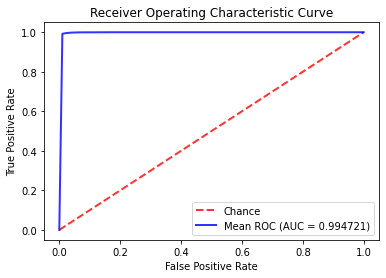

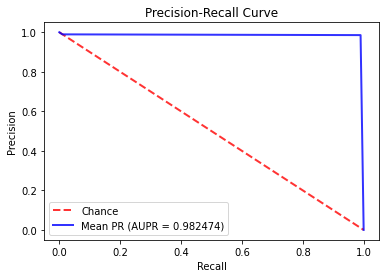

global loocv auc 0.994721 , global loocv aupr 0.982474


In [29]:
tpr_fold = []
precision_fold = []
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)
n = 5430
for filename in tqdm(files):
    print('current cv = {} | total cv = {}'.format(int(filename[35:-4])+1, n))
    
    file = np.load(path + filename)
    y_true = file['y_gloocv_true']
    y_pred = file['y_gloocv_pred']
    y_prob = file['y_gloocv_prob']

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    interp_tpr = interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tpr_fold.append(interp_tpr)

    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    rank_idx = np.argsort(recall)
    recall = recall[rank_idx]
    precision = precision[rank_idx]
    interp_precision = interp(mean_recall, recall, precision)
    interp_precision[0] = 1.0
    precision_fold.append(interp_precision)

#     break

mean_tpr = np.mean(tpr_fold, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plot_roc_curve(mean_fpr, mean_tpr, mean_auc)
# roc = pd.DataFrame({'fpr': mean_fpr, 'tpr': mean_tpr})
# roc.to_csv(save_path + 'gloocv_roc.csv', index=False)

mean_precision = np.mean(precision_fold, axis=0)
mean_precision[-1] = 0.0
mean_aupr = auc(mean_recall, mean_precision)
plot_pr_curve(mean_recall, mean_precision, mean_aupr)
# pr = pd.DataFrame({'recall': mean_recall, 'precision': mean_precision})
# pr.to_csv(save_path + 'gloocv_pr.csv', index=False)

print('global loocv auc %0.6f' % mean_auc, ', global loocv aupr %0.6f' % mean_aupr)

# Local LOOCV

In [30]:
path = '/home/chujunyi/4_GNN/GraphSAINT/miRNA_disease__localLOOCV/y_val/'
print(path)
files = os.listdir(path)
files.sort(key= lambda x:int(x[35:-4]))
files

/home/chujunyi/4_GNN/GraphSAINT/miRNA_disease__localLOOCV/y_val/


['task_Tp__testlabel0_10knn_edge_fold0.npz',
 'task_Tp__testlabel0_10knn_edge_fold1.npz',
 'task_Tp__testlabel0_10knn_edge_fold2.npz',
 'task_Tp__testlabel0_10knn_edge_fold3.npz',
 'task_Tp__testlabel0_10knn_edge_fold4.npz',
 'task_Tp__testlabel0_10knn_edge_fold5.npz',
 'task_Tp__testlabel0_10knn_edge_fold6.npz',
 'task_Tp__testlabel0_10knn_edge_fold7.npz',
 'task_Tp__testlabel0_10knn_edge_fold8.npz',
 'task_Tp__testlabel0_10knn_edge_fold9.npz',
 'task_Tp__testlabel0_10knn_edge_fold10.npz',
 'task_Tp__testlabel0_10knn_edge_fold11.npz',
 'task_Tp__testlabel0_10knn_edge_fold12.npz',
 'task_Tp__testlabel0_10knn_edge_fold13.npz',
 'task_Tp__testlabel0_10knn_edge_fold14.npz',
 'task_Tp__testlabel0_10knn_edge_fold15.npz',
 'task_Tp__testlabel0_10knn_edge_fold16.npz',
 'task_Tp__testlabel0_10knn_edge_fold17.npz',
 'task_Tp__testlabel0_10knn_edge_fold18.npz',
 'task_Tp__testlabel0_10knn_edge_fold19.npz',
 'task_Tp__testlabel0_10knn_edge_fold20.npz',
 'task_Tp__testlabel0_10knn_edge_fold21.npz'

  1%|          | 31/5430 [00:00<00:17, 309.47it/s]

current cv = 1 | total cv = 5430
current cv = 2 | total cv = 5430
current cv = 3 | total cv = 5430
current cv = 4 | total cv = 5430
current cv = 5 | total cv = 5430
current cv = 6 | total cv = 5430
current cv = 7 | total cv = 5430
current cv = 8 | total cv = 5430
current cv = 9 | total cv = 5430
current cv = 10 | total cv = 5430
current cv = 11 | total cv = 5430
current cv = 12 | total cv = 5430
current cv = 13 | total cv = 5430
current cv = 14 | total cv = 5430
current cv = 15 | total cv = 5430
current cv = 16 | total cv = 5430
current cv = 17 | total cv = 5430
current cv = 18 | total cv = 5430
current cv = 19 | total cv = 5430
current cv = 20 | total cv = 5430
current cv = 21 | total cv = 5430
current cv = 22 | total cv = 5430
current cv = 23 | total cv = 5430
current cv = 24 | total cv = 5430
current cv = 25 | total cv = 5430
current cv = 26 | total cv = 5430
current cv = 27 | total cv = 5430
current cv = 28 | total cv = 5430
current cv = 29 | total cv = 5430
current cv = 30 | total

  2%|▏         | 95/5430 [00:00<00:17, 309.64it/s]

current cv = 64 | total cv = 5430
current cv = 65 | total cv = 5430
current cv = 66 | total cv = 5430
current cv = 67 | total cv = 5430
current cv = 68 | total cv = 5430
current cv = 69 | total cv = 5430
current cv = 70 | total cv = 5430
current cv = 71 | total cv = 5430
current cv = 72 | total cv = 5430
current cv = 73 | total cv = 5430
current cv = 74 | total cv = 5430
current cv = 75 | total cv = 5430
current cv = 76 | total cv = 5430
current cv = 77 | total cv = 5430
current cv = 78 | total cv = 5430
current cv = 79 | total cv = 5430
current cv = 80 | total cv = 5430
current cv = 81 | total cv = 5430
current cv = 82 | total cv = 5430
current cv = 83 | total cv = 5430
current cv = 84 | total cv = 5430
current cv = 85 | total cv = 5430
current cv = 86 | total cv = 5430
current cv = 87 | total cv = 5430
current cv = 88 | total cv = 5430
current cv = 89 | total cv = 5430
current cv = 90 | total cv = 5430
current cv = 91 | total cv = 5430
current cv = 92 | total cv = 5430
current cv = 9

  3%|▎         | 158/5430 [00:00<00:17, 308.96it/s]

current cv = 127 | total cv = 5430
current cv = 128 | total cv = 5430
current cv = 129 | total cv = 5430
current cv = 130 | total cv = 5430
current cv = 131 | total cv = 5430
current cv = 132 | total cv = 5430
current cv = 133 | total cv = 5430
current cv = 134 | total cv = 5430
current cv = 135 | total cv = 5430
current cv = 136 | total cv = 5430
current cv = 137 | total cv = 5430
current cv = 138 | total cv = 5430
current cv = 139 | total cv = 5430
current cv = 140 | total cv = 5430
current cv = 141 | total cv = 5430
current cv = 142 | total cv = 5430
current cv = 143 | total cv = 5430
current cv = 144 | total cv = 5430
current cv = 145 | total cv = 5430
current cv = 146 | total cv = 5430
current cv = 147 | total cv = 5430
current cv = 148 | total cv = 5430
current cv = 149 | total cv = 5430
current cv = 150 | total cv = 5430
current cv = 151 | total cv = 5430
current cv = 152 | total cv = 5430
current cv = 153 | total cv = 5430
current cv = 154 | total cv = 5430
current cv = 155 | t

  4%|▍         | 221/5430 [00:00<00:16, 309.71it/s]

current cv = 190 | total cv = 5430
current cv = 191 | total cv = 5430
current cv = 192 | total cv = 5430
current cv = 193 | total cv = 5430
current cv = 194 | total cv = 5430
current cv = 195 | total cv = 5430
current cv = 196 | total cv = 5430
current cv = 197 | total cv = 5430
current cv = 198 | total cv = 5430
current cv = 199 | total cv = 5430
current cv = 200 | total cv = 5430
current cv = 201 | total cv = 5430
current cv = 202 | total cv = 5430
current cv = 203 | total cv = 5430
current cv = 204 | total cv = 5430
current cv = 205 | total cv = 5430
current cv = 206 | total cv = 5430
current cv = 207 | total cv = 5430
current cv = 208 | total cv = 5430
current cv = 209 | total cv = 5430
current cv = 210 | total cv = 5430
current cv = 211 | total cv = 5430
current cv = 212 | total cv = 5430
current cv = 213 | total cv = 5430
current cv = 214 | total cv = 5430
current cv = 215 | total cv = 5430
current cv = 216 | total cv = 5430
current cv = 217 | total cv = 5430
current cv = 218 | t

  5%|▌         | 284/5430 [00:00<00:16, 309.08it/s]

current cv = 253 | total cv = 5430
current cv = 254 | total cv = 5430
current cv = 255 | total cv = 5430
current cv = 256 | total cv = 5430
current cv = 257 | total cv = 5430
current cv = 258 | total cv = 5430
current cv = 259 | total cv = 5430
current cv = 260 | total cv = 5430
current cv = 261 | total cv = 5430
current cv = 262 | total cv = 5430
current cv = 263 | total cv = 5430
current cv = 264 | total cv = 5430
current cv = 265 | total cv = 5430
current cv = 266 | total cv = 5430
current cv = 267 | total cv = 5430
current cv = 268 | total cv = 5430
current cv = 269 | total cv = 5430
current cv = 270 | total cv = 5430
current cv = 271 | total cv = 5430
current cv = 272 | total cv = 5430
current cv = 273 | total cv = 5430
current cv = 274 | total cv = 5430
current cv = 275 | total cv = 5430
current cv = 276 | total cv = 5430
current cv = 277 | total cv = 5430
current cv = 278 | total cv = 5430
current cv = 279 | total cv = 5430
current cv = 280 | total cv = 5430
current cv = 281 | t

  6%|▋         | 347/5430 [00:01<00:16, 309.30it/s]

current cv = 316 | total cv = 5430
current cv = 317 | total cv = 5430
current cv = 318 | total cv = 5430
current cv = 319 | total cv = 5430
current cv = 320 | total cv = 5430
current cv = 321 | total cv = 5430
current cv = 322 | total cv = 5430
current cv = 323 | total cv = 5430
current cv = 324 | total cv = 5430
current cv = 325 | total cv = 5430
current cv = 326 | total cv = 5430
current cv = 327 | total cv = 5430
current cv = 328 | total cv = 5430
current cv = 329 | total cv = 5430
current cv = 330 | total cv = 5430
current cv = 331 | total cv = 5430
current cv = 332 | total cv = 5430
current cv = 333 | total cv = 5430
current cv = 334 | total cv = 5430
current cv = 335 | total cv = 5430
current cv = 336 | total cv = 5430
current cv = 337 | total cv = 5430
current cv = 338 | total cv = 5430
current cv = 339 | total cv = 5430
current cv = 340 | total cv = 5430
current cv = 341 | total cv = 5430
current cv = 342 | total cv = 5430
current cv = 343 | total cv = 5430
current cv = 344 | t

  8%|▊         | 410/5430 [00:01<00:16, 310.18it/s]

current cv = 379 | total cv = 5430
current cv = 380 | total cv = 5430
current cv = 381 | total cv = 5430
current cv = 382 | total cv = 5430
current cv = 383 | total cv = 5430
current cv = 384 | total cv = 5430
current cv = 385 | total cv = 5430
current cv = 386 | total cv = 5430
current cv = 387 | total cv = 5430
current cv = 388 | total cv = 5430
current cv = 389 | total cv = 5430
current cv = 390 | total cv = 5430
current cv = 391 | total cv = 5430
current cv = 392 | total cv = 5430
current cv = 393 | total cv = 5430
current cv = 394 | total cv = 5430
current cv = 395 | total cv = 5430
current cv = 396 | total cv = 5430
current cv = 397 | total cv = 5430
current cv = 398 | total cv = 5430
current cv = 399 | total cv = 5430
current cv = 400 | total cv = 5430
current cv = 401 | total cv = 5430
current cv = 402 | total cv = 5430
current cv = 403 | total cv = 5430
current cv = 404 | total cv = 5430
current cv = 405 | total cv = 5430
current cv = 406 | total cv = 5430
current cv = 407 | t

  9%|▊         | 474/5430 [00:01<00:15, 310.69it/s]

current cv = 443 | total cv = 5430
current cv = 444 | total cv = 5430
current cv = 445 | total cv = 5430
current cv = 446 | total cv = 5430
current cv = 447 | total cv = 5430
current cv = 448 | total cv = 5430
current cv = 449 | total cv = 5430
current cv = 450 | total cv = 5430
current cv = 451 | total cv = 5430
current cv = 452 | total cv = 5430
current cv = 453 | total cv = 5430
current cv = 454 | total cv = 5430
current cv = 455 | total cv = 5430
current cv = 456 | total cv = 5430
current cv = 457 | total cv = 5430
current cv = 458 | total cv = 5430
current cv = 459 | total cv = 5430
current cv = 460 | total cv = 5430
current cv = 461 | total cv = 5430
current cv = 462 | total cv = 5430
current cv = 463 | total cv = 5430
current cv = 464 | total cv = 5430
current cv = 465 | total cv = 5430
current cv = 466 | total cv = 5430
current cv = 467 | total cv = 5430
current cv = 468 | total cv = 5430
current cv = 469 | total cv = 5430
current cv = 470 | total cv = 5430
current cv = 471 | t

 10%|▉         | 538/5430 [00:01<00:15, 312.35it/s]

current cv = 506 | total cv = 5430
current cv = 507 | total cv = 5430
current cv = 508 | total cv = 5430
current cv = 509 | total cv = 5430
current cv = 510 | total cv = 5430
current cv = 511 | total cv = 5430
current cv = 512 | total cv = 5430
current cv = 513 | total cv = 5430
current cv = 514 | total cv = 5430
current cv = 515 | total cv = 5430
current cv = 516 | total cv = 5430
current cv = 517 | total cv = 5430
current cv = 518 | total cv = 5430
current cv = 519 | total cv = 5430
current cv = 520 | total cv = 5430
current cv = 521 | total cv = 5430
current cv = 522 | total cv = 5430
current cv = 523 | total cv = 5430
current cv = 524 | total cv = 5430
current cv = 525 | total cv = 5430
current cv = 526 | total cv = 5430
current cv = 527 | total cv = 5430
current cv = 528 | total cv = 5430
current cv = 529 | total cv = 5430
current cv = 530 | total cv = 5430
current cv = 531 | total cv = 5430
current cv = 532 | total cv = 5430
current cv = 533 | total cv = 5430
current cv = 534 | t

 11%|█         | 602/5430 [00:01<00:15, 312.47it/s]

current cv = 570 | total cv = 5430
current cv = 571 | total cv = 5430
current cv = 572 | total cv = 5430
current cv = 573 | total cv = 5430
current cv = 574 | total cv = 5430
current cv = 575 | total cv = 5430
current cv = 576 | total cv = 5430
current cv = 577 | total cv = 5430
current cv = 578 | total cv = 5430
current cv = 579 | total cv = 5430
current cv = 580 | total cv = 5430
current cv = 581 | total cv = 5430
current cv = 582 | total cv = 5430
current cv = 583 | total cv = 5430
current cv = 584 | total cv = 5430
current cv = 585 | total cv = 5430
current cv = 586 | total cv = 5430
current cv = 587 | total cv = 5430
current cv = 588 | total cv = 5430
current cv = 589 | total cv = 5430
current cv = 590 | total cv = 5430
current cv = 591 | total cv = 5430
current cv = 592 | total cv = 5430
current cv = 593 | total cv = 5430
current cv = 594 | total cv = 5430
current cv = 595 | total cv = 5430
current cv = 596 | total cv = 5430
current cv = 597 | total cv = 5430
current cv = 598 | t

 12%|█▏        | 666/5430 [00:02<00:15, 312.15it/s]

current cv = 634 | total cv = 5430
current cv = 635 | total cv = 5430
current cv = 636 | total cv = 5430
current cv = 637 | total cv = 5430
current cv = 638 | total cv = 5430
current cv = 639 | total cv = 5430
current cv = 640 | total cv = 5430
current cv = 641 | total cv = 5430
current cv = 642 | total cv = 5430
current cv = 643 | total cv = 5430
current cv = 644 | total cv = 5430
current cv = 645 | total cv = 5430
current cv = 646 | total cv = 5430
current cv = 647 | total cv = 5430
current cv = 648 | total cv = 5430
current cv = 649 | total cv = 5430
current cv = 650 | total cv = 5430
current cv = 651 | total cv = 5430
current cv = 652 | total cv = 5430
current cv = 653 | total cv = 5430
current cv = 654 | total cv = 5430
current cv = 655 | total cv = 5430
current cv = 656 | total cv = 5430
current cv = 657 | total cv = 5430
current cv = 658 | total cv = 5430
current cv = 659 | total cv = 5430
current cv = 660 | total cv = 5430
current cv = 661 | total cv = 5430
current cv = 662 | t

 13%|█▎        | 730/5430 [00:02<00:15, 311.19it/s]

current cv = 697 | total cv = 5430
current cv = 698 | total cv = 5430
current cv = 699 | total cv = 5430
current cv = 700 | total cv = 5430
current cv = 701 | total cv = 5430
current cv = 702 | total cv = 5430
current cv = 703 | total cv = 5430
current cv = 704 | total cv = 5430
current cv = 705 | total cv = 5430
current cv = 706 | total cv = 5430
current cv = 707 | total cv = 5430
current cv = 708 | total cv = 5430
current cv = 709 | total cv = 5430
current cv = 710 | total cv = 5430
current cv = 711 | total cv = 5430
current cv = 712 | total cv = 5430
current cv = 713 | total cv = 5430
current cv = 714 | total cv = 5430
current cv = 715 | total cv = 5430
current cv = 716 | total cv = 5430
current cv = 717 | total cv = 5430
current cv = 718 | total cv = 5430
current cv = 719 | total cv = 5430
current cv = 720 | total cv = 5430
current cv = 721 | total cv = 5430
current cv = 722 | total cv = 5430
current cv = 723 | total cv = 5430
current cv = 724 | total cv = 5430
current cv = 725 | t

 15%|█▍        | 794/5430 [00:02<00:14, 309.41it/s]

current cv = 760 | total cv = 5430
current cv = 761 | total cv = 5430
current cv = 762 | total cv = 5430
current cv = 763 | total cv = 5430
current cv = 764 | total cv = 5430
current cv = 765 | total cv = 5430
current cv = 766 | total cv = 5430
current cv = 767 | total cv = 5430
current cv = 768 | total cv = 5430
current cv = 769 | total cv = 5430
current cv = 770 | total cv = 5430
current cv = 771 | total cv = 5430
current cv = 772 | total cv = 5430
current cv = 773 | total cv = 5430
current cv = 774 | total cv = 5430
current cv = 775 | total cv = 5430
current cv = 776 | total cv = 5430
current cv = 777 | total cv = 5430
current cv = 778 | total cv = 5430
current cv = 779 | total cv = 5430
current cv = 780 | total cv = 5430
current cv = 781 | total cv = 5430
current cv = 782 | total cv = 5430
current cv = 783 | total cv = 5430
current cv = 784 | total cv = 5430
current cv = 785 | total cv = 5430
current cv = 786 | total cv = 5430
current cv = 787 | total cv = 5430
current cv = 788 | t

 16%|█▌        | 858/5430 [00:02<00:14, 311.56it/s]

current cv = 823 | total cv = 5430
current cv = 824 | total cv = 5430
current cv = 825 | total cv = 5430
current cv = 826 | total cv = 5430
current cv = 827 | total cv = 5430
current cv = 828 | total cv = 5430
current cv = 829 | total cv = 5430
current cv = 830 | total cv = 5430
current cv = 831 | total cv = 5430
current cv = 832 | total cv = 5430
current cv = 833 | total cv = 5430
current cv = 834 | total cv = 5430
current cv = 835 | total cv = 5430
current cv = 836 | total cv = 5430
current cv = 837 | total cv = 5430
current cv = 838 | total cv = 5430
current cv = 839 | total cv = 5430
current cv = 840 | total cv = 5430
current cv = 841 | total cv = 5430
current cv = 842 | total cv = 5430
current cv = 843 | total cv = 5430
current cv = 844 | total cv = 5430
current cv = 845 | total cv = 5430
current cv = 846 | total cv = 5430
current cv = 847 | total cv = 5430
current cv = 848 | total cv = 5430
current cv = 849 | total cv = 5430
current cv = 850 | total cv = 5430
current cv = 851 | t

 17%|█▋        | 922/5430 [00:02<00:14, 311.83it/s]

current cv = 886 | total cv = 5430
current cv = 887 | total cv = 5430
current cv = 888 | total cv = 5430
current cv = 889 | total cv = 5430
current cv = 890 | total cv = 5430
current cv = 891 | total cv = 5430
current cv = 892 | total cv = 5430
current cv = 893 | total cv = 5430
current cv = 894 | total cv = 5430
current cv = 895 | total cv = 5430
current cv = 896 | total cv = 5430
current cv = 897 | total cv = 5430
current cv = 898 | total cv = 5430
current cv = 899 | total cv = 5430
current cv = 900 | total cv = 5430
current cv = 901 | total cv = 5430
current cv = 902 | total cv = 5430
current cv = 903 | total cv = 5430
current cv = 904 | total cv = 5430
current cv = 905 | total cv = 5430
current cv = 906 | total cv = 5430
current cv = 907 | total cv = 5430
current cv = 908 | total cv = 5430
current cv = 909 | total cv = 5430
current cv = 910 | total cv = 5430
current cv = 911 | total cv = 5430
current cv = 912 | total cv = 5430
current cv = 913 | total cv = 5430
current cv = 914 | t

 18%|█▊        | 986/5430 [00:03<00:14, 310.81it/s]

current cv = 949 | total cv = 5430
current cv = 950 | total cv = 5430
current cv = 951 | total cv = 5430
current cv = 952 | total cv = 5430
current cv = 953 | total cv = 5430
current cv = 954 | total cv = 5430
current cv = 955 | total cv = 5430
current cv = 956 | total cv = 5430
current cv = 957 | total cv = 5430
current cv = 958 | total cv = 5430
current cv = 959 | total cv = 5430
current cv = 960 | total cv = 5430
current cv = 961 | total cv = 5430
current cv = 962 | total cv = 5430
current cv = 963 | total cv = 5430
current cv = 964 | total cv = 5430
current cv = 965 | total cv = 5430
current cv = 966 | total cv = 5430
current cv = 967 | total cv = 5430
current cv = 968 | total cv = 5430
current cv = 969 | total cv = 5430
current cv = 970 | total cv = 5430
current cv = 971 | total cv = 5430
current cv = 972 | total cv = 5430
current cv = 973 | total cv = 5430
current cv = 974 | total cv = 5430
current cv = 975 | total cv = 5430
current cv = 976 | total cv = 5430
current cv = 977 | t

 19%|█▉        | 1049/5430 [00:03<00:14, 309.28it/s]

current cv = 1012 | total cv = 5430
current cv = 1013 | total cv = 5430
current cv = 1014 | total cv = 5430
current cv = 1015 | total cv = 5430
current cv = 1016 | total cv = 5430
current cv = 1017 | total cv = 5430
current cv = 1018 | total cv = 5430
current cv = 1019 | total cv = 5430
current cv = 1020 | total cv = 5430
current cv = 1021 | total cv = 5430
current cv = 1022 | total cv = 5430
current cv = 1023 | total cv = 5430
current cv = 1024 | total cv = 5430
current cv = 1025 | total cv = 5430
current cv = 1026 | total cv = 5430
current cv = 1027 | total cv = 5430
current cv = 1028 | total cv = 5430
current cv = 1029 | total cv = 5430
current cv = 1030 | total cv = 5430
current cv = 1031 | total cv = 5430
current cv = 1032 | total cv = 5430
current cv = 1033 | total cv = 5430
current cv = 1034 | total cv = 5430
current cv = 1035 | total cv = 5430
current cv = 1036 | total cv = 5430
current cv = 1037 | total cv = 5430
current cv = 1038 | total cv = 5430
current cv = 1039 | total cv

 20%|██        | 1112/5430 [00:03<00:13, 309.56it/s]

current cv = 1075 | total cv = 5430
current cv = 1076 | total cv = 5430
current cv = 1077 | total cv = 5430
current cv = 1078 | total cv = 5430
current cv = 1079 | total cv = 5430
current cv = 1080 | total cv = 5430
current cv = 1081 | total cv = 5430
current cv = 1082 | total cv = 5430
current cv = 1083 | total cv = 5430
current cv = 1084 | total cv = 5430
current cv = 1085 | total cv = 5430
current cv = 1086 | total cv = 5430
current cv = 1087 | total cv = 5430
current cv = 1088 | total cv = 5430
current cv = 1089 | total cv = 5430
current cv = 1090 | total cv = 5430
current cv = 1091 | total cv = 5430
current cv = 1092 | total cv = 5430
current cv = 1093 | total cv = 5430
current cv = 1094 | total cv = 5430
current cv = 1095 | total cv = 5430
current cv = 1096 | total cv = 5430
current cv = 1097 | total cv = 5430
current cv = 1098 | total cv = 5430
current cv = 1099 | total cv = 5430
current cv = 1100 | total cv = 5430
current cv = 1101 | total cv = 5430
current cv = 1102 | total cv

 22%|██▏       | 1174/5430 [00:03<00:13, 309.34it/s]

current cv = 1138 | total cv = 5430
current cv = 1139 | total cv = 5430
current cv = 1140 | total cv = 5430
current cv = 1141 | total cv = 5430
current cv = 1142 | total cv = 5430
current cv = 1143 | total cv = 5430
current cv = 1144 | total cv = 5430
current cv = 1145 | total cv = 5430
current cv = 1146 | total cv = 5430
current cv = 1147 | total cv = 5430
current cv = 1148 | total cv = 5430
current cv = 1149 | total cv = 5430
current cv = 1150 | total cv = 5430
current cv = 1151 | total cv = 5430
current cv = 1152 | total cv = 5430
current cv = 1153 | total cv = 5430
current cv = 1154 | total cv = 5430
current cv = 1155 | total cv = 5430
current cv = 1156 | total cv = 5430
current cv = 1157 | total cv = 5430
current cv = 1158 | total cv = 5430
current cv = 1159 | total cv = 5430
current cv = 1160 | total cv = 5430
current cv = 1161 | total cv = 5430
current cv = 1162 | total cv = 5430
current cv = 1163 | total cv = 5430
current cv = 1164 | total cv = 5430
current cv = 1165 | total cv

 23%|██▎       | 1238/5430 [00:03<00:13, 311.19it/s]

current cv = 1201 | total cv = 5430
current cv = 1202 | total cv = 5430
current cv = 1203 | total cv = 5430
current cv = 1204 | total cv = 5430
current cv = 1205 | total cv = 5430
current cv = 1206 | total cv = 5430
current cv = 1207 | total cv = 5430
current cv = 1208 | total cv = 5430
current cv = 1209 | total cv = 5430
current cv = 1210 | total cv = 5430
current cv = 1211 | total cv = 5430
current cv = 1212 | total cv = 5430
current cv = 1213 | total cv = 5430
current cv = 1214 | total cv = 5430
current cv = 1215 | total cv = 5430
current cv = 1216 | total cv = 5430
current cv = 1217 | total cv = 5430
current cv = 1218 | total cv = 5430
current cv = 1219 | total cv = 5430
current cv = 1220 | total cv = 5430
current cv = 1221 | total cv = 5430
current cv = 1222 | total cv = 5430
current cv = 1223 | total cv = 5430
current cv = 1224 | total cv = 5430
current cv = 1225 | total cv = 5430
current cv = 1226 | total cv = 5430
current cv = 1227 | total cv = 5430
current cv = 1228 | total cv

 24%|██▍       | 1302/5430 [00:04<00:13, 310.47it/s]

current cv = 1264 | total cv = 5430
current cv = 1265 | total cv = 5430
current cv = 1266 | total cv = 5430
current cv = 1267 | total cv = 5430
current cv = 1268 | total cv = 5430
current cv = 1269 | total cv = 5430
current cv = 1270 | total cv = 5430
current cv = 1271 | total cv = 5430
current cv = 1272 | total cv = 5430
current cv = 1273 | total cv = 5430
current cv = 1274 | total cv = 5430
current cv = 1275 | total cv = 5430
current cv = 1276 | total cv = 5430
current cv = 1277 | total cv = 5430
current cv = 1278 | total cv = 5430
current cv = 1279 | total cv = 5430
current cv = 1280 | total cv = 5430
current cv = 1281 | total cv = 5430
current cv = 1282 | total cv = 5430
current cv = 1283 | total cv = 5430
current cv = 1284 | total cv = 5430
current cv = 1285 | total cv = 5430
current cv = 1286 | total cv = 5430
current cv = 1287 | total cv = 5430
current cv = 1288 | total cv = 5430
current cv = 1289 | total cv = 5430
current cv = 1290 | total cv = 5430
current cv = 1291 | total cv

 25%|██▌       | 1366/5430 [00:04<00:13, 311.70it/s]

current cv = 1327 | total cv = 5430
current cv = 1328 | total cv = 5430
current cv = 1329 | total cv = 5430
current cv = 1330 | total cv = 5430
current cv = 1331 | total cv = 5430
current cv = 1332 | total cv = 5430
current cv = 1333 | total cv = 5430
current cv = 1334 | total cv = 5430
current cv = 1335 | total cv = 5430
current cv = 1336 | total cv = 5430
current cv = 1337 | total cv = 5430
current cv = 1338 | total cv = 5430
current cv = 1339 | total cv = 5430
current cv = 1340 | total cv = 5430
current cv = 1341 | total cv = 5430
current cv = 1342 | total cv = 5430
current cv = 1343 | total cv = 5430
current cv = 1344 | total cv = 5430
current cv = 1345 | total cv = 5430
current cv = 1346 | total cv = 5430
current cv = 1347 | total cv = 5430
current cv = 1348 | total cv = 5430
current cv = 1349 | total cv = 5430
current cv = 1350 | total cv = 5430
current cv = 1351 | total cv = 5430
current cv = 1352 | total cv = 5430
current cv = 1353 | total cv = 5430
current cv = 1354 | total cv

 26%|██▋       | 1433/5430 [00:04<00:12, 319.97it/s]

current cv = 1391 | total cv = 5430
current cv = 1392 | total cv = 5430
current cv = 1393 | total cv = 5430
current cv = 1394 | total cv = 5430
current cv = 1395 | total cv = 5430
current cv = 1396 | total cv = 5430
current cv = 1397 | total cv = 5430
current cv = 1398 | total cv = 5430
current cv = 1399 | total cv = 5430
current cv = 1400 | total cv = 5430
current cv = 1401 | total cv = 5430
current cv = 1402 | total cv = 5430
current cv = 1403 | total cv = 5430
current cv = 1404 | total cv = 5430
current cv = 1405 | total cv = 5430
current cv = 1406 | total cv = 5430
current cv = 1407 | total cv = 5430
current cv = 1408 | total cv = 5430
current cv = 1409 | total cv = 5430
current cv = 1410 | total cv = 5430
current cv = 1411 | total cv = 5430
current cv = 1412 | total cv = 5430
current cv = 1413 | total cv = 5430
current cv = 1414 | total cv = 5430
current cv = 1415 | total cv = 5430
current cv = 1416 | total cv = 5430
current cv = 1417 | total cv = 5430
current cv = 1418 | total cv

 28%|██▊       | 1500/5430 [00:04<00:12, 325.36it/s]

current cv = 1458 | total cv = 5430
current cv = 1459 | total cv = 5430
current cv = 1460 | total cv = 5430
current cv = 1461 | total cv = 5430
current cv = 1462 | total cv = 5430
current cv = 1463 | total cv = 5430
current cv = 1464 | total cv = 5430
current cv = 1465 | total cv = 5430
current cv = 1466 | total cv = 5430
current cv = 1467 | total cv = 5430
current cv = 1468 | total cv = 5430
current cv = 1469 | total cv = 5430
current cv = 1470 | total cv = 5430
current cv = 1471 | total cv = 5430
current cv = 1472 | total cv = 5430
current cv = 1473 | total cv = 5430
current cv = 1474 | total cv = 5430
current cv = 1475 | total cv = 5430
current cv = 1476 | total cv = 5430
current cv = 1477 | total cv = 5430
current cv = 1478 | total cv = 5430
current cv = 1479 | total cv = 5430
current cv = 1480 | total cv = 5430
current cv = 1481 | total cv = 5430
current cv = 1482 | total cv = 5430
current cv = 1483 | total cv = 5430
current cv = 1484 | total cv = 5430
current cv = 1485 | total cv

 29%|██▉       | 1566/5430 [00:05<00:11, 326.76it/s]

current cv = 1525 | total cv = 5430
current cv = 1526 | total cv = 5430
current cv = 1527 | total cv = 5430
current cv = 1528 | total cv = 5430
current cv = 1529 | total cv = 5430
current cv = 1530 | total cv = 5430
current cv = 1531 | total cv = 5430
current cv = 1532 | total cv = 5430
current cv = 1533 | total cv = 5430
current cv = 1534 | total cv = 5430
current cv = 1535 | total cv = 5430
current cv = 1536 | total cv = 5430
current cv = 1537 | total cv = 5430
current cv = 1538 | total cv = 5430
current cv = 1539 | total cv = 5430
current cv = 1540 | total cv = 5430
current cv = 1541 | total cv = 5430
current cv = 1542 | total cv = 5430
current cv = 1543 | total cv = 5430
current cv = 1544 | total cv = 5430
current cv = 1545 | total cv = 5430
current cv = 1546 | total cv = 5430
current cv = 1547 | total cv = 5430
current cv = 1548 | total cv = 5430
current cv = 1549 | total cv = 5430
current cv = 1550 | total cv = 5430
current cv = 1551 | total cv = 5430
current cv = 1552 | total cv

 30%|███       | 1633/5430 [00:05<00:11, 328.44it/s]

current cv = 1591 | total cv = 5430
current cv = 1592 | total cv = 5430
current cv = 1593 | total cv = 5430
current cv = 1594 | total cv = 5430
current cv = 1595 | total cv = 5430
current cv = 1596 | total cv = 5430
current cv = 1597 | total cv = 5430
current cv = 1598 | total cv = 5430
current cv = 1599 | total cv = 5430
current cv = 1600 | total cv = 5430
current cv = 1601 | total cv = 5430
current cv = 1602 | total cv = 5430
current cv = 1603 | total cv = 5430
current cv = 1604 | total cv = 5430
current cv = 1605 | total cv = 5430
current cv = 1606 | total cv = 5430
current cv = 1607 | total cv = 5430
current cv = 1608 | total cv = 5430
current cv = 1609 | total cv = 5430
current cv = 1610 | total cv = 5430
current cv = 1611 | total cv = 5430
current cv = 1612 | total cv = 5430
current cv = 1613 | total cv = 5430
current cv = 1614 | total cv = 5430
current cv = 1615 | total cv = 5430
current cv = 1616 | total cv = 5430
current cv = 1617 | total cv = 5430
current cv = 1618 | total cv

 31%|███▏      | 1700/5430 [00:05<00:11, 329.26it/s]

current cv = 1658 | total cv = 5430
current cv = 1659 | total cv = 5430
current cv = 1660 | total cv = 5430
current cv = 1661 | total cv = 5430
current cv = 1662 | total cv = 5430
current cv = 1663 | total cv = 5430
current cv = 1664 | total cv = 5430
current cv = 1665 | total cv = 5430
current cv = 1666 | total cv = 5430
current cv = 1667 | total cv = 5430
current cv = 1668 | total cv = 5430
current cv = 1669 | total cv = 5430
current cv = 1670 | total cv = 5430
current cv = 1671 | total cv = 5430
current cv = 1672 | total cv = 5430
current cv = 1673 | total cv = 5430
current cv = 1674 | total cv = 5430
current cv = 1675 | total cv = 5430
current cv = 1676 | total cv = 5430
current cv = 1677 | total cv = 5430
current cv = 1678 | total cv = 5430
current cv = 1679 | total cv = 5430
current cv = 1680 | total cv = 5430
current cv = 1681 | total cv = 5430
current cv = 1682 | total cv = 5430
current cv = 1683 | total cv = 5430
current cv = 1684 | total cv = 5430
current cv = 1685 | total cv

 33%|███▎      | 1766/5430 [00:05<00:11, 328.78it/s]

current cv = 1724 | total cv = 5430
current cv = 1725 | total cv = 5430
current cv = 1726 | total cv = 5430
current cv = 1727 | total cv = 5430
current cv = 1728 | total cv = 5430
current cv = 1729 | total cv = 5430
current cv = 1730 | total cv = 5430
current cv = 1731 | total cv = 5430
current cv = 1732 | total cv = 5430
current cv = 1733 | total cv = 5430
current cv = 1734 | total cv = 5430
current cv = 1735 | total cv = 5430
current cv = 1736 | total cv = 5430
current cv = 1737 | total cv = 5430
current cv = 1738 | total cv = 5430
current cv = 1739 | total cv = 5430
current cv = 1740 | total cv = 5430
current cv = 1741 | total cv = 5430
current cv = 1742 | total cv = 5430
current cv = 1743 | total cv = 5430
current cv = 1744 | total cv = 5430
current cv = 1745 | total cv = 5430
current cv = 1746 | total cv = 5430
current cv = 1747 | total cv = 5430
current cv = 1748 | total cv = 5430
current cv = 1749 | total cv = 5430
current cv = 1750 | total cv = 5430
current cv = 1751 | total cv

 34%|███▎      | 1832/5430 [00:05<00:10, 328.47it/s]

current cv = 1791 | total cv = 5430
current cv = 1792 | total cv = 5430
current cv = 1793 | total cv = 5430
current cv = 1794 | total cv = 5430
current cv = 1795 | total cv = 5430
current cv = 1796 | total cv = 5430
current cv = 1797 | total cv = 5430
current cv = 1798 | total cv = 5430
current cv = 1799 | total cv = 5430
current cv = 1800 | total cv = 5430
current cv = 1801 | total cv = 5430
current cv = 1802 | total cv = 5430
current cv = 1803 | total cv = 5430
current cv = 1804 | total cv = 5430
current cv = 1805 | total cv = 5430
current cv = 1806 | total cv = 5430
current cv = 1807 | total cv = 5430
current cv = 1808 | total cv = 5430
current cv = 1809 | total cv = 5430
current cv = 1810 | total cv = 5430
current cv = 1811 | total cv = 5430
current cv = 1812 | total cv = 5430
current cv = 1813 | total cv = 5430
current cv = 1814 | total cv = 5430
current cv = 1815 | total cv = 5430
current cv = 1816 | total cv = 5430
current cv = 1817 | total cv = 5430
current cv = 1818 | total cv

 35%|███▍      | 1898/5430 [00:06<00:10, 325.46it/s]

current cv = 1857 | total cv = 5430
current cv = 1858 | total cv = 5430
current cv = 1859 | total cv = 5430
current cv = 1860 | total cv = 5430
current cv = 1861 | total cv = 5430
current cv = 1862 | total cv = 5430
current cv = 1863 | total cv = 5430
current cv = 1864 | total cv = 5430
current cv = 1865 | total cv = 5430
current cv = 1866 | total cv = 5430
current cv = 1867 | total cv = 5430
current cv = 1868 | total cv = 5430
current cv = 1869 | total cv = 5430
current cv = 1870 | total cv = 5430
current cv = 1871 | total cv = 5430
current cv = 1872 | total cv = 5430
current cv = 1873 | total cv = 5430
current cv = 1874 | total cv = 5430
current cv = 1875 | total cv = 5430
current cv = 1876 | total cv = 5430
current cv = 1877 | total cv = 5430
current cv = 1878 | total cv = 5430
current cv = 1879 | total cv = 5430
current cv = 1880 | total cv = 5430
current cv = 1881 | total cv = 5430
current cv = 1882 | total cv = 5430
current cv = 1883 | total cv = 5430
current cv = 1884 | total cv

 36%|███▌      | 1965/5430 [00:06<00:10, 328.49it/s]

current cv = 1923 | total cv = 5430
current cv = 1924 | total cv = 5430
current cv = 1925 | total cv = 5430
current cv = 1926 | total cv = 5430
current cv = 1927 | total cv = 5430
current cv = 1928 | total cv = 5430
current cv = 1929 | total cv = 5430
current cv = 1930 | total cv = 5430
current cv = 1931 | total cv = 5430
current cv = 1932 | total cv = 5430
current cv = 1933 | total cv = 5430
current cv = 1934 | total cv = 5430
current cv = 1935 | total cv = 5430
current cv = 1936 | total cv = 5430
current cv = 1937 | total cv = 5430
current cv = 1938 | total cv = 5430
current cv = 1939 | total cv = 5430
current cv = 1940 | total cv = 5430
current cv = 1941 | total cv = 5430
current cv = 1942 | total cv = 5430
current cv = 1943 | total cv = 5430
current cv = 1944 | total cv = 5430
current cv = 1945 | total cv = 5430
current cv = 1946 | total cv = 5430
current cv = 1947 | total cv = 5430
current cv = 1948 | total cv = 5430
current cv = 1949 | total cv = 5430
current cv = 1950 | total cv

 37%|███▋      | 2032/5430 [00:06<00:10, 330.16it/s]

current cv = 1990 | total cv = 5430
current cv = 1991 | total cv = 5430
current cv = 1992 | total cv = 5430
current cv = 1993 | total cv = 5430
current cv = 1994 | total cv = 5430
current cv = 1995 | total cv = 5430
current cv = 1996 | total cv = 5430
current cv = 1997 | total cv = 5430
current cv = 1998 | total cv = 5430
current cv = 1999 | total cv = 5430
current cv = 2000 | total cv = 5430
current cv = 2001 | total cv = 5430
current cv = 2002 | total cv = 5430
current cv = 2003 | total cv = 5430
current cv = 2004 | total cv = 5430
current cv = 2005 | total cv = 5430
current cv = 2006 | total cv = 5430
current cv = 2007 | total cv = 5430
current cv = 2008 | total cv = 5430
current cv = 2009 | total cv = 5430
current cv = 2010 | total cv = 5430
current cv = 2011 | total cv = 5430
current cv = 2012 | total cv = 5430
current cv = 2013 | total cv = 5430
current cv = 2014 | total cv = 5430
current cv = 2015 | total cv = 5430
current cv = 2016 | total cv = 5430
current cv = 2017 | total cv

 39%|███▊      | 2100/5430 [00:06<00:10, 332.22it/s]

current cv = 2058 | total cv = 5430
current cv = 2059 | total cv = 5430
current cv = 2060 | total cv = 5430
current cv = 2061 | total cv = 5430
current cv = 2062 | total cv = 5430
current cv = 2063 | total cv = 5430
current cv = 2064 | total cv = 5430
current cv = 2065 | total cv = 5430
current cv = 2066 | total cv = 5430
current cv = 2067 | total cv = 5430
current cv = 2068 | total cv = 5430
current cv = 2069 | total cv = 5430
current cv = 2070 | total cv = 5430
current cv = 2071 | total cv = 5430
current cv = 2072 | total cv = 5430
current cv = 2073 | total cv = 5430
current cv = 2074 | total cv = 5430
current cv = 2075 | total cv = 5430
current cv = 2076 | total cv = 5430
current cv = 2077 | total cv = 5430
current cv = 2078 | total cv = 5430
current cv = 2079 | total cv = 5430
current cv = 2080 | total cv = 5430
current cv = 2081 | total cv = 5430
current cv = 2082 | total cv = 5430
current cv = 2083 | total cv = 5430
current cv = 2084 | total cv = 5430
current cv = 2085 | total cv

 40%|███▉      | 2168/5430 [00:06<00:09, 331.28it/s]

current cv = 2126 | total cv = 5430
current cv = 2127 | total cv = 5430
current cv = 2128 | total cv = 5430
current cv = 2129 | total cv = 5430
current cv = 2130 | total cv = 5430
current cv = 2131 | total cv = 5430
current cv = 2132 | total cv = 5430
current cv = 2133 | total cv = 5430
current cv = 2134 | total cv = 5430
current cv = 2135 | total cv = 5430
current cv = 2136 | total cv = 5430
current cv = 2137 | total cv = 5430
current cv = 2138 | total cv = 5430
current cv = 2139 | total cv = 5430
current cv = 2140 | total cv = 5430
current cv = 2141 | total cv = 5430
current cv = 2142 | total cv = 5430
current cv = 2143 | total cv = 5430
current cv = 2144 | total cv = 5430
current cv = 2145 | total cv = 5430
current cv = 2146 | total cv = 5430
current cv = 2147 | total cv = 5430
current cv = 2148 | total cv = 5430
current cv = 2149 | total cv = 5430
current cv = 2150 | total cv = 5430
current cv = 2151 | total cv = 5430
current cv = 2152 | total cv = 5430
current cv = 2153 | total cv

 41%|████      | 2236/5430 [00:07<00:09, 325.55it/s]

current cv = 2193 | total cv = 5430
current cv = 2194 | total cv = 5430
current cv = 2195 | total cv = 5430
current cv = 2196 | total cv = 5430
current cv = 2197 | total cv = 5430
current cv = 2198 | total cv = 5430
current cv = 2199 | total cv = 5430
current cv = 2200 | total cv = 5430
current cv = 2201 | total cv = 5430
current cv = 2202 | total cv = 5430
current cv = 2203 | total cv = 5430
current cv = 2204 | total cv = 5430
current cv = 2205 | total cv = 5430
current cv = 2206 | total cv = 5430
current cv = 2207 | total cv = 5430
current cv = 2208 | total cv = 5430
current cv = 2209 | total cv = 5430
current cv = 2210 | total cv = 5430
current cv = 2211 | total cv = 5430
current cv = 2212 | total cv = 5430
current cv = 2213 | total cv = 5430
current cv = 2214 | total cv = 5430
current cv = 2215 | total cv = 5430
current cv = 2216 | total cv = 5430
current cv = 2217 | total cv = 5430
current cv = 2218 | total cv = 5430
current cv = 2219 | total cv = 5430
current cv = 2220 | total cv

 42%|████▏     | 2304/5430 [00:07<00:09, 329.32it/s]

current cv = 2258 | total cv = 5430
current cv = 2259 | total cv = 5430
current cv = 2260 | total cv = 5430
current cv = 2261 | total cv = 5430
current cv = 2262 | total cv = 5430
current cv = 2263 | total cv = 5430
current cv = 2264 | total cv = 5430
current cv = 2265 | total cv = 5430
current cv = 2266 | total cv = 5430
current cv = 2267 | total cv = 5430
current cv = 2268 | total cv = 5430
current cv = 2269 | total cv = 5430
current cv = 2270 | total cv = 5430
current cv = 2271 | total cv = 5430
current cv = 2272 | total cv = 5430
current cv = 2273 | total cv = 5430
current cv = 2274 | total cv = 5430
current cv = 2275 | total cv = 5430
current cv = 2276 | total cv = 5430
current cv = 2277 | total cv = 5430
current cv = 2278 | total cv = 5430
current cv = 2279 | total cv = 5430
current cv = 2280 | total cv = 5430
current cv = 2281 | total cv = 5430
current cv = 2282 | total cv = 5430
current cv = 2283 | total cv = 5430
current cv = 2284 | total cv = 5430
current cv = 2285 | total cv

 44%|████▎     | 2372/5430 [00:07<00:09, 330.22it/s]

current cv = 2325 | total cv = 5430
current cv = 2326 | total cv = 5430
current cv = 2327 | total cv = 5430
current cv = 2328 | total cv = 5430
current cv = 2329 | total cv = 5430
current cv = 2330 | total cv = 5430
current cv = 2331 | total cv = 5430
current cv = 2332 | total cv = 5430
current cv = 2333 | total cv = 5430
current cv = 2334 | total cv = 5430
current cv = 2335 | total cv = 5430
current cv = 2336 | total cv = 5430
current cv = 2337 | total cv = 5430
current cv = 2338 | total cv = 5430
current cv = 2339 | total cv = 5430
current cv = 2340 | total cv = 5430
current cv = 2341 | total cv = 5430
current cv = 2342 | total cv = 5430
current cv = 2343 | total cv = 5430
current cv = 2344 | total cv = 5430
current cv = 2345 | total cv = 5430
current cv = 2346 | total cv = 5430
current cv = 2347 | total cv = 5430
current cv = 2348 | total cv = 5430
current cv = 2349 | total cv = 5430
current cv = 2350 | total cv = 5430
current cv = 2351 | total cv = 5430
current cv = 2352 | total cv

 45%|████▍     | 2439/5430 [00:07<00:09, 329.20it/s]

current cv = 2392 | total cv = 5430
current cv = 2393 | total cv = 5430
current cv = 2394 | total cv = 5430
current cv = 2395 | total cv = 5430
current cv = 2396 | total cv = 5430
current cv = 2397 | total cv = 5430
current cv = 2398 | total cv = 5430
current cv = 2399 | total cv = 5430
current cv = 2400 | total cv = 5430
current cv = 2401 | total cv = 5430
current cv = 2402 | total cv = 5430
current cv = 2403 | total cv = 5430
current cv = 2404 | total cv = 5430
current cv = 2405 | total cv = 5430
current cv = 2406 | total cv = 5430
current cv = 2407 | total cv = 5430
current cv = 2408 | total cv = 5430
current cv = 2409 | total cv = 5430
current cv = 2410 | total cv = 5430
current cv = 2411 | total cv = 5430
current cv = 2412 | total cv = 5430
current cv = 2413 | total cv = 5430
current cv = 2414 | total cv = 5430
current cv = 2415 | total cv = 5430
current cv = 2416 | total cv = 5430
current cv = 2417 | total cv = 5430
current cv = 2418 | total cv = 5430
current cv = 2419 | total cv

 46%|████▌     | 2506/5430 [00:07<00:08, 329.79it/s]

current cv = 2459 | total cv = 5430
current cv = 2460 | total cv = 5430
current cv = 2461 | total cv = 5430
current cv = 2462 | total cv = 5430
current cv = 2463 | total cv = 5430
current cv = 2464 | total cv = 5430
current cv = 2465 | total cv = 5430
current cv = 2466 | total cv = 5430
current cv = 2467 | total cv = 5430
current cv = 2468 | total cv = 5430
current cv = 2469 | total cv = 5430
current cv = 2470 | total cv = 5430
current cv = 2471 | total cv = 5430
current cv = 2472 | total cv = 5430
current cv = 2473 | total cv = 5430
current cv = 2474 | total cv = 5430
current cv = 2475 | total cv = 5430
current cv = 2476 | total cv = 5430
current cv = 2477 | total cv = 5430
current cv = 2478 | total cv = 5430
current cv = 2479 | total cv = 5430
current cv = 2480 | total cv = 5430
current cv = 2481 | total cv = 5430
current cv = 2482 | total cv = 5430
current cv = 2483 | total cv = 5430
current cv = 2484 | total cv = 5430
current cv = 2485 | total cv = 5430
current cv = 2486 | total cv

 47%|████▋     | 2572/5430 [00:08<00:08, 327.09it/s]

current cv = 2526 | total cv = 5430
current cv = 2527 | total cv = 5430
current cv = 2528 | total cv = 5430
current cv = 2529 | total cv = 5430
current cv = 2530 | total cv = 5430
current cv = 2531 | total cv = 5430
current cv = 2532 | total cv = 5430
current cv = 2533 | total cv = 5430
current cv = 2534 | total cv = 5430
current cv = 2535 | total cv = 5430
current cv = 2536 | total cv = 5430
current cv = 2537 | total cv = 5430
current cv = 2538 | total cv = 5430
current cv = 2539 | total cv = 5430
current cv = 2540 | total cv = 5430
current cv = 2541 | total cv = 5430
current cv = 2542 | total cv = 5430
current cv = 2543 | total cv = 5430
current cv = 2544 | total cv = 5430
current cv = 2545 | total cv = 5430
current cv = 2546 | total cv = 5430
current cv = 2547 | total cv = 5430
current cv = 2548 | total cv = 5430
current cv = 2549 | total cv = 5430
current cv = 2550 | total cv = 5430
current cv = 2551 | total cv = 5430
current cv = 2552 | total cv = 5430
current cv = 2553 | total cv

 49%|████▊     | 2638/5430 [00:08<00:08, 326.59it/s]

current cv = 2592 | total cv = 5430
current cv = 2593 | total cv = 5430
current cv = 2594 | total cv = 5430
current cv = 2595 | total cv = 5430
current cv = 2596 | total cv = 5430
current cv = 2597 | total cv = 5430
current cv = 2598 | total cv = 5430
current cv = 2599 | total cv = 5430
current cv = 2600 | total cv = 5430
current cv = 2601 | total cv = 5430
current cv = 2602 | total cv = 5430
current cv = 2603 | total cv = 5430
current cv = 2604 | total cv = 5430
current cv = 2605 | total cv = 5430
current cv = 2606 | total cv = 5430
current cv = 2607 | total cv = 5430
current cv = 2608 | total cv = 5430
current cv = 2609 | total cv = 5430
current cv = 2610 | total cv = 5430
current cv = 2611 | total cv = 5430
current cv = 2612 | total cv = 5430
current cv = 2613 | total cv = 5430
current cv = 2614 | total cv = 5430
current cv = 2615 | total cv = 5430
current cv = 2616 | total cv = 5430
current cv = 2617 | total cv = 5430
current cv = 2618 | total cv = 5430
current cv = 2619 | total cv

 50%|████▉     | 2705/5430 [00:08<00:08, 322.61it/s]

current cv = 2658 | total cv = 5430
current cv = 2659 | total cv = 5430
current cv = 2660 | total cv = 5430
current cv = 2661 | total cv = 5430
current cv = 2662 | total cv = 5430
current cv = 2663 | total cv = 5430
current cv = 2664 | total cv = 5430
current cv = 2665 | total cv = 5430
current cv = 2666 | total cv = 5430
current cv = 2667 | total cv = 5430
current cv = 2668 | total cv = 5430
current cv = 2669 | total cv = 5430
current cv = 2670 | total cv = 5430
current cv = 2671 | total cv = 5430
current cv = 2672 | total cv = 5430
current cv = 2673 | total cv = 5430
current cv = 2674 | total cv = 5430
current cv = 2675 | total cv = 5430
current cv = 2676 | total cv = 5430
current cv = 2677 | total cv = 5430
current cv = 2678 | total cv = 5430
current cv = 2679 | total cv = 5430
current cv = 2680 | total cv = 5430
current cv = 2681 | total cv = 5430
current cv = 2682 | total cv = 5430
current cv = 2683 | total cv = 5430
current cv = 2684 | total cv = 5430
current cv = 2685 | total cv

 51%|█████     | 2773/5430 [00:08<00:08, 327.59it/s]

current cv = 2722 | total cv = 5430
current cv = 2723 | total cv = 5430
current cv = 2724 | total cv = 5430
current cv = 2725 | total cv = 5430
current cv = 2726 | total cv = 5430
current cv = 2727 | total cv = 5430
current cv = 2728 | total cv = 5430
current cv = 2729 | total cv = 5430
current cv = 2730 | total cv = 5430
current cv = 2731 | total cv = 5430
current cv = 2732 | total cv = 5430
current cv = 2733 | total cv = 5430
current cv = 2734 | total cv = 5430
current cv = 2735 | total cv = 5430
current cv = 2736 | total cv = 5430
current cv = 2737 | total cv = 5430
current cv = 2738 | total cv = 5430
current cv = 2739 | total cv = 5430
current cv = 2740 | total cv = 5430
current cv = 2741 | total cv = 5430
current cv = 2742 | total cv = 5430
current cv = 2743 | total cv = 5430
current cv = 2744 | total cv = 5430
current cv = 2745 | total cv = 5430
current cv = 2746 | total cv = 5430
current cv = 2747 | total cv = 5430
current cv = 2748 | total cv = 5430
current cv = 2749 | total cv

 52%|█████▏    | 2840/5430 [00:08<00:07, 328.29it/s]

current cv = 2789 | total cv = 5430
current cv = 2790 | total cv = 5430
current cv = 2791 | total cv = 5430
current cv = 2792 | total cv = 5430
current cv = 2793 | total cv = 5430
current cv = 2794 | total cv = 5430
current cv = 2795 | total cv = 5430
current cv = 2796 | total cv = 5430
current cv = 2797 | total cv = 5430
current cv = 2798 | total cv = 5430
current cv = 2799 | total cv = 5430
current cv = 2800 | total cv = 5430
current cv = 2801 | total cv = 5430
current cv = 2802 | total cv = 5430
current cv = 2803 | total cv = 5430
current cv = 2804 | total cv = 5430
current cv = 2805 | total cv = 5430
current cv = 2806 | total cv = 5430
current cv = 2807 | total cv = 5430
current cv = 2808 | total cv = 5430
current cv = 2809 | total cv = 5430
current cv = 2810 | total cv = 5430
current cv = 2811 | total cv = 5430
current cv = 2812 | total cv = 5430
current cv = 2813 | total cv = 5430
current cv = 2814 | total cv = 5430
current cv = 2815 | total cv = 5430
current cv = 2816 | total cv

 54%|█████▎    | 2906/5430 [00:09<00:07, 328.42it/s]

current cv = 2856 | total cv = 5430
current cv = 2857 | total cv = 5430
current cv = 2858 | total cv = 5430
current cv = 2859 | total cv = 5430
current cv = 2860 | total cv = 5430
current cv = 2861 | total cv = 5430
current cv = 2862 | total cv = 5430
current cv = 2863 | total cv = 5430
current cv = 2864 | total cv = 5430
current cv = 2865 | total cv = 5430
current cv = 2866 | total cv = 5430
current cv = 2867 | total cv = 5430
current cv = 2868 | total cv = 5430
current cv = 2869 | total cv = 5430
current cv = 2870 | total cv = 5430
current cv = 2871 | total cv = 5430
current cv = 2872 | total cv = 5430
current cv = 2873 | total cv = 5430
current cv = 2874 | total cv = 5430
current cv = 2875 | total cv = 5430
current cv = 2876 | total cv = 5430
current cv = 2877 | total cv = 5430
current cv = 2878 | total cv = 5430
current cv = 2879 | total cv = 5430
current cv = 2880 | total cv = 5430
current cv = 2881 | total cv = 5430
current cv = 2882 | total cv = 5430
current cv = 2883 | total cv

 55%|█████▍    | 2972/5430 [00:09<00:07, 325.89it/s]

current cv = 2923 | total cv = 5430
current cv = 2924 | total cv = 5430
current cv = 2925 | total cv = 5430
current cv = 2926 | total cv = 5430
current cv = 2927 | total cv = 5430
current cv = 2928 | total cv = 5430
current cv = 2929 | total cv = 5430
current cv = 2930 | total cv = 5430
current cv = 2931 | total cv = 5430
current cv = 2932 | total cv = 5430
current cv = 2933 | total cv = 5430
current cv = 2934 | total cv = 5430
current cv = 2935 | total cv = 5430
current cv = 2936 | total cv = 5430
current cv = 2937 | total cv = 5430
current cv = 2938 | total cv = 5430
current cv = 2939 | total cv = 5430
current cv = 2940 | total cv = 5430
current cv = 2941 | total cv = 5430
current cv = 2942 | total cv = 5430
current cv = 2943 | total cv = 5430
current cv = 2944 | total cv = 5430
current cv = 2945 | total cv = 5430
current cv = 2946 | total cv = 5430
current cv = 2947 | total cv = 5430
current cv = 2948 | total cv = 5430
current cv = 2949 | total cv = 5430
current cv = 2950 | total cv

 56%|█████▌    | 3039/5430 [00:09<00:07, 327.86it/s]

current cv = 2989 | total cv = 5430
current cv = 2990 | total cv = 5430
current cv = 2991 | total cv = 5430
current cv = 2992 | total cv = 5430
current cv = 2993 | total cv = 5430
current cv = 2994 | total cv = 5430
current cv = 2995 | total cv = 5430
current cv = 2996 | total cv = 5430
current cv = 2997 | total cv = 5430
current cv = 2998 | total cv = 5430
current cv = 2999 | total cv = 5430
current cv = 3000 | total cv = 5430
current cv = 3001 | total cv = 5430
current cv = 3002 | total cv = 5430
current cv = 3003 | total cv = 5430
current cv = 3004 | total cv = 5430
current cv = 3005 | total cv = 5430
current cv = 3006 | total cv = 5430
current cv = 3007 | total cv = 5430
current cv = 3008 | total cv = 5430
current cv = 3009 | total cv = 5430
current cv = 3010 | total cv = 5430
current cv = 3011 | total cv = 5430
current cv = 3012 | total cv = 5430
current cv = 3013 | total cv = 5430
current cv = 3014 | total cv = 5430
current cv = 3015 | total cv = 5430
current cv = 3016 | total cv

 57%|█████▋    | 3106/5430 [00:09<00:07, 328.59it/s]

current cv = 3056 | total cv = 5430
current cv = 3057 | total cv = 5430
current cv = 3058 | total cv = 5430
current cv = 3059 | total cv = 5430
current cv = 3060 | total cv = 5430
current cv = 3061 | total cv = 5430
current cv = 3062 | total cv = 5430
current cv = 3063 | total cv = 5430
current cv = 3064 | total cv = 5430
current cv = 3065 | total cv = 5430
current cv = 3066 | total cv = 5430
current cv = 3067 | total cv = 5430
current cv = 3068 | total cv = 5430
current cv = 3069 | total cv = 5430
current cv = 3070 | total cv = 5430
current cv = 3071 | total cv = 5430
current cv = 3072 | total cv = 5430
current cv = 3073 | total cv = 5430
current cv = 3074 | total cv = 5430
current cv = 3075 | total cv = 5430
current cv = 3076 | total cv = 5430
current cv = 3077 | total cv = 5430
current cv = 3078 | total cv = 5430
current cv = 3079 | total cv = 5430
current cv = 3080 | total cv = 5430
current cv = 3081 | total cv = 5430
current cv = 3082 | total cv = 5430
current cv = 3083 | total cv

 58%|█████▊    | 3173/5430 [00:09<00:06, 328.38it/s]

current cv = 3123 | total cv = 5430
current cv = 3124 | total cv = 5430
current cv = 3125 | total cv = 5430
current cv = 3126 | total cv = 5430
current cv = 3127 | total cv = 5430
current cv = 3128 | total cv = 5430
current cv = 3129 | total cv = 5430
current cv = 3130 | total cv = 5430
current cv = 3131 | total cv = 5430
current cv = 3132 | total cv = 5430
current cv = 3133 | total cv = 5430
current cv = 3134 | total cv = 5430
current cv = 3135 | total cv = 5430
current cv = 3136 | total cv = 5430
current cv = 3137 | total cv = 5430
current cv = 3138 | total cv = 5430
current cv = 3139 | total cv = 5430
current cv = 3140 | total cv = 5430
current cv = 3141 | total cv = 5430
current cv = 3142 | total cv = 5430
current cv = 3143 | total cv = 5430
current cv = 3144 | total cv = 5430
current cv = 3145 | total cv = 5430
current cv = 3146 | total cv = 5430
current cv = 3147 | total cv = 5430
current cv = 3148 | total cv = 5430
current cv = 3149 | total cv = 5430
current cv = 3150 | total cv

 60%|█████▉    | 3240/5430 [00:10<00:06, 329.62it/s]

current cv = 3189 | total cv = 5430
current cv = 3190 | total cv = 5430
current cv = 3191 | total cv = 5430
current cv = 3192 | total cv = 5430
current cv = 3193 | total cv = 5430
current cv = 3194 | total cv = 5430
current cv = 3195 | total cv = 5430
current cv = 3196 | total cv = 5430
current cv = 3197 | total cv = 5430
current cv = 3198 | total cv = 5430
current cv = 3199 | total cv = 5430
current cv = 3200 | total cv = 5430
current cv = 3201 | total cv = 5430
current cv = 3202 | total cv = 5430
current cv = 3203 | total cv = 5430
current cv = 3204 | total cv = 5430
current cv = 3205 | total cv = 5430
current cv = 3206 | total cv = 5430
current cv = 3207 | total cv = 5430
current cv = 3208 | total cv = 5430
current cv = 3209 | total cv = 5430
current cv = 3210 | total cv = 5430
current cv = 3211 | total cv = 5430
current cv = 3212 | total cv = 5430
current cv = 3213 | total cv = 5430
current cv = 3214 | total cv = 5430
current cv = 3215 | total cv = 5430
current cv = 3216 | total cv

 61%|██████    | 3307/5430 [00:10<00:06, 329.83it/s]

current cv = 3256 | total cv = 5430
current cv = 3257 | total cv = 5430
current cv = 3258 | total cv = 5430
current cv = 3259 | total cv = 5430
current cv = 3260 | total cv = 5430
current cv = 3261 | total cv = 5430
current cv = 3262 | total cv = 5430
current cv = 3263 | total cv = 5430
current cv = 3264 | total cv = 5430
current cv = 3265 | total cv = 5430
current cv = 3266 | total cv = 5430
current cv = 3267 | total cv = 5430
current cv = 3268 | total cv = 5430
current cv = 3269 | total cv = 5430
current cv = 3270 | total cv = 5430
current cv = 3271 | total cv = 5430
current cv = 3272 | total cv = 5430
current cv = 3273 | total cv = 5430
current cv = 3274 | total cv = 5430
current cv = 3275 | total cv = 5430
current cv = 3276 | total cv = 5430
current cv = 3277 | total cv = 5430
current cv = 3278 | total cv = 5430
current cv = 3279 | total cv = 5430
current cv = 3280 | total cv = 5430
current cv = 3281 | total cv = 5430
current cv = 3282 | total cv = 5430
current cv = 3283 | total cv

 62%|██████▏   | 3373/5430 [00:10<00:06, 329.71it/s]

current cv = 3323 | total cv = 5430
current cv = 3324 | total cv = 5430
current cv = 3325 | total cv = 5430
current cv = 3326 | total cv = 5430
current cv = 3327 | total cv = 5430
current cv = 3328 | total cv = 5430
current cv = 3329 | total cv = 5430
current cv = 3330 | total cv = 5430
current cv = 3331 | total cv = 5430
current cv = 3332 | total cv = 5430
current cv = 3333 | total cv = 5430
current cv = 3334 | total cv = 5430
current cv = 3335 | total cv = 5430
current cv = 3336 | total cv = 5430
current cv = 3337 | total cv = 5430
current cv = 3338 | total cv = 5430
current cv = 3339 | total cv = 5430
current cv = 3340 | total cv = 5430
current cv = 3341 | total cv = 5430
current cv = 3342 | total cv = 5430
current cv = 3343 | total cv = 5430
current cv = 3344 | total cv = 5430
current cv = 3345 | total cv = 5430
current cv = 3346 | total cv = 5430
current cv = 3347 | total cv = 5430
current cv = 3348 | total cv = 5430
current cv = 3349 | total cv = 5430
current cv = 3350 | total cv

 63%|██████▎   | 3439/5430 [00:10<00:06, 328.12it/s]

current cv = 3390 | total cv = 5430
current cv = 3391 | total cv = 5430
current cv = 3392 | total cv = 5430
current cv = 3393 | total cv = 5430
current cv = 3394 | total cv = 5430
current cv = 3395 | total cv = 5430
current cv = 3396 | total cv = 5430
current cv = 3397 | total cv = 5430
current cv = 3398 | total cv = 5430
current cv = 3399 | total cv = 5430
current cv = 3400 | total cv = 5430
current cv = 3401 | total cv = 5430
current cv = 3402 | total cv = 5430
current cv = 3403 | total cv = 5430
current cv = 3404 | total cv = 5430
current cv = 3405 | total cv = 5430
current cv = 3406 | total cv = 5430
current cv = 3407 | total cv = 5430
current cv = 3408 | total cv = 5430
current cv = 3409 | total cv = 5430
current cv = 3410 | total cv = 5430
current cv = 3411 | total cv = 5430
current cv = 3412 | total cv = 5430
current cv = 3413 | total cv = 5430
current cv = 3414 | total cv = 5430
current cv = 3415 | total cv = 5430
current cv = 3416 | total cv = 5430
current cv = 3417 | total cv

 65%|██████▍   | 3505/5430 [00:10<00:05, 328.75it/s]

current cv = 3457 | total cv = 5430
current cv = 3458 | total cv = 5430
current cv = 3459 | total cv = 5430
current cv = 3460 | total cv = 5430
current cv = 3461 | total cv = 5430
current cv = 3462 | total cv = 5430
current cv = 3463 | total cv = 5430
current cv = 3464 | total cv = 5430
current cv = 3465 | total cv = 5430
current cv = 3466 | total cv = 5430
current cv = 3467 | total cv = 5430
current cv = 3468 | total cv = 5430
current cv = 3469 | total cv = 5430
current cv = 3470 | total cv = 5430
current cv = 3471 | total cv = 5430
current cv = 3472 | total cv = 5430
current cv = 3473 | total cv = 5430
current cv = 3474 | total cv = 5430
current cv = 3475 | total cv = 5430
current cv = 3476 | total cv = 5430
current cv = 3477 | total cv = 5430
current cv = 3478 | total cv = 5430
current cv = 3479 | total cv = 5430
current cv = 3480 | total cv = 5430
current cv = 3481 | total cv = 5430
current cv = 3482 | total cv = 5430
current cv = 3483 | total cv = 5430
current cv = 3484 | total cv

 66%|██████▌   | 3572/5430 [00:11<00:05, 329.67it/s]

current cv = 3524 | total cv = 5430
current cv = 3525 | total cv = 5430
current cv = 3526 | total cv = 5430
current cv = 3527 | total cv = 5430
current cv = 3528 | total cv = 5430
current cv = 3529 | total cv = 5430
current cv = 3530 | total cv = 5430
current cv = 3531 | total cv = 5430
current cv = 3532 | total cv = 5430
current cv = 3533 | total cv = 5430
current cv = 3534 | total cv = 5430
current cv = 3535 | total cv = 5430
current cv = 3536 | total cv = 5430
current cv = 3537 | total cv = 5430
current cv = 3538 | total cv = 5430
current cv = 3539 | total cv = 5430
current cv = 3540 | total cv = 5430
current cv = 3541 | total cv = 5430
current cv = 3542 | total cv = 5430
current cv = 3543 | total cv = 5430
current cv = 3544 | total cv = 5430
current cv = 3545 | total cv = 5430
current cv = 3546 | total cv = 5430
current cv = 3547 | total cv = 5430
current cv = 3548 | total cv = 5430
current cv = 3549 | total cv = 5430
current cv = 3550 | total cv = 5430
current cv = 3551 | total cv

 67%|██████▋   | 3638/5430 [00:11<00:05, 329.79it/s]

current cv = 3591 | total cv = 5430
current cv = 3592 | total cv = 5430
current cv = 3593 | total cv = 5430
current cv = 3594 | total cv = 5430
current cv = 3595 | total cv = 5430
current cv = 3596 | total cv = 5430
current cv = 3597 | total cv = 5430
current cv = 3598 | total cv = 5430
current cv = 3599 | total cv = 5430
current cv = 3600 | total cv = 5430
current cv = 3601 | total cv = 5430
current cv = 3602 | total cv = 5430
current cv = 3603 | total cv = 5430
current cv = 3604 | total cv = 5430
current cv = 3605 | total cv = 5430
current cv = 3606 | total cv = 5430
current cv = 3607 | total cv = 5430
current cv = 3608 | total cv = 5430
current cv = 3609 | total cv = 5430
current cv = 3610 | total cv = 5430
current cv = 3611 | total cv = 5430
current cv = 3612 | total cv = 5430
current cv = 3613 | total cv = 5430
current cv = 3614 | total cv = 5430
current cv = 3615 | total cv = 5430
current cv = 3616 | total cv = 5430
current cv = 3617 | total cv = 5430
current cv = 3618 | total cv

 68%|██████▊   | 3705/5430 [00:11<00:05, 329.25it/s]

current cv = 3658 | total cv = 5430
current cv = 3659 | total cv = 5430
current cv = 3660 | total cv = 5430
current cv = 3661 | total cv = 5430
current cv = 3662 | total cv = 5430
current cv = 3663 | total cv = 5430
current cv = 3664 | total cv = 5430
current cv = 3665 | total cv = 5430
current cv = 3666 | total cv = 5430
current cv = 3667 | total cv = 5430
current cv = 3668 | total cv = 5430
current cv = 3669 | total cv = 5430
current cv = 3670 | total cv = 5430
current cv = 3671 | total cv = 5430
current cv = 3672 | total cv = 5430
current cv = 3673 | total cv = 5430
current cv = 3674 | total cv = 5430
current cv = 3675 | total cv = 5430
current cv = 3676 | total cv = 5430
current cv = 3677 | total cv = 5430
current cv = 3678 | total cv = 5430
current cv = 3679 | total cv = 5430
current cv = 3680 | total cv = 5430
current cv = 3681 | total cv = 5430
current cv = 3682 | total cv = 5430
current cv = 3683 | total cv = 5430
current cv = 3684 | total cv = 5430
current cv = 3685 | total cv

 69%|██████▉   | 3772/5430 [00:11<00:05, 329.82it/s]

current cv = 3725 | total cv = 5430
current cv = 3726 | total cv = 5430
current cv = 3727 | total cv = 5430
current cv = 3728 | total cv = 5430
current cv = 3729 | total cv = 5430
current cv = 3730 | total cv = 5430
current cv = 3731 | total cv = 5430
current cv = 3732 | total cv = 5430
current cv = 3733 | total cv = 5430
current cv = 3734 | total cv = 5430
current cv = 3735 | total cv = 5430
current cv = 3736 | total cv = 5430
current cv = 3737 | total cv = 5430
current cv = 3738 | total cv = 5430
current cv = 3739 | total cv = 5430
current cv = 3740 | total cv = 5430
current cv = 3741 | total cv = 5430
current cv = 3742 | total cv = 5430
current cv = 3743 | total cv = 5430
current cv = 3744 | total cv = 5430
current cv = 3745 | total cv = 5430
current cv = 3746 | total cv = 5430
current cv = 3747 | total cv = 5430
current cv = 3748 | total cv = 5430
current cv = 3749 | total cv = 5430
current cv = 3750 | total cv = 5430
current cv = 3751 | total cv = 5430
current cv = 3752 | total cv

 71%|███████   | 3838/5430 [00:11<00:04, 328.54it/s]

current cv = 3792 | total cv = 5430
current cv = 3793 | total cv = 5430
current cv = 3794 | total cv = 5430
current cv = 3795 | total cv = 5430
current cv = 3796 | total cv = 5430
current cv = 3797 | total cv = 5430
current cv = 3798 | total cv = 5430
current cv = 3799 | total cv = 5430
current cv = 3800 | total cv = 5430
current cv = 3801 | total cv = 5430
current cv = 3802 | total cv = 5430
current cv = 3803 | total cv = 5430
current cv = 3804 | total cv = 5430
current cv = 3805 | total cv = 5430
current cv = 3806 | total cv = 5430
current cv = 3807 | total cv = 5430
current cv = 3808 | total cv = 5430
current cv = 3809 | total cv = 5430
current cv = 3810 | total cv = 5430
current cv = 3811 | total cv = 5430
current cv = 3812 | total cv = 5430
current cv = 3813 | total cv = 5430
current cv = 3814 | total cv = 5430
current cv = 3815 | total cv = 5430
current cv = 3816 | total cv = 5430
current cv = 3817 | total cv = 5430
current cv = 3818 | total cv = 5430
current cv = 3819 | total cv

 72%|███████▏  | 3904/5430 [00:12<00:04, 327.38it/s]

current cv = 3858 | total cv = 5430
current cv = 3859 | total cv = 5430
current cv = 3860 | total cv = 5430
current cv = 3861 | total cv = 5430
current cv = 3862 | total cv = 5430
current cv = 3863 | total cv = 5430
current cv = 3864 | total cv = 5430
current cv = 3865 | total cv = 5430
current cv = 3866 | total cv = 5430
current cv = 3867 | total cv = 5430
current cv = 3868 | total cv = 5430
current cv = 3869 | total cv = 5430
current cv = 3870 | total cv = 5430
current cv = 3871 | total cv = 5430
current cv = 3872 | total cv = 5430
current cv = 3873 | total cv = 5430
current cv = 3874 | total cv = 5430
current cv = 3875 | total cv = 5430
current cv = 3876 | total cv = 5430
current cv = 3877 | total cv = 5430
current cv = 3878 | total cv = 5430
current cv = 3879 | total cv = 5430
current cv = 3880 | total cv = 5430
current cv = 3881 | total cv = 5430
current cv = 3882 | total cv = 5430
current cv = 3883 | total cv = 5430
current cv = 3884 | total cv = 5430
current cv = 3885 | total cv

 73%|███████▎  | 3972/5430 [00:12<00:04, 329.16it/s]

current cv = 3925 | total cv = 5430
current cv = 3926 | total cv = 5430
current cv = 3927 | total cv = 5430
current cv = 3928 | total cv = 5430
current cv = 3929 | total cv = 5430
current cv = 3930 | total cv = 5430
current cv = 3931 | total cv = 5430
current cv = 3932 | total cv = 5430
current cv = 3933 | total cv = 5430
current cv = 3934 | total cv = 5430
current cv = 3935 | total cv = 5430
current cv = 3936 | total cv = 5430
current cv = 3937 | total cv = 5430
current cv = 3938 | total cv = 5430
current cv = 3939 | total cv = 5430
current cv = 3940 | total cv = 5430
current cv = 3941 | total cv = 5430
current cv = 3942 | total cv = 5430
current cv = 3943 | total cv = 5430
current cv = 3944 | total cv = 5430
current cv = 3945 | total cv = 5430
current cv = 3946 | total cv = 5430
current cv = 3947 | total cv = 5430
current cv = 3948 | total cv = 5430
current cv = 3949 | total cv = 5430
current cv = 3950 | total cv = 5430
current cv = 3951 | total cv = 5430
current cv = 3952 | total cv

 74%|███████▍  | 4037/5430 [00:12<00:04, 295.43it/s]

current cv = 3992 | total cv = 5430
current cv = 3993 | total cv = 5430
current cv = 3994 | total cv = 5430
current cv = 3995 | total cv = 5430
current cv = 3996 | total cv = 5430
current cv = 3997 | total cv = 5430
current cv = 3998 | total cv = 5430
current cv = 3999 | total cv = 5430
current cv = 4000 | total cv = 5430
current cv = 4001 | total cv = 5430
current cv = 4002 | total cv = 5430
current cv = 4003 | total cv = 5430
current cv = 4004 | total cv = 5430
current cv = 4005 | total cv = 5430
current cv = 4006 | total cv = 5430
current cv = 4007 | total cv = 5430
current cv = 4008 | total cv = 5430
current cv = 4009 | total cv = 5430
current cv = 4010 | total cv = 5430
current cv = 4011 | total cv = 5430
current cv = 4012 | total cv = 5430
current cv = 4013 | total cv = 5430
current cv = 4014 | total cv = 5430
current cv = 4015 | total cv = 5430
current cv = 4016 | total cv = 5430
current cv = 4017 | total cv = 5430
current cv = 4018 | total cv = 5430
current cv = 4019 | total cv

 76%|███████▌  | 4104/5430 [00:12<00:04, 311.67it/s]

current cv = 4045 | total cv = 5430
current cv = 4046 | total cv = 5430
current cv = 4047 | total cv = 5430
current cv = 4048 | total cv = 5430
current cv = 4049 | total cv = 5430
current cv = 4050 | total cv = 5430
current cv = 4051 | total cv = 5430
current cv = 4052 | total cv = 5430
current cv = 4053 | total cv = 5430
current cv = 4054 | total cv = 5430
current cv = 4055 | total cv = 5430
current cv = 4056 | total cv = 5430
current cv = 4057 | total cv = 5430
current cv = 4058 | total cv = 5430
current cv = 4059 | total cv = 5430
current cv = 4060 | total cv = 5430
current cv = 4061 | total cv = 5430
current cv = 4062 | total cv = 5430
current cv = 4063 | total cv = 5430
current cv = 4064 | total cv = 5430
current cv = 4065 | total cv = 5430
current cv = 4066 | total cv = 5430
current cv = 4067 | total cv = 5430
current cv = 4068 | total cv = 5430
current cv = 4069 | total cv = 5430
current cv = 4070 | total cv = 5430
current cv = 4071 | total cv = 5430
current cv = 4072 | total cv

 77%|███████▋  | 4170/5430 [00:12<00:03, 318.38it/s]

current cv = 4112 | total cv = 5430
current cv = 4113 | total cv = 5430
current cv = 4114 | total cv = 5430
current cv = 4115 | total cv = 5430
current cv = 4116 | total cv = 5430
current cv = 4117 | total cv = 5430
current cv = 4118 | total cv = 5430
current cv = 4119 | total cv = 5430
current cv = 4120 | total cv = 5430
current cv = 4121 | total cv = 5430
current cv = 4122 | total cv = 5430
current cv = 4123 | total cv = 5430
current cv = 4124 | total cv = 5430
current cv = 4125 | total cv = 5430
current cv = 4126 | total cv = 5430
current cv = 4127 | total cv = 5430
current cv = 4128 | total cv = 5430
current cv = 4129 | total cv = 5430
current cv = 4130 | total cv = 5430
current cv = 4131 | total cv = 5430
current cv = 4132 | total cv = 5430
current cv = 4133 | total cv = 5430
current cv = 4134 | total cv = 5430
current cv = 4135 | total cv = 5430
current cv = 4136 | total cv = 5430
current cv = 4137 | total cv = 5430
current cv = 4138 | total cv = 5430
current cv = 4139 | total cv

 78%|███████▊  | 4235/5430 [00:13<00:03, 316.15it/s]

current cv = 4178 | total cv = 5430
current cv = 4179 | total cv = 5430
current cv = 4180 | total cv = 5430
current cv = 4181 | total cv = 5430
current cv = 4182 | total cv = 5430
current cv = 4183 | total cv = 5430
current cv = 4184 | total cv = 5430
current cv = 4185 | total cv = 5430
current cv = 4186 | total cv = 5430
current cv = 4187 | total cv = 5430
current cv = 4188 | total cv = 5430
current cv = 4189 | total cv = 5430
current cv = 4190 | total cv = 5430
current cv = 4191 | total cv = 5430
current cv = 4192 | total cv = 5430
current cv = 4193 | total cv = 5430
current cv = 4194 | total cv = 5430
current cv = 4195 | total cv = 5430
current cv = 4196 | total cv = 5430
current cv = 4197 | total cv = 5430
current cv = 4198 | total cv = 5430
current cv = 4199 | total cv = 5430
current cv = 4200 | total cv = 5430
current cv = 4201 | total cv = 5430
current cv = 4202 | total cv = 5430
current cv = 4203 | total cv = 5430
current cv = 4204 | total cv = 5430
current cv = 4205 | total cv

 79%|███████▉  | 4301/5430 [00:13<00:03, 321.78it/s]

current cv = 4241 | total cv = 5430
current cv = 4242 | total cv = 5430
current cv = 4243 | total cv = 5430
current cv = 4244 | total cv = 5430
current cv = 4245 | total cv = 5430
current cv = 4246 | total cv = 5430
current cv = 4247 | total cv = 5430
current cv = 4248 | total cv = 5430
current cv = 4249 | total cv = 5430
current cv = 4250 | total cv = 5430
current cv = 4251 | total cv = 5430
current cv = 4252 | total cv = 5430
current cv = 4253 | total cv = 5430
current cv = 4254 | total cv = 5430
current cv = 4255 | total cv = 5430
current cv = 4256 | total cv = 5430
current cv = 4257 | total cv = 5430
current cv = 4258 | total cv = 5430
current cv = 4259 | total cv = 5430
current cv = 4260 | total cv = 5430
current cv = 4261 | total cv = 5430
current cv = 4262 | total cv = 5430
current cv = 4263 | total cv = 5430
current cv = 4264 | total cv = 5430
current cv = 4265 | total cv = 5430
current cv = 4266 | total cv = 5430
current cv = 4267 | total cv = 5430
current cv = 4268 | total cv

 80%|████████  | 4368/5430 [00:13<00:03, 325.14it/s]

current cv = 4308 | total cv = 5430
current cv = 4309 | total cv = 5430
current cv = 4310 | total cv = 5430
current cv = 4311 | total cv = 5430
current cv = 4312 | total cv = 5430
current cv = 4313 | total cv = 5430
current cv = 4314 | total cv = 5430
current cv = 4315 | total cv = 5430
current cv = 4316 | total cv = 5430
current cv = 4317 | total cv = 5430
current cv = 4318 | total cv = 5430
current cv = 4319 | total cv = 5430
current cv = 4320 | total cv = 5430
current cv = 4321 | total cv = 5430
current cv = 4322 | total cv = 5430
current cv = 4323 | total cv = 5430
current cv = 4324 | total cv = 5430
current cv = 4325 | total cv = 5430
current cv = 4326 | total cv = 5430
current cv = 4327 | total cv = 5430
current cv = 4328 | total cv = 5430
current cv = 4329 | total cv = 5430
current cv = 4330 | total cv = 5430
current cv = 4331 | total cv = 5430
current cv = 4332 | total cv = 5430
current cv = 4333 | total cv = 5430
current cv = 4334 | total cv = 5430
current cv = 4335 | total cv

 82%|████████▏ | 4434/5430 [00:13<00:03, 323.47it/s]

current cv = 4375 | total cv = 5430
current cv = 4376 | total cv = 5430
current cv = 4377 | total cv = 5430
current cv = 4378 | total cv = 5430
current cv = 4379 | total cv = 5430
current cv = 4380 | total cv = 5430
current cv = 4381 | total cv = 5430
current cv = 4382 | total cv = 5430
current cv = 4383 | total cv = 5430
current cv = 4384 | total cv = 5430
current cv = 4385 | total cv = 5430
current cv = 4386 | total cv = 5430
current cv = 4387 | total cv = 5430
current cv = 4388 | total cv = 5430
current cv = 4389 | total cv = 5430
current cv = 4390 | total cv = 5430
current cv = 4391 | total cv = 5430
current cv = 4392 | total cv = 5430
current cv = 4393 | total cv = 5430
current cv = 4394 | total cv = 5430
current cv = 4395 | total cv = 5430
current cv = 4396 | total cv = 5430
current cv = 4397 | total cv = 5430
current cv = 4398 | total cv = 5430
current cv = 4399 | total cv = 5430
current cv = 4400 | total cv = 5430
current cv = 4401 | total cv = 5430
current cv = 4402 | total cv

 83%|████████▎ | 4500/5430 [00:14<00:02, 325.32it/s]

current cv = 4440 | total cv = 5430
current cv = 4441 | total cv = 5430
current cv = 4442 | total cv = 5430
current cv = 4443 | total cv = 5430
current cv = 4444 | total cv = 5430
current cv = 4445 | total cv = 5430
current cv = 4446 | total cv = 5430
current cv = 4447 | total cv = 5430
current cv = 4448 | total cv = 5430
current cv = 4449 | total cv = 5430
current cv = 4450 | total cv = 5430
current cv = 4451 | total cv = 5430
current cv = 4452 | total cv = 5430
current cv = 4453 | total cv = 5430
current cv = 4454 | total cv = 5430
current cv = 4455 | total cv = 5430
current cv = 4456 | total cv = 5430
current cv = 4457 | total cv = 5430
current cv = 4458 | total cv = 5430
current cv = 4459 | total cv = 5430
current cv = 4460 | total cv = 5430
current cv = 4461 | total cv = 5430
current cv = 4462 | total cv = 5430
current cv = 4463 | total cv = 5430
current cv = 4464 | total cv = 5430
current cv = 4465 | total cv = 5430
current cv = 4466 | total cv = 5430
current cv = 4467 | total cv

 83%|████████▎ | 4533/5430 [00:14<00:03, 283.27it/s]

current cv = 4506 | total cv = 5430
current cv = 4507 | total cv = 5430
current cv = 4508 | total cv = 5430
current cv = 4509 | total cv = 5430
current cv = 4510 | total cv = 5430
current cv = 4511 | total cv = 5430
current cv = 4512 | total cv = 5430
current cv = 4513 | total cv = 5430
current cv = 4514 | total cv = 5430
current cv = 4515 | total cv = 5430
current cv = 4516 | total cv = 5430
current cv = 4517 | total cv = 5430
current cv = 4518 | total cv = 5430
current cv = 4519 | total cv = 5430
current cv = 4520 | total cv = 5430
current cv = 4521 | total cv = 5430
current cv = 4522 | total cv = 5430
current cv = 4523 | total cv = 5430
current cv = 4524 | total cv = 5430
current cv = 4525 | total cv = 5430
current cv = 4526 | total cv = 5430
current cv = 4527 | total cv = 5430
current cv = 4528 | total cv = 5430
current cv = 4529 | total cv = 5430
current cv = 4530 | total cv = 5430
current cv = 4531 | total cv = 5430
current cv = 4532 | total cv = 5430
current cv = 4533 | total cv

 85%|████████▍ | 4599/5430 [00:14<00:02, 303.63it/s]

current cv = 4556 | total cv = 5430
current cv = 4557 | total cv = 5430
current cv = 4558 | total cv = 5430
current cv = 4559 | total cv = 5430
current cv = 4560 | total cv = 5430
current cv = 4561 | total cv = 5430
current cv = 4562 | total cv = 5430
current cv = 4563 | total cv = 5430
current cv = 4564 | total cv = 5430
current cv = 4565 | total cv = 5430
current cv = 4566 | total cv = 5430
current cv = 4567 | total cv = 5430
current cv = 4568 | total cv = 5430
current cv = 4569 | total cv = 5430
current cv = 4570 | total cv = 5430
current cv = 4571 | total cv = 5430
current cv = 4572 | total cv = 5430
current cv = 4573 | total cv = 5430
current cv = 4574 | total cv = 5430
current cv = 4575 | total cv = 5430
current cv = 4576 | total cv = 5430
current cv = 4577 | total cv = 5430
current cv = 4578 | total cv = 5430
current cv = 4579 | total cv = 5430
current cv = 4580 | total cv = 5430
current cv = 4581 | total cv = 5430
current cv = 4582 | total cv = 5430
current cv = 4583 | total cv

 86%|████████▌ | 4664/5430 [00:14<00:02, 312.10it/s]

current cv = 4622 | total cv = 5430
current cv = 4623 | total cv = 5430
current cv = 4624 | total cv = 5430
current cv = 4625 | total cv = 5430
current cv = 4626 | total cv = 5430
current cv = 4627 | total cv = 5430
current cv = 4628 | total cv = 5430
current cv = 4629 | total cv = 5430
current cv = 4630 | total cv = 5430
current cv = 4631 | total cv = 5430
current cv = 4632 | total cv = 5430
current cv = 4633 | total cv = 5430
current cv = 4634 | total cv = 5430
current cv = 4635 | total cv = 5430
current cv = 4636 | total cv = 5430
current cv = 4637 | total cv = 5430
current cv = 4638 | total cv = 5430
current cv = 4639 | total cv = 5430
current cv = 4640 | total cv = 5430
current cv = 4641 | total cv = 5430
current cv = 4642 | total cv = 5430
current cv = 4643 | total cv = 5430
current cv = 4644 | total cv = 5430
current cv = 4645 | total cv = 5430
current cv = 4646 | total cv = 5430
current cv = 4647 | total cv = 5430
current cv = 4648 | total cv = 5430
current cv = 4649 | total cv

 87%|████████▋ | 4732/5430 [00:14<00:02, 323.73it/s]

current cv = 4688 | total cv = 5430
current cv = 4689 | total cv = 5430
current cv = 4690 | total cv = 5430
current cv = 4691 | total cv = 5430
current cv = 4692 | total cv = 5430
current cv = 4693 | total cv = 5430
current cv = 4694 | total cv = 5430
current cv = 4695 | total cv = 5430
current cv = 4696 | total cv = 5430
current cv = 4697 | total cv = 5430
current cv = 4698 | total cv = 5430
current cv = 4699 | total cv = 5430
current cv = 4700 | total cv = 5430
current cv = 4701 | total cv = 5430
current cv = 4702 | total cv = 5430
current cv = 4703 | total cv = 5430
current cv = 4704 | total cv = 5430
current cv = 4705 | total cv = 5430
current cv = 4706 | total cv = 5430
current cv = 4707 | total cv = 5430
current cv = 4708 | total cv = 5430
current cv = 4709 | total cv = 5430
current cv = 4710 | total cv = 5430
current cv = 4711 | total cv = 5430
current cv = 4712 | total cv = 5430
current cv = 4713 | total cv = 5430
current cv = 4714 | total cv = 5430
current cv = 4715 | total cv

 88%|████████▊ | 4801/5430 [00:14<00:01, 331.14it/s]

current cv = 4755 | total cv = 5430
current cv = 4756 | total cv = 5430
current cv = 4757 | total cv = 5430
current cv = 4758 | total cv = 5430
current cv = 4759 | total cv = 5430
current cv = 4760 | total cv = 5430
current cv = 4761 | total cv = 5430
current cv = 4762 | total cv = 5430
current cv = 4763 | total cv = 5430
current cv = 4764 | total cv = 5430
current cv = 4765 | total cv = 5430
current cv = 4766 | total cv = 5430
current cv = 4767 | total cv = 5430
current cv = 4768 | total cv = 5430
current cv = 4769 | total cv = 5430
current cv = 4770 | total cv = 5430
current cv = 4771 | total cv = 5430
current cv = 4772 | total cv = 5430
current cv = 4773 | total cv = 5430
current cv = 4774 | total cv = 5430
current cv = 4775 | total cv = 5430
current cv = 4776 | total cv = 5430
current cv = 4777 | total cv = 5430
current cv = 4778 | total cv = 5430
current cv = 4779 | total cv = 5430
current cv = 4780 | total cv = 5430
current cv = 4781 | total cv = 5430
current cv = 4782 | total cv

 90%|████████▉ | 4868/5430 [00:15<00:01, 326.35it/s]

current cv = 4823 | total cv = 5430
current cv = 4824 | total cv = 5430
current cv = 4825 | total cv = 5430
current cv = 4826 | total cv = 5430
current cv = 4827 | total cv = 5430
current cv = 4828 | total cv = 5430
current cv = 4829 | total cv = 5430
current cv = 4830 | total cv = 5430
current cv = 4831 | total cv = 5430
current cv = 4832 | total cv = 5430
current cv = 4833 | total cv = 5430
current cv = 4834 | total cv = 5430
current cv = 4835 | total cv = 5430
current cv = 4836 | total cv = 5430
current cv = 4837 | total cv = 5430
current cv = 4838 | total cv = 5430
current cv = 4839 | total cv = 5430
current cv = 4840 | total cv = 5430
current cv = 4841 | total cv = 5430
current cv = 4842 | total cv = 5430
current cv = 4843 | total cv = 5430
current cv = 4844 | total cv = 5430
current cv = 4845 | total cv = 5430
current cv = 4846 | total cv = 5430
current cv = 4847 | total cv = 5430
current cv = 4848 | total cv = 5430
current cv = 4849 | total cv = 5430
current cv = 4850 | total cv

 91%|█████████ | 4934/5430 [00:15<00:01, 318.51it/s]

current cv = 4888 | total cv = 5430
current cv = 4889 | total cv = 5430
current cv = 4890 | total cv = 5430
current cv = 4891 | total cv = 5430
current cv = 4892 | total cv = 5430
current cv = 4893 | total cv = 5430
current cv = 4894 | total cv = 5430
current cv = 4895 | total cv = 5430
current cv = 4896 | total cv = 5430
current cv = 4897 | total cv = 5430
current cv = 4898 | total cv = 5430
current cv = 4899 | total cv = 5430
current cv = 4900 | total cv = 5430
current cv = 4901 | total cv = 5430
current cv = 4902 | total cv = 5430
current cv = 4903 | total cv = 5430
current cv = 4904 | total cv = 5430
current cv = 4905 | total cv = 5430
current cv = 4906 | total cv = 5430
current cv = 4907 | total cv = 5430
current cv = 4908 | total cv = 5430
current cv = 4909 | total cv = 5430
current cv = 4910 | total cv = 5430
current cv = 4911 | total cv = 5430
current cv = 4912 | total cv = 5430
current cv = 4913 | total cv = 5430
current cv = 4914 | total cv = 5430
current cv = 4915 | total cv

 92%|█████████▏| 4998/5430 [00:15<00:01, 316.33it/s]

current cv = 4951 | total cv = 5430
current cv = 4952 | total cv = 5430
current cv = 4953 | total cv = 5430
current cv = 4954 | total cv = 5430
current cv = 4955 | total cv = 5430
current cv = 4956 | total cv = 5430
current cv = 4957 | total cv = 5430
current cv = 4958 | total cv = 5430
current cv = 4959 | total cv = 5430
current cv = 4960 | total cv = 5430
current cv = 4961 | total cv = 5430
current cv = 4962 | total cv = 5430
current cv = 4963 | total cv = 5430
current cv = 4964 | total cv = 5430
current cv = 4965 | total cv = 5430
current cv = 4966 | total cv = 5430
current cv = 4967 | total cv = 5430
current cv = 4968 | total cv = 5430
current cv = 4969 | total cv = 5430
current cv = 4970 | total cv = 5430
current cv = 4971 | total cv = 5430
current cv = 4972 | total cv = 5430
current cv = 4973 | total cv = 5430
current cv = 4974 | total cv = 5430
current cv = 4975 | total cv = 5430
current cv = 4976 | total cv = 5430
current cv = 4977 | total cv = 5430
current cv = 4978 | total cv

 93%|█████████▎| 5062/5430 [00:15<00:01, 305.58it/s]

current cv = 5014 | total cv = 5430
current cv = 5015 | total cv = 5430
current cv = 5016 | total cv = 5430
current cv = 5017 | total cv = 5430
current cv = 5018 | total cv = 5430
current cv = 5019 | total cv = 5430
current cv = 5020 | total cv = 5430
current cv = 5021 | total cv = 5430
current cv = 5022 | total cv = 5430
current cv = 5023 | total cv = 5430
current cv = 5024 | total cv = 5430
current cv = 5025 | total cv = 5430
current cv = 5026 | total cv = 5430
current cv = 5027 | total cv = 5430
current cv = 5028 | total cv = 5430
current cv = 5029 | total cv = 5430
current cv = 5030 | total cv = 5430
current cv = 5031 | total cv = 5430
current cv = 5032 | total cv = 5430
current cv = 5033 | total cv = 5430
current cv = 5034 | total cv = 5430
current cv = 5035 | total cv = 5430
current cv = 5036 | total cv = 5430
current cv = 5037 | total cv = 5430
current cv = 5038 | total cv = 5430
current cv = 5039 | total cv = 5430
current cv = 5040 | total cv = 5430
current cv = 5041 | total cv

 94%|█████████▍| 5126/5430 [00:16<00:00, 310.28it/s]

current cv = 5074 | total cv = 5430
current cv = 5075 | total cv = 5430
current cv = 5076 | total cv = 5430
current cv = 5077 | total cv = 5430
current cv = 5078 | total cv = 5430
current cv = 5079 | total cv = 5430
current cv = 5080 | total cv = 5430
current cv = 5081 | total cv = 5430
current cv = 5082 | total cv = 5430
current cv = 5083 | total cv = 5430
current cv = 5084 | total cv = 5430
current cv = 5085 | total cv = 5430
current cv = 5086 | total cv = 5430
current cv = 5087 | total cv = 5430
current cv = 5088 | total cv = 5430
current cv = 5089 | total cv = 5430
current cv = 5090 | total cv = 5430
current cv = 5091 | total cv = 5430
current cv = 5092 | total cv = 5430
current cv = 5093 | total cv = 5430
current cv = 5094 | total cv = 5430
current cv = 5095 | total cv = 5430
current cv = 5096 | total cv = 5430
current cv = 5097 | total cv = 5430
current cv = 5098 | total cv = 5430
current cv = 5099 | total cv = 5430
current cv = 5100 | total cv = 5430
current cv = 5101 | total cv

 96%|█████████▌| 5190/5430 [00:16<00:00, 312.79it/s]

current cv = 5138 | total cv = 5430
current cv = 5139 | total cv = 5430
current cv = 5140 | total cv = 5430
current cv = 5141 | total cv = 5430
current cv = 5142 | total cv = 5430
current cv = 5143 | total cv = 5430
current cv = 5144 | total cv = 5430
current cv = 5145 | total cv = 5430
current cv = 5146 | total cv = 5430
current cv = 5147 | total cv = 5430
current cv = 5148 | total cv = 5430
current cv = 5149 | total cv = 5430
current cv = 5150 | total cv = 5430
current cv = 5151 | total cv = 5430
current cv = 5152 | total cv = 5430
current cv = 5153 | total cv = 5430
current cv = 5154 | total cv = 5430
current cv = 5155 | total cv = 5430
current cv = 5156 | total cv = 5430
current cv = 5157 | total cv = 5430
current cv = 5158 | total cv = 5430
current cv = 5159 | total cv = 5430
current cv = 5160 | total cv = 5430
current cv = 5161 | total cv = 5430
current cv = 5162 | total cv = 5430
current cv = 5163 | total cv = 5430
current cv = 5164 | total cv = 5430
current cv = 5165 | total cv

 97%|█████████▋| 5254/5430 [00:16<00:00, 312.84it/s]

current cv = 5202 | total cv = 5430
current cv = 5203 | total cv = 5430
current cv = 5204 | total cv = 5430
current cv = 5205 | total cv = 5430
current cv = 5206 | total cv = 5430
current cv = 5207 | total cv = 5430
current cv = 5208 | total cv = 5430
current cv = 5209 | total cv = 5430
current cv = 5210 | total cv = 5430
current cv = 5211 | total cv = 5430
current cv = 5212 | total cv = 5430
current cv = 5213 | total cv = 5430
current cv = 5214 | total cv = 5430
current cv = 5215 | total cv = 5430
current cv = 5216 | total cv = 5430
current cv = 5217 | total cv = 5430
current cv = 5218 | total cv = 5430
current cv = 5219 | total cv = 5430
current cv = 5220 | total cv = 5430
current cv = 5221 | total cv = 5430
current cv = 5222 | total cv = 5430
current cv = 5223 | total cv = 5430
current cv = 5224 | total cv = 5430
current cv = 5225 | total cv = 5430
current cv = 5226 | total cv = 5430
current cv = 5227 | total cv = 5430
current cv = 5228 | total cv = 5430
current cv = 5229 | total cv

 98%|█████████▊| 5318/5430 [00:16<00:00, 312.86it/s]

current cv = 5265 | total cv = 5430
current cv = 5266 | total cv = 5430
current cv = 5267 | total cv = 5430
current cv = 5268 | total cv = 5430
current cv = 5269 | total cv = 5430
current cv = 5270 | total cv = 5430
current cv = 5271 | total cv = 5430
current cv = 5272 | total cv = 5430
current cv = 5273 | total cv = 5430
current cv = 5274 | total cv = 5430
current cv = 5275 | total cv = 5430
current cv = 5276 | total cv = 5430
current cv = 5277 | total cv = 5430
current cv = 5278 | total cv = 5430
current cv = 5279 | total cv = 5430
current cv = 5280 | total cv = 5430
current cv = 5281 | total cv = 5430
current cv = 5282 | total cv = 5430
current cv = 5283 | total cv = 5430
current cv = 5284 | total cv = 5430
current cv = 5285 | total cv = 5430
current cv = 5286 | total cv = 5430
current cv = 5287 | total cv = 5430
current cv = 5288 | total cv = 5430
current cv = 5289 | total cv = 5430
current cv = 5290 | total cv = 5430
current cv = 5291 | total cv = 5430
current cv = 5292 | total cv

 99%|█████████▉| 5382/5430 [00:16<00:00, 314.63it/s]

current cv = 5329 | total cv = 5430
current cv = 5330 | total cv = 5430
current cv = 5331 | total cv = 5430
current cv = 5332 | total cv = 5430
current cv = 5333 | total cv = 5430
current cv = 5334 | total cv = 5430
current cv = 5335 | total cv = 5430
current cv = 5336 | total cv = 5430
current cv = 5337 | total cv = 5430
current cv = 5338 | total cv = 5430
current cv = 5339 | total cv = 5430
current cv = 5340 | total cv = 5430
current cv = 5341 | total cv = 5430
current cv = 5342 | total cv = 5430
current cv = 5343 | total cv = 5430
current cv = 5344 | total cv = 5430
current cv = 5345 | total cv = 5430
current cv = 5346 | total cv = 5430
current cv = 5347 | total cv = 5430
current cv = 5348 | total cv = 5430
current cv = 5349 | total cv = 5430
current cv = 5350 | total cv = 5430
current cv = 5351 | total cv = 5430
current cv = 5352 | total cv = 5430
current cv = 5353 | total cv = 5430
current cv = 5354 | total cv = 5430
current cv = 5355 | total cv = 5430
current cv = 5356 | total cv

100%|██████████| 5430/5430 [00:16<00:00, 319.55it/s]


current cv = 5393 | total cv = 5430
current cv = 5394 | total cv = 5430
current cv = 5395 | total cv = 5430
current cv = 5396 | total cv = 5430
current cv = 5397 | total cv = 5430
current cv = 5398 | total cv = 5430
current cv = 5399 | total cv = 5430
current cv = 5400 | total cv = 5430
current cv = 5401 | total cv = 5430
current cv = 5402 | total cv = 5430
current cv = 5403 | total cv = 5430
current cv = 5404 | total cv = 5430
current cv = 5405 | total cv = 5430
current cv = 5406 | total cv = 5430
current cv = 5407 | total cv = 5430
current cv = 5408 | total cv = 5430
current cv = 5409 | total cv = 5430
current cv = 5410 | total cv = 5430
current cv = 5411 | total cv = 5430
current cv = 5412 | total cv = 5430
current cv = 5413 | total cv = 5430
current cv = 5414 | total cv = 5430
current cv = 5415 | total cv = 5430
current cv = 5416 | total cv = 5430
current cv = 5417 | total cv = 5430
current cv = 5418 | total cv = 5430
current cv = 5419 | total cv = 5430
current cv = 5420 | total cv

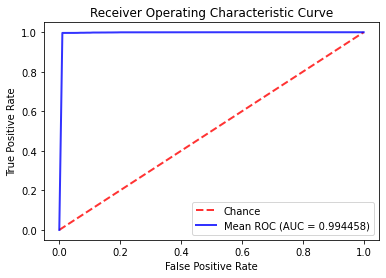

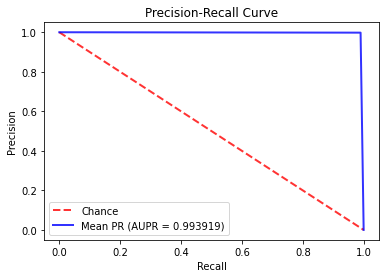

local loocv auc 0.994458 , local loocv aupr 0.993919


In [31]:
tpr_fold = []
precision_fold = []
n = 5430
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)
for filename in tqdm(files):
    print('current cv = {} | total cv = {}'.format(int(filename[35:-4])+1, n))
    
    file = np.load(path + filename)
    y_true = file['y_lloocv_true']
    y_pred = file['y_lloocv_pred']
    y_prob = file['y_lloocv_prob']

    fpr, tpr, _ = roc_curve(y_true, y_prob)
    interp_tpr = interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tpr_fold.append(interp_tpr)

    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    rank_idx = np.argsort(recall)
    recall = recall[rank_idx]
    precision = precision[rank_idx]
    interp_precision = interp(mean_recall, recall, precision)
    interp_precision[0] = 1.0
    precision_fold.append(interp_precision)

mean_tpr = np.mean(tpr_fold, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plot_roc_curve(mean_fpr, mean_tpr, mean_auc)
# roc = pd.DataFrame({'fpr': mean_fpr, 'tpr': mean_tpr})
# roc.to_csv(save_path + 'lloocv_roc.csv', index=False)

mean_precision = np.mean(precision_fold, axis=0)
mean_precision[-1] = 0.0
mean_aupr = auc(mean_recall, mean_precision)
plot_pr_curve(mean_recall, mean_precision, mean_aupr)
# pr = pd.DataFrame({'recall': mean_recall, 'precision': mean_precision})
# pr.to_csv(save_path + 'lloocv_pr.csv', index=False)

print('local loocv auc %0.6f' % mean_auc, ', local loocv aupr %0.6f' % mean_aupr)


In [ ]:
def LLOOCV(epochs):
    known_associations, unknown_associations = divide_known_unknown_associations(DMA)

    tpr_fold = []
    precision_fold = []
    n = len(known_associations)
    mean_fpr = np.linspace(0, 1, 100)
    mean_recall = np.linspace(0, 1, 100)
    for i in range(n):
        print('current cv: %d, total cv: %d' % (i+1, n))

        ele = known_associations[i]
        DMAtest = [ele]
        DMAtrain = np.delete(known_associations, i, axis=0)
        _, DMAcandidate = divide_known_unknown_associations(DMA, special=ele[0])
        """
        # used to adjust the superparameter
        rs = np.random.randint(0, 1000, 1)[0]
        DMAtrain, DMAvalid = train_test_split(DMAtrain, test_size=0.05, random_state=rs)
        scores, labels = train_and_evaluate(DMAtrain=DMAtrain, DMAtest=DMAvalid, DMAcandidate=DMAcandidate, 
                                            graph=graph, num_steps=epochs)
        """
        scores, labels = train_and_evaluate(DMAtrain=DMAtrain, DMAtest=DMAtest, DMAcandidate=DMAcandidate,
                                            graph=graph, num_steps=epochs)

        fpr, tpr, _ = roc_curve(labels, scores)
        interp_tpr = interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tpr_fold.append(interp_tpr)

        precision, recall, _ = precision_recall_curve(labels, scores)
        rank_idx = np.argsort(recall)
        recall = recall[rank_idx]
        precision = precision[rank_idx]
        interp_precision = interp(mean_recall, recall, precision)
        interp_precision[0] = 1.0
        precision_fold.append(interp_precision)

    mean_tpr = np.mean(tpr_fold, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    #plot_roc_curve(mean_fpr, mean_tpr, mean_auc)
    roc = pd.DataFrame({'fpr': mean_fpr, 'tpr': mean_tpr})
    roc.to_csv(save_path + 'lloocv_roc.csv', index=False)

    mean_precision = np.mean(precision_fold, axis=0)
    mean_precision[-1] = 0.0
    mean_aupr = auc(mean_recall, mean_precision)
    #plot_pr_curve(mean_recall, mean_precision, mean_aupr)
    pr = pd.DataFrame({'recall': mean_recall, 'precision': mean_precision})
    pr.to_csv(save_path + 'lloocv_pr.csv', index=False)

    print('local loocv auc %0.6f' % mean_auc, ', local loocv aupr %0.6f' % mean_aupr)
